In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random as rnd

## TWORZENIE DATA SERIES

1. seria danych: lista,slownik,2 listy (wtedy jedna lista stanowi index,a  druga wartosci

In [2]:
cities=['London','Berlin','Warsaw','Paris']
citiesSeries=pd.Series(cities)
citiesSeries

0    London
1    Berlin
2    Warsaw
3     Paris
dtype: object

In [3]:
slownik1={"Andzelika":24,"Gabrysia":22,"Jula":23,"Kasia":23}
pd.Series(slownik1)

Andzelika    24
Gabrysia     22
Jula         23
Kasia        23
dtype: int64

In [4]:
currencies=["USD","EUR","PLN","EUR","EUR"]
countries=["USA","Spain","Poland","Portugal","Italy"]

In [5]:
curSeries=pd.Series(countries,currencies)
curSeries

USD         USA
EUR       Spain
PLN      Poland
EUR    Portugal
EUR       Italy
dtype: object

lub z dwoch list tak mozna zainicjowac

In [6]:
curSeries=pd.Series(data=countries,index=currencies)
curSeries

USD         USA
EUR       Spain
PLN      Poland
EUR    Portugal
EUR       Italy
dtype: object

## różnica pomiędzy Data Series,a słownikiem? 
w słowniku wartości nie mogą się powtarzać, a w Data Series tak

2. Atrybuty Data Series
.size
.nbytes
.is_unique
.is_monotonic
.index
.value


In [7]:
citiesSeries.size

4

In [8]:
citiesSeries.nbytes

32

In [9]:
citiesSeries.is_unique

True

In [10]:
citiesSeries.is_monotonic

False

In [11]:
citiesSeries.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
citiesSeries.values

array(['London', 'Berlin', 'Warsaw', 'Paris'], dtype=object)

In [13]:
citiesSeries.dtype

dtype('O')

In [14]:
citiesSeries.shape

(4,)

In [15]:
citiesSeries.axes

[RangeIndex(start=0, stop=4, step=1)]

.sum()-dodawanie elementow z data series
.min()
.max()
.mean()
.count()
.product() [wszystkie elementy wymnozy przez siebie]


In [16]:
monotonicList=(1,2,4,67,99)
monotonicSeries=pd.Series(monotonicList)
monotonicSeries

0     1
1     2
2     4
3    67
4    99
dtype: int64

In [17]:
monotonicSeries.sum()

173

In [18]:
monotonicSeries.max()

99

In [19]:
monotonicSeries.min()

1

In [20]:
monotonicSeries.mean()

34.6

In [21]:
monotonicSeries.product()

53064

In [22]:
monotonicSeries.keys()

RangeIndex(start=0, stop=5, step=1)

przekonwertowanie data Series do listy

In [23]:
monotonicSeries.to_list()

[1, 2, 4, 67, 99]

dodanie do kazdego elementu (value) Data Series 10

In [24]:
monotonicSeries.add(10)

0     11
1     12
2     14
3     77
4    109
dtype: int64

staramy się nie modyfikować oryginalnych danych tylko utworzyć ich kopie na nowej zmiennej i wtedy na nich operowac

## FILTROWANIE DANYCH

In [25]:
numbers=[1,2,3,11,12,13]
numbers

[1, 2, 3, 11, 12, 13]

In [26]:
numSeries=pd.Series(numbers)
numSeries

0     1
1     2
2     3
3    11
4    12
5    13
dtype: int64

In [27]:
numSeries>10

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [28]:
numSeries.where(numSeries>10)

0     NaN
1     NaN
2     NaN
3    11.0
4    12.0
5    13.0
dtype: float64

In [29]:
numSeries.where(numSeries>10).dropna()

3    11.0
4    12.0
5    13.0
dtype: float64

In [30]:
numSeries.where(numSeries%2!=0).dropna()

0     1.0
2     3.0
3    11.0
5    13.0
dtype: float64

In [31]:
numSeries.where(numSeries>10,other=-1)

0    -1
1    -1
2    -1
3    11
4    12
5    13
dtype: int64

#### metoda .dropna() wyrzuca wszystkie wartosci, ktore nie sa okreslone (NaN)

#### metoda inplace=True, zastepuje oryginalny obiekt tym zmodifikowanym. Bez tego tylko robimy zmiany na kopii tego obiketu i jak go wywolamy to bez  zmian...

In [32]:
numSeries.where(numSeries>10,inplace=True)
numSeries

0     NaN
1     NaN
2     NaN
3    11.0
4    12.0
5    13.0
dtype: float64

In [33]:
numSeries.dropna(inplace=True)
numSeries

3    11.0
4    12.0
5    13.0
dtype: float64

### wyciagniecie argumentow z Data Series, bazujac na indeksie

In [34]:
numSeries=pd.Series(numbers)
numSeries

0     1
1     2
2     3
3    11
4    12
5    13
dtype: int64

In [35]:
numSeries.filter(items=[0,2,4])

0     1
2     3
4    12
dtype: int64

## bardziej zaawansowane filtrowanie
czytaj łaczenie warunkow kilku [&]
lub wartosci pomiedzy 
nazwa.between(przedzial od do)

In [36]:
# numSeries.where(numSeries>10 and numSeries%2!=0), powoduje blad

In [37]:
numbersGreater10=numSeries>10
numbersOdd=numSeries%2!=0

In [38]:
numSeries.where(numbersGreater10 &numbersOdd)

0     NaN
1     NaN
2     NaN
3    11.0
4     NaN
5    13.0
dtype: float64

In [39]:
numSeries.where(numbersGreater10 &numbersOdd).dropna()

3    11.0
5    13.0
dtype: float64

In [40]:
numSeries.between(3,12)

0    False
1    False
2     True
3     True
4     True
5    False
dtype: bool

In [41]:
numSeries.where(numSeries.between(3,12)).dropna()

2     3.0
3    11.0
4    12.0
dtype: float64

In [42]:
#lub

In [43]:
pomiedzy=numSeries.between(3,12)

In [44]:
numSeries.where(pomiedzy).dropna()

2     3.0
3    11.0
4    12.0
dtype: float64

##  import danych do obiektu Series
i jak z Data Frame zrobic Data Series
*polecenie usecols -wtedy wyswietlasz tylko np jedna kolumne z Data Frame 
*polecenie usecols,squeeze :
np obj=pd.read_csv("nazwa pliku",usecols=["nazwa kolmny",squeeze=True)



## squeeze=True, zmienia z Data Frame w Data Series

In [45]:
pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [46]:
pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=["Name"])

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


In [47]:
pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=["Name"],squeeze=True)

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

## jak wkleic np. przykladowa tabele ze schowka:
np: wchodzisz na notatnik, klikasz: edycja->zaznacz wszystko, a potem edycja->kopiuj
i jaki separator wystepuje pomiedzy elementami pliku musisz zawrzec


In [48]:
# np: dataFromClipboard=pd.read_clipboard(sep=',')
#dataFromClipboard

## zamiana skopiowane pliku na Series

In [49]:
#oneSeries=dataFromClipboard['Name']
#oneSeries
#type(oneSeries)

### METODY:
*head- wyswietla 5 pierwszych wierszy 
*tail-wyswietlenie 5 ostatnich wierszy
albo np .head(2)- to dwa pierwsze wiersze
albo .tail(4)- 4 ostatnie wiersze

## SORTOWANIE
*w kolejności rosnącej np: obiekt.sort_values()
*w koleności malejącej np: pok.sort_values(ascending=False)


In [50]:
lista=[1,2,8,9,3]

In [51]:
sorted(lista)

[1, 2, 3, 8, 9]

In [52]:
pok=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name'],squeeze=True)

In [53]:
pok.sort_values().head()

510                  Abomasnow
511    AbomasnowMega Abomasnow
68                        Abra
392                      Absol
393            AbsolMega Absol
Name: Name, dtype: object

In [54]:
pok.sort_values(ascending=False).head()

794    Zygarde50% Forme
695            Zweilous
46                Zubat
631               Zorua
632             Zoroark
Name: Name, dtype: object

In [55]:
pok.sort_values(inplace=True)

In [56]:
pok.sort_values(ascending=False,inplace=True)

In [57]:
#inplace=True, zastapi oryginalny obiekt juz tym posortowanym, metoda ta wiadomo zajmuje wiecej pamieci niz dokonywanue operacji na kopii obiketu

## sprawdzenie, czy element jest w serii

In [58]:
countries=['EN','FR','PL','IT']

In [59]:
'EN' in countries

True

In [60]:
pok=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name'],squeeze=True)
pok.head()

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [61]:
'Venusaur' in pok

False

In [62]:
pok.values

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'VenusaurMega Venusaur',
       'Charmander', 'Charmeleon', 'Charizard',
       'CharizardMega Charizard X', 'CharizardMega Charizard Y',
       'Squirtle', 'Wartortle', 'Blastoise', 'BlastoiseMega Blastoise',
       'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna',
       'Beedrill', 'BeedrillMega Beedrill', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'PidgeotMega Pidgeot', 'Rattata', 'Raticate', 'Spearow',
       'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew',
       'Sandslash', 'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂',
       'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix',
       'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra',

In [63]:
'Venusaur' in pok.values 

True

In [64]:
3 in pok.index

True

### pobieranie wartosci po indeksie
* np. pok[[64,73]] >>wew tworzysz ala "dodatkowa liste", aby odwolac sie do tych 2 argumentow
*pok[2]-jak jeden 
*pok[2:5]-jak kilka w przedziale
*pok[-2:]-od konca dwa ostatnie
*pok[2:6:2]

In [65]:
 pok[73]

'Machoke'

In [66]:
pok[64]

'Arcanine'

In [67]:
pok[[64,73]]

64    Arcanine
73     Machoke
Name: Name, dtype: object

In [68]:
pok[2:7]

2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
5               Charmeleon
6                Charizard
Name: Name, dtype: object

In [69]:
pok[2:6:2]

2      Venusaur
4    Charmander
Name: Name, dtype: object

### Pobieranie wartosci z serii 
*S['b] -odwolujesz sie do indeksu
*S.get('b')-uwaga jak wywolasz ta metode dla nieistniejacego elementu, to nie wywola bledu
*S.at['b'],jak pod indeksem, masz zdublikowane elementy to otrzymasz w wyniku liste
*S.iat[2]- musisz numery indeksow wprowadzac, anie wartosci indeksow.
*S.loc['b]
*S.iloc['b]
*S.iloc[1]-trzeba numery, a nie wartosci indeksu
S.iloc[[0,1]] 

In [70]:
index=['a','b','c','d','e','e']
values=['Austria','Belgium','Canada','Denmark','England','Estonia']
S=pd.Series(values,index)

In [71]:
S

a    Austria
b    Belgium
c     Canada
d    Denmark
e    England
e    Estonia
dtype: object

In [72]:
S['b']

'Belgium'

In [73]:
S['e']

e    England
e    Estonia
dtype: object

In [74]:
S.get('b')

'Belgium'

In [75]:
S.at['b']

'Belgium'

In [76]:
S.iat[2]

'Canada'

## reindex i intersection
*reindex-jak jest opcja, ze danego elementu nie ma na liscie
*interscection-czesc wspolna
wymagaja aby oryginalna lista nie posiadala dublikatow.. czyli np. ten sam index dla 2 elementow

In [77]:
index=['a','b','c','d','e1','e2']
values=['Austria','Belgium','Canada','Denmark','England','Estonia']
S=pd.Series(values,index)
S

a     Austria
b     Belgium
c      Canada
d     Denmark
e1    England
e2    Estonia
dtype: object

In [78]:
searchList=['a','b']

In [79]:
S.loc[searchList]

a    Austria
b    Belgium
dtype: object

In [80]:
searchListNotFound=['a','b','f']

In [81]:
S.reindex(searchListNotFound)

a    Austria
b    Belgium
f        NaN
dtype: object

In [82]:
S.index.intersection(searchListNotFound)

Index(['a', 'b'], dtype='object')

In [83]:
S.loc[S.index.intersection(searchListNotFound)]

a    Austria
b    Belgium
dtype: object

In [84]:
## okreslenie indeksu podczas importu

In [85]:
#wczesniej jak importowalismy, zgadzalismy sie na nadawanie kolumny z indeksami od 0

In [86]:
pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [87]:
ser1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Attack','#'],squeeze=True,index_col='#')
ser1

#
1       49
2       62
3       82
3      100
4       52
      ... 
719    100
719    160
720    110
720    160
721    110
Name: Attack, Length: 800, dtype: int64

#, attack

In [88]:
ser1[4]

52

In [89]:
ser1[[1,11,111]]

#
1      49
11     20
111    85
Name: Attack, dtype: int64

In [90]:
ser2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name','Attack'],squeeze=True)
ser2

,Name,Attack
0,Bulbasaur,49
1,Ivysaur,62
2,Venusaur,82
3,VenusaurMega Venusaur,100
4,Charmander,52
...,...,...
795,Diancie,100
796,DiancieMega Diancie,160
797,HoopaHoopa Confined,110
798,HoopaHoopa Unbound,160


#,Name
jak nie ma index_col to powstaje nowa kolumna ze sztucznymi indeksami

In [91]:
ser3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name','Attack'],squeeze=True,index_col="Name")
ser3

Name
Bulbasaur                 49
Ivysaur                   62
Venusaur                  82
VenusaurMega Venusaur    100
Charmander                52
                        ... 
Diancie                  100
DiancieMega Diancie      160
HoopaHoopa Confined      110
HoopaHoopa Unbound       160
Volcanion                110
Name: Attack, Length: 800, dtype: int64

In [92]:
ser3['Charmander']

52

In [93]:
ser3['Ivysaur':'Charmander']

Name
Ivysaur                   62
Venusaur                  82
VenusaurMega Venusaur    100
Charmander                52
Name: Attack, dtype: int64

In [94]:
ser3[['Ivysaur','Venusaur','Charmander']]

Name
Ivysaur       62
Venusaur      82
Charmander    52
Name: Attack, dtype: int64

In [95]:
ser3.iloc[2]

82

dla tego o liczysz po indeksie o,1,2 i dla 2 sprawdzasz value

In [96]:
fortune500=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2017.csv",usecols=['Rank','Title'],squeeze=True,index_col='Rank')

wyswietl pierwsze 10 , sa dwie opcje:
1. fortune500.head(10)
2.fortune500[:10]

wyswietl ostatnie 10 , sa dwie opcje:
1.fortune500.tail(20)
2.fortune500[-20:]

In [97]:
pok=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name','Attack'],squeeze=True,index_col="Name")
pok

Name
Bulbasaur                 49
Ivysaur                   62
Venusaur                  82
VenusaurMega Venusaur    100
Charmander                52
                        ... 
Diancie                  100
DiancieMega Diancie      160
HoopaHoopa Confined      110
HoopaHoopa Unbound       160
Volcanion                110
Name: Attack, Length: 800, dtype: int64

In [98]:
pok.count()

800

pok.count() ile wartosci wystepuje

In [99]:
pok.value_counts()

100    40
65     39
50     37
80     37
85     33
       ..
46      1
190     1
106     1
132     1
33      1
Name: Attack, Length: 111, dtype: int64

nazwa.values_counts() liczy ile kazdy element razy wystepuje

In [100]:
pok.idxmin()

'Chansey'

nazwa.idxmin()  -->zwraca nazwe pokemona o najmneijszej sile, czyli zwraca index dla najmniejszej wartosci

In [101]:
pok.idxmax()

'MewtwoMega Mewtwo X'

In [102]:
pok.mean()

79.00125

In [103]:
pok.std()

32.45736586949843

In [104]:
pok100=pok*100
pok100

Name
Bulbasaur                 4900
Ivysaur                   6200
Venusaur                  8200
VenusaurMega Venusaur    10000
Charmander                5200
                         ...  
Diancie                  10000
DiancieMega Diancie      16000
HoopaHoopa Confined      11000
HoopaHoopa Unbound       16000
Volcanion                11000
Name: Attack, Length: 800, dtype: int64

In [105]:
pok=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/pokemon.csv",usecols=['Name','Type 1'],squeeze=True,index_col="Name")
pok

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Name: Type 1, Length: 800, dtype: object

In [106]:
pokUpper=pok.str.upper()
pokUpper

Name
Bulbasaur                  GRASS
Ivysaur                    GRASS
Venusaur                   GRASS
VenusaurMega Venusaur      GRASS
Charmander                  FIRE
                          ...   
Diancie                     ROCK
DiancieMega Diancie         ROCK
HoopaHoopa Confined      PSYCHIC
HoopaHoopa Unbound       PSYCHIC
Volcanion                   FIRE
Name: Type 1, Length: 800, dtype: object

jak zmienić wartości na duze, sa dwie opcje:

1.pokUpper=pok.str.upper()

2.pok.apply(lambda aText:aText.upper())


In [107]:
pokWithType="Type: "+ pok.str.upper()
pokWithType

Name
Bulbasaur                  Type: GRASS
Ivysaur                    Type: GRASS
Venusaur                   Type: GRASS
VenusaurMega Venusaur      Type: GRASS
Charmander                  Type: FIRE
                             ...      
Diancie                     Type: ROCK
DiancieMega Diancie         Type: ROCK
HoopaHoopa Confined      Type: PSYCHIC
HoopaHoopa Unbound       Type: PSYCHIC
Volcanion                   Type: FIRE
Name: Type 1, Length: 800, dtype: object

jak wszystkie wartosci pozmieniac np. poprzez dodanie dodatkowego stringa

In [108]:
pok.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

## jak podmienic nazwy wartosci na inne

In [109]:
def ReplaceType(oldType):
    if oldType=="Grass" or oldType=="Ground":
        return "Nature"
    else: 
        return oldType

In [110]:
pokNature=pok.apply(ReplaceType)

In [111]:
pokNature.head()

Name
Bulbasaur                Nature
Ivysaur                  Nature
Venusaur                 Nature
VenusaurMega Venusaur    Nature
Charmander                 Fire
Name: Type 1, dtype: object

In [112]:
pokNature.value_counts()

Water       112
Nature      102
Normal       98
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [113]:
pok.apply(lambda aText:aText.upper())

Name
Bulbasaur                  GRASS
Ivysaur                    GRASS
Venusaur                   GRASS
VenusaurMega Venusaur      GRASS
Charmander                  FIRE
                          ...   
Diancie                     ROCK
DiancieMega Diancie         ROCK
HoopaHoopa Confined      PSYCHIC
HoopaHoopa Unbound       PSYCHIC
Volcanion                   FIRE
Name: Type 1, Length: 800, dtype: object

## Metoda map
na dwoch seriach danych moze dzialac

In [114]:
team=pd.Series(data=[5,3,2,4,3,4,4,5],index=['Andy','Bob','Chris','Dirk','Francis','George','Henry','Ivan'])
team

Andy       5
Bob        3
Chris      2
Dirk       4
Francis    3
George     4
Henry      4
Ivan       5
dtype: int64

In [115]:
notes=pd.Series(data=['C','B','A','A+','A++'],index=[1,2,3,4,5])
notes

1      C
2      B
3      A
4     A+
5    A++
dtype: object

In [116]:
team.map(notes)

Andy       A++
Bob          A
Chris        B
Dirk        A+
Francis      A
George      A+
Henry       A+
Ivan       A++
dtype: object

powstala nowa seria... indeksem jest inex z serii team, a wartoscia, wartosc z serii notes

ze slownika tearz lecimy laczenie dwoch serii


In [117]:
notes_dict={1:'C',2:'B',3:'A',4:'A+',5:'A++'}

In [118]:
team.map(notes_dict)

Andy       A++
Bob          A
Chris        B
Dirk        A+
Francis      A
George      A+
Henry       A+
Ivan       A++
dtype: object

In [119]:
slownik1={'symbol PYT001':'Airbus 320','symbol PYT002':'Boeing 737','symbol PYT003':'Airbus 321'}

In [120]:
aircrafts=pd.Series(slownik1)
aircrafts

symbol PYT001    Airbus 320
symbol PYT002    Boeing 737
symbol PYT003    Airbus 321
dtype: object

## DATA FRAME

In [121]:
mc=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv")

In [122]:
mc

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [123]:
mcSelected=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Serving Size','Calories from Fat','TotalFat'])

In [124]:
mcSelected.head()

,Item,Serving Size,Calories from Fat,TotalFat
0,Egg McMuffin,4.8 oz (136 g),120,13.0
1,Egg White Delight,4.8 oz (135 g),70,8.0
2,Sausage McMuffin,3.9 oz (111 g),200,23.0
3,Sausage McMuffin with Egg,5.7 oz (161 g),250,28.0
4,Sausage McMuffin with Egg Whites,5.7 oz (161 g),210,23.0


In [125]:
mcSelected2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Serving Size','Calories from Fat','TotalFat'],index_col='Item')

In [126]:
mcSelected2

,Serving Size,Calories from Fat,TotalFat
Item,,,
Egg McMuffin,4.8 oz (136 g),120,13.0
Egg White Delight,4.8 oz (135 g),70,8.0
Sausage McMuffin,3.9 oz (111 g),200,23.0
Sausage McMuffin with Egg,5.7 oz (161 g),250,28.0
Sausage McMuffin with Egg Whites,5.7 oz (161 g),210,23.0
...,...,...,...
McFlurry with Oreo Cookies (Small),10.1 oz (285 g),150,17.0
McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),200,23.0
McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),100,11.0


df.dtypes.value_counts()

In [127]:
mcSelected3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Calories'],index_col='Item',squeeze=True)

In [128]:
mcSelected3

Item
Egg McMuffin                                         300
Egg White Delight                                    250
Sausage McMuffin                                     370
Sausage McMuffin with Egg                            450
Sausage McMuffin with Egg Whites                     400
                                                    ... 
McFlurry with Oreo Cookies (Small)                   510
McFlurry with Oreo Cookies (Medium)                  690
McFlurry with Oreo Cookies (Snack)                   340
McFlurry with Reese's Peanut Butter Cups (Medium)    810
McFlurry with Reese's Peanut Butter Cups (Snack)     410
Name: Calories, Length: 260, dtype: int64

In [129]:
mcSelected3.count()

260

# do calego pliku:
liczy ilosc wystapien danej wartosci,a dla ograniczonych kolumn liczy ogolna ilosc wierszy

In [130]:
mc.count()

Category                         260
Item                             260
Serving Size                     260
Calories                         260
Calories from Fat                260
TotalFat                         260
Total Fat (% Daily Value)        260
Saturated Fat                    260
Saturated Fat (% Daily Value)    260
Trans Fat                        260
Cholesterol                      260
Cholesterol (% Daily Value)      260
Sodium                           260
Sodium (% Daily Value)           260
Carbohydrates                    260
Carbohydrates (% Daily Value)    260
Dietary Fiber                    260
Dietary Fiber (% Daily Value)    260
Sugars                           260
Protein                          260
Vitamin A (% Daily Value)        260
Vitamin C (% Daily Value)        260
Calcium (% Daily Value)          260
Iron (% Daily Value)             260
dtype: int64

In [131]:
len(mc)

260

In [132]:
len(mcSelected3)

260

In [133]:
mc.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
TotalFat                         float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

funkcja ponizej pokazuje liczbe wystapien poszczegolnych typow


In [134]:
mc.dtypes.value_counts()

int64      18
object      3
float64     3
dtype: int64

wymiar danych

In [135]:
mc.shape

(260, 24)

In [136]:
mc.axes

[RangeIndex(start=0, stop=260, step=1),
 Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
        'TotalFat', 'Total Fat (% Daily Value)', 'Saturated Fat',
        'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
        'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
        'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
        'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
        'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
        'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
       dtype='object')]

In [137]:
mc.index

RangeIndex(start=0, stop=260, step=1)

In [138]:
mc.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'TotalFat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [139]:
mc.values

array([['Breakfast', 'Egg McMuffin', '4.8 oz (136 g)', ..., 0, 25, 15],
       ['Breakfast', 'Egg White Delight', '4.8 oz (135 g)', ..., 0, 25,
        8],
       ['Breakfast', 'Sausage McMuffin', '3.9 oz (111 g)', ..., 0, 25,
        10],
       ...,
       ['Smoothies & Shakes', 'McFlurry with Oreo Cookies (Snack)',
        '6.7 oz (190 g)', ..., 0, 25, 6],
       ['Smoothies & Shakes',
        "McFlurry with Reese's Peanut Butter Cups (Medium)",
        '14.2 oz (403 g)', ..., 0, 60, 6],
       ['Smoothies & Shakes',
        "McFlurry with Reese's Peanut Butter Cups (Snack)",
        '7.1 oz (202 g)', ..., 0, 30, 4]], dtype=object)

## nazwa.info()

In [140]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   TotalFat                       260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [141]:
mc['Calories'].value_counts()

0      16
340    10
430    10
280     9
250     8
       ..
640     1
800     1
740     1
620     1
810     1
Name: Calories, Length: 78, dtype: int64

In [142]:
mc['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

nazwa.sample losuje jakis wiersz

In [143]:
mc.sample()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
27,Breakfast,Big Breakfast (Regular Biscuit),9.5 oz (269 g),740,430,48.0,73,17.0,87,0.0,...,51,17,3,12,3,28,15,2,15,25


In [144]:
mc.sample(n=3)

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4.0,6,1.5,8,0.0,...,58,19,5,19,32,5,2,130,10,10
37,Breakfast,Sausage Burrito,3.9 oz (111 g),300,150,16.0,25,7.0,33,0.0,...,26,9,1,5,2,12,10,2,15,15
226,Coffee & Tea,Frappé Caramel (Small),12 fl oz cup,450,170,19.0,29,12.0,60,1.0,...,64,21,0,0,57,7,15,0,25,2


In [145]:
mc.sample(frac=0.02)

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
14,Breakfast,Sausage Biscuit with Egg Whites (Regular Biscuit),5.9 oz (167 g),460,250,27.0,42,12.0,62,0.0,...,34,11,2,6,3,18,0,0,8,15
151,Coffee & Tea,Caramel Latte (Small),12 fl oz cup,270,80,9.0,13,5.0,24,0.0,...,40,13,1,3,38,9,8,0,30,0
209,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,22 fl oz cup,120,60,7.0,11,4.5,22,0.0,...,12,4,0,0,2,1,4,0,4,0
152,Coffee & Tea,Caramel Latte (Medium),16 fl oz cup,340,90,10.0,16,6.0,30,0.0,...,50,17,1,4,48,11,10,0,35,0
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,115,38,7,28,18,35,4,2,25,30


## (frac=0.02)-> pokazuje 2% rekordow ktore wystepuja w Data Frame

In [146]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'])

In [147]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv")
frame

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [148]:
series=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Calories'],index_col='Item',squeeze=True)

In [149]:
type(frame)

pandas.core.frame.DataFrame

In [150]:
type(series)

pandas.core.series.Series

## Odwołanie do okreslonej Data Frame

In [151]:
frame.Calories

0      300
1      250
2      370
3      450
4      400
      ... 
255    510
256    690
257    340
258    810
259    410
Name: Calories, Length: 260, dtype: int64

In [152]:
type(frame.Calories)

pandas.core.series.Series

## do kolumn w Data Frame stosujemy metody z Data Series

In [153]:
frame.Calories.mean()

368.2692307692308

In [154]:
frame.Calories.median()

340.0

In [155]:
frame.Calories.min()

0

In [156]:
frame.Calories.max()

1880

In [157]:
frame.Calories.idxmax()

82

nazwa DFrame_nazwakolumny.idxmax()......wskazuje wartosc indeksu dla wartosci maksymalnej

In [158]:
frame.Calories.idxmin()

114

In [159]:
frame.Item[82]

'Chicken McNuggets (40 piece)'

### wartosc dla Item 82

In [160]:
frame.Item[frame.Calories.idxmax()]

'Chicken McNuggets (40 piece)'

odwolujemy sie do kolumny z nazwami (frame.Item), potem dla frame pokazujemy najbardziej kaloryczna 

In [161]:
frame['Calories'].head()

0    300
1    250
2    370
3    450
4    400
Name: Calories, dtype: int64

## opcja na wybranie z Data Frame jednej kolumny

In [162]:
s=frame['Item']

In [163]:
s[242]

'Vanilla Shake (Medium)'

In [164]:
s.loc[242]

'Vanilla Shake (Medium)'

In [165]:
frame['Item'][242]

'Vanilla Shake (Medium)'

In [166]:
frame.loc[242].loc['Item']

'Vanilla Shake (Medium)'

In [167]:
frame.loc[242,'Item']

'Vanilla Shake (Medium)'

loc dla wartosci indeksu, 
iloc dla pozycji 

In [168]:
frame['Calories'].head()

0    300
1    250
2    370
3    450
4    400
Name: Calories, dtype: int64

In [169]:
frame[['Calories','TotalFat','Sugars']].head()

,Calories,TotalFat,Sugars
0,300,13.0,3
1,250,8.0,3
2,370,23.0,2
3,450,28.0,2
4,400,23.0,2


## w domu

In [170]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'],index_col='Vehicle ID')

In [171]:
fuel

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
...,...,...,...,...,...,...
32060,2012,Mitsubishi,Lancer,Compact Cars,Regular,25.0
32063,2012,Mitsubishi,Lancer AWD,Compact Cars,Regular,25.0
32065,2012,Mitsubishi,Lancer Evolution,Compact Cars,Premium,19.0


In [172]:
fuel['Make'].head()

Vehicle ID
26587    Alfa Romeo
27705    Alfa Romeo
26561    Alfa Romeo
27681    Alfa Romeo
27550    AM General
Name: Make, dtype: object

In [173]:
fuel['Make'].value_counts().head()

Chevrolet    3389
Ford         2721
Dodge        2361
GMC          2174
Toyota       1599
Name: Make, dtype: int64

In [174]:
fuel.loc[1873]

Year                             1986
Make                       Mitsubishi
Model                         Starion
Class                 Subcompact Cars
Fuel Type                     Premium
Combined MPG (FT1)               19.0
Name: 1873, dtype: object

. Wyświetl informacje o liczbie mil jakie można przejechać na galonie paliwa (kolumna Combined MPG(FT1)) dla samochodu pod indeksem Vehicle ID 1873

In [175]:
fuel.loc[1873,'Combined MPG (FT1)']

19.0

In [176]:
s=fuel['Combined MPG (FT1)']

In [177]:
s.max()

112.0

In [178]:
s.idxmax()

31673

In [179]:
fuel.loc[31673]

Year                             2012
Make                       Mitsubishi
Model                          i-MiEV
Class                 Subcompact Cars
Fuel Type                 Electricity
Combined MPG (FT1)              112.0
Name: 31673, dtype: object

## jak dodac do Data Frame nowa kolumne

In [180]:
frame1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Calories','TotalFat','Sugars','Protein','Cholesterol'])
frame1.head()

,Category,Item,Calories,TotalFat,Cholesterol,Sugars,Protein
0,Breakfast,Egg McMuffin,300,13.0,260,3,17
1,Breakfast,Egg White Delight,250,8.0,25,3,18
2,Breakfast,Sausage McMuffin,370,23.0,45,2,14
3,Breakfast,Sausage McMuffin with Egg,450,28.0,285,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,23.0,50,2,21


## Odwołąnie się do kolumny w Data Frame:
* frame.nazwakolumny
*frame['nazwakolumny']

In [181]:
frame1.TotalFat.head()

0    13.0
1     8.0
2    23.0
3    28.0
4    23.0
Name: TotalFat, dtype: float64

In [182]:
frame1['TotalFat'].head()

0    13.0
1     8.0
2    23.0
3    28.0
4    23.0
Name: TotalFat, dtype: float64

## Dodanie nowej kolumny:
* farme['nazwanowejkolmny']=wartosc

In [183]:
frame['TotalFat0']=0

In [184]:
frame.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),TotalFat0
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0


In [185]:
sugarAndFat=frame.Sugars+frame.TotalFat

In [186]:
frame['SugarAndFat']=sugarAndFat

In [187]:
frame

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),TotalFat0,SugarAndFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,16.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0,11.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0,25.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0,30.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,1,4,64,12,15,0,40,8,0,81.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,1,5,85,15,20,0,50,10,0,108.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,1,2,43,8,10,0,25,6,0,54.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,2,9,103,21,20,0,60,6,0,135.0


In [188]:
sugarAndFat.head()

0    16.0
1    11.0
2    25.0
3    30.0
4    25.0
dtype: float64

In [189]:
frame['SugarAndprotein']=frame.Sugars+frame.Protein
frame.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),TotalFat0,SugarAndFat,SugarAndprotein
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,0,16.0,20
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,0,11.0,21
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,0,25.0,16
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,0,30.0,23
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,0,25.0,23


## Dodanie kolumny (Data Series) do Data Frame w okreslonym miejscu:
* frame.insert(loc=numerlokalizacjinowejkolumny,column='nazwakolumny',value=cotammabyc)

In [190]:
frame.insert(loc=2,column='SPF',value=frame.Sugars+frame.Protein+frame.TotalFat)

In [191]:
frame.head()

,Category,Item,SPF,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),TotalFat0,SugarAndFat,SugarAndprotein
0,Breakfast,Egg McMuffin,33.0,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,17,3,17,10,0,25,15,0,16.0,20
1,Breakfast,Egg White Delight,29.0,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,17,3,18,6,0,25,8,0,11.0,21
2,Breakfast,Sausage McMuffin,39.0,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,17,2,14,8,0,25,10,0,25.0,16
3,Breakfast,Sausage McMuffin with Egg,51.0,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,17,2,21,15,0,30,15,0,30.0,23
4,Breakfast,Sausage McMuffin with Egg Whites,46.0,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,17,2,21,6,0,25,10,0,25.0,23


## Jak usuwac kolumny:

*del nazwaframe['nazwakolumnydousuniecia']

*frame=frame.drop(columns=['SugarAndprotein'])

*frame.drop(columns=['SPF'],inplace=True)

In [192]:
del frame['SugarAndprotein']

In [193]:
frame.head()

,Category,Item,SPF,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),TotalFat0,SugarAndFat
0,Breakfast,Egg McMuffin,33.0,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,4,17,3,17,10,0,25,15,0,16.0
1,Breakfast,Egg White Delight,29.0,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,4,17,3,18,6,0,25,8,0,11.0
2,Breakfast,Sausage McMuffin,39.0,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,4,17,2,14,8,0,25,10,0,25.0
3,Breakfast,Sausage McMuffin with Egg,51.0,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,4,17,2,21,15,0,30,15,0,30.0
4,Breakfast,Sausage McMuffin with Egg Whites,46.0,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,4,17,2,21,6,0,25,10,0,25.0


In [194]:
#frame=frame.drop(columns=['SugarAndprotein'])

In [195]:
frame.drop(columns=['SPF'],inplace=True)

In [196]:
fuel1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'])
fuel1.head()

,Vehicle ID,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [197]:
fuel1['Combined KPL']=fuel1['Combined MPG (FT1)']*1.609/3.78

In [198]:
fuel1.head()

,Vehicle ID,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1),Combined KPL
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0,8.513228
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0,8.513228
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0,8.938889
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0,8.938889
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0,7.236243


In [199]:
fuel1.insert(loc=4,column='liters per km',value=100/fuel1['Combined KPL'])

In [200]:
fuel1.head()

,Vehicle ID,Year,Make,Model,liters per km,Class,Fuel Type,Combined MPG (FT1),Combined KPL
0,26587,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular,20.0,8.513228
1,27705,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular,20.0,8.513228
2,26561,1984,Alfa Romeo,Spider Veloce 2000,11.187073,Two Seaters,Regular,21.0,8.938889
3,27681,1984,Alfa Romeo,Spider Veloce 2000,11.187073,Two Seaters,Regular,21.0,8.938889
4,27550,1984,AM General,DJ Po Vehicle 2WD,13.819325,Special Purpose Vehicle 2WD,Regular,17.0,7.236243


In [201]:
del fuel1["Combined MPG (FT1)"]

In [202]:
fuel1.head(2)

,Vehicle ID,Year,Make,Model,liters per km,Class,Fuel Type,Combined KPL
0,26587,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular,8.513228
1,27705,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular,8.513228


In [203]:
fuel1.drop(columns="Combined KPL", inplace=True)
fuel1.head(2)

,Vehicle ID,Year,Make,Model,liters per km,Class,Fuel Type
0,26587,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular
1,27705,1984,Alfa Romeo,GT V6 2.5,11.746426,Minicompact Cars,Regular


## oczyszczanie danych

In [204]:
frame3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv")

In [205]:
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## OCZYSZCZANIE DANYCH 
*dropna()

In [206]:
frame3.loc[1,'Calories']=np.NaN
frame3.loc[2,'TotalFat']=np.NaN

In [207]:
frame3.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),NaN,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,200,NaN,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


### omawiamy oczyszczanie danych, jesli NaN beda stanowic pojedyncze rekordy
### Metoda .dropna usuwa uwaga CAŁE WIERSZE GDZIE POJAWI SIĘ NAN

In [208]:
frame3.dropna().head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## jesli cchesz usunac caly wiersz, gdzie sie pojawia wszedzie w calym wierszu NaN:
nazwa DataFrame.dropna(how='all')

In [209]:
frame3.dropna(how='all').head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),NaN,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,200,NaN,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


###  nazwy kolumn brane pod uwage podczas usuwania wierszy. czyli jesli w kolumnie gdzies sie to pojawi to usunie caly wiersz

In [210]:
frame3.dropna(subset=['TotalFat'],how='any').head()
#oczaj dlatego 2 wiersz znikl, bo bylo 'NaN', przy TotalFat

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),NaN,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430.0,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20


In [211]:
frame3.dropna(axis='rows').head()
#rows=wiersze, czyli jak znajdzieszy gdzies NaN to usuwamy caly wiersz
#lub bo 0 to wiersze
#frame3.dropna(axis=0).head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430.0,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460.0,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15


In [212]:
frame3.dropna(axis='columns').head()
#znajdzie wartosc NaN to usuwa cala kolumne
#lub: 1-to kolumny
#frame3.dropna(axis=1).head()

,Category,Item,Serving Size,Calories from Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),120,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),70,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),200,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),250,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),210,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


In [213]:
frame3.dropna(inplace=True)
#inplace=True, zastepuje po prostu stary Data Frame nowym w ktorym wszedzie gdzie w akordzie pojawilo sie NaN 
#zostanie usuniety caly wiersz

In [214]:
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430.0,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460.0,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15


## w domu

In [215]:
fuel2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'],index_col=['Vehicle ID'])

In [216]:
fuel2.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [217]:
fuel2.loc[27705, 'Class'] = np.NaN
fuel2.loc[26561, 'Class'] = np.NaN
fuel2.loc[27550, 'Fuel Type'] = np.NaN

In [218]:
fuel2.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,NaN,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,NaN,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,NaN,17.0


In [219]:
fuel2.dropna().head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0
28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0


In [220]:
fuel2.dropna(axis='columns').head()
#usuwam kolumny jak NaN znajdzie

,Year,Make
Vehicle ID,,
26587,1984,Alfa Romeo
27705,1984,Alfa Romeo
26561,1984,Alfa Romeo
27681,1984,Alfa Romeo
27550,1984,AM General


In [221]:
fuel2.dropna(axis='rows').dropna().head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0
28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0


In [223]:
fuel2.dropna(subset=['Class'],how='any').head()
#zwroc uwage na kolumny, jesli sie pojawi jakikolwiek NaN, to usuwasz caly wiersz 2, bo w kolumnie Class
#zawieral NaN


,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,NaN,17.0
28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0


# Oczyszczanie danych II

In [224]:
#w jaki sposob uzupelniac brakujace dane

In [226]:
frame3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv")
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [227]:
frame3.loc[1,'TotalFat']=np.NaN
frame3.loc[1,'Saturated Fat']=np.NaN
frame3.loc[2,'Saturated Fat']=np.NaN
frame3.loc[3,'Category']=np.NaN

In [228]:
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,NaN,12,NaN,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,NaN,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,NaN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Uzupełnienie danych NaN, wartościami:
* np. 0, frame3.fillna(value=0).head()
#wada tego rozwiazania: a co jak wartoscia 0 zostanie uzupelniony akord z kategoria?

* Zastepowanie akordow NaN wybranymi wartosciami za pomoca slownika: 
np: replaceDefinition={'Category':'UNKNOWN','Total Fat':0,'Saturated Fat':0}, czyli znajdzie Nan dla kolumny "Category" i w miejscu z akordem NaN wstawi "UNNOWN'

* co jak dla pojedynczej pozycji tylko chcesz ustawic zmianę bez deklaracji slownika:
*frame3['Category'].fillna(value='UNKNOWN',inplace=True), musi byc inplace=True, bo inaczej zwroci tylko wartosc "UNKNOWN"

In [243]:
frame3.fillna(value=0).head()
#uzupelnienie 0 wystepujacych NaN

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,0.0,12,0.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,0.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,0,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [244]:
replaceDefinition={'Category':'UNKNOWN','Total Fat':0,'Saturated Fat':0}

In [245]:
frame3.fillna(value=replaceDefinition).head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,NaN,12,0.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,0.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,UNKNOWN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [249]:
frame3['Category'].fillna(value='UNKNOWN',inplace=True)

In [250]:
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,NaN,12,NaN,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,NaN,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,UNKNOWN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [256]:
frame3['TotalFat'].fillna(value=0,inplace=True)
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,0.0,12,NaN,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,NaN,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,UNKNOWN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [257]:
frame3['Saturated Fat'].fillna(value=0,inplace=True)
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,0.0,12,0.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,0.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,UNKNOWN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## uzupelnienie wartoscia srednia tego akordu, a jest to srednia z 1 kolumny

In [263]:
frame3.loc[1,'TotalFat']=np.NaN
frame3.loc[1,'Saturated Fat']=np.NaN
frame3.loc[2,'Saturated Fat']=np.NaN
frame3.loc[3,'Category']=np.NaN

In [264]:
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Fat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,NaN,12,NaN,15,0.0,...,10,4,17,3,18,6,0,25,8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,NaN,42,0.0,...,10,4,17,2,14,8,0,25,10,NaN
3,NaN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,NaN


In [266]:
avgTotalFat=frame3['TotalFat'].mean()
#oblicz srednia dla tej kolumny
avgTotalFat

14.18918918918919

In [268]:
frame3['TotalFat'].fillna(value=avgTotalFat,inplace=True)
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Fat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.000000,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,14.189189,12,NaN,15,0.0,...,10,4,17,3,18,6,0,25,8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.000000,35,NaN,42,0.0,...,10,4,17,2,14,8,0,25,10,NaN
3,NaN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.000000,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.000000,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,NaN


## Uzupełnianie wartością poprzednią dany akord w kolumnie

In [275]:
frame3['Saturated Fat'].fillna(method='ffill',inplace=True)
#zastapienie wartoscia poprzednia w kolumnie brakujacego akordu
frame3.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Fat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.000000,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,14.189189,12,5.0,15,0.0,...,10,4,17,3,18,6,0,25,8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.000000,35,5.0,42,0.0,...,10,4,17,2,14,8,0,25,10,NaN
3,NaN,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.000000,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.000000,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,NaN


# zadanie, uzuplenianie danymi

In [276]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'],index_col=['Vehicle ID'])

In [277]:
fuel.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [279]:
fuel.loc[27705,'Class']=np.NaN
fuel.loc[26561,'Class']=np.NaN
fuel.loc[27550,'Fuel Type']=np.NaN
fuel.loc[27681,'Combined MPG (FT1)']=np.NaN
fuel.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,NaN,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,NaN,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,NaN
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,NaN,17.0


In [280]:
fuel.fillna(value=-1).head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,-1,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,-1,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,-1.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,-1,17.0


In [282]:
replaceRules={"Class":"---","Fuel Type":"---","Combined MPG (FT1)":-1}
fuel.fillna(value=replaceRules).head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,---,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,---,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,-1.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,---,17.0


In [284]:
avgMPG=fuel["Combined MPG (FT1)"].mean()
avgMPG

19.444195442206933

In [286]:
fuel['Class'].fillna(value='?',inplace=True)
fuel['Fuel Type'].fillna(value='?',inplace=True)
fuel['Combined MPG (FT1)'].fillna(value=avgMPG,inplace=True)
fuel.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.000000
27705,1984,Alfa Romeo,GT V6 2.5,?,Regular,20.000000
26561,1984,Alfa Romeo,Spider Veloce 2000,?,Regular,21.000000
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,19.444195
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,?,17.000000


In [290]:
fuel.loc[27705, 'Class'] = np.NaN
fuel.loc[26561, 'Class'] = np.NaN
fuel.loc[27550, 'Fuel Type'] = np.NaN
fuel.loc[27705, 'Combined MPG (FT1)'] = np.NaN
fuel.loc[27681, 'Combined MPG (FT1)'] = np.NaN
fuel.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,NaN,Regular,NaN
26561,1984,Alfa Romeo,Spider Veloce 2000,NaN,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,NaN
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,NaN,17.0


In [ ]:
fuel['Combined MPG (FT1)'].fillna(method='ffill',inplace=True)
#uzuplenianie wartoscia poprzednia w kolumnie dla danego akordu w okreslonej kolumnie
fuel.head()

## SORTOWANIA DANYCH DATA FRAME
UWAGA JEŚLI POLECENIE SORT NATRAFI NA NaN, to traktuje ja jako wartosc NAJWIEKSZA!!!!!!!,można to zmienić żeby NaN bylo traktowane jako wartosc najmneisjza:
frame.sort_values(by='nazwa_kolumny',na_position='first').head()
* np. sortowanie wedlug OKREŚLONEJ KOLUMNY:
frame.sort_value(by="nazwa_kolumny")

*np. sortowanie wobec jednej kolumny, ale malejaco:
frame.sort_values(by='nazwa_kolumny',ascending=False).head()
#####zwroc uwage na indeksy 

In [3]:
mac1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
mac1.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [4]:
mac1.sort_values(by='Calories').head()

,Category,Item,Serving Size,Calories,TotalFat
125,Beverages,Diet Dr Pepper (Child),12 fl oz cup,0,0.0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0.0
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0.0
136,Beverages,Dasani Water Bottle,16.9 fl oz,0,0.0
145,Coffee & Tea,Coffee (Small),12 fl oz cup,0,0.0


In [5]:
mac1.sort_values(by='Calories',ascending=False).head()
#sortowanie wedlug okreslonej kolumny malejaco


,Category,Item,Serving Size,Calories,TotalFat
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,118.0
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,60.0
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,56.0
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,50.0
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,46.0


# UWAGA DO KOLUMNY INT NIE MOZNA PRZYPISAC NaN, wiec trzeba ja przekonwertowac wpierw na float

In [6]:
mac1['Calories']=mac1['Calories'].astype('float')
mac1

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0
...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510.0,17.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690.0,23.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340.0,11.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810.0,32.0


In [7]:
mac1.loc[82,'Calories']=np.NaN
mac1.head()
mac1.loc[82]

Category                      Chicken & Fish
Item            Chicken McNuggets (40 piece)
Serving Size                 22.8 oz (646 g)
Calories                                 NaN
TotalFat                               118.0
Name: 82, dtype: object

In [8]:
mac1.sort_values(by='Calories').tail()
#obczaj wartosc NaN

,Category,Item,Serving Size,Calories,TotalFat
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990.0,46.0
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050.0,50.0
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090.0,56.0
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150.0,60.0
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),NaN,118.0


In [9]:
mac1.sort_values(by='Calories',na_position='first').head()
#NaN na samym poczatku zbioru

,Category,Item,Serving Size,Calories,TotalFat
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),NaN,118.0
114,Beverages,Diet Coke (Small),16 fl oz cup,0.0,0.0
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0.0,0.0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0.0,0.0
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0.0,0.0


## SORTOWANIE WEDLUG 2 KOLUMN (czyt. 2 serii danych)

In [317]:
mac1.sort_values(by=['Category','Item']).head(20)

,Category,Item,Serving Size,Calories,TotalFat
51,Beef & Pork,Bacon Clubhouse Burger,9.5 oz (270 g),720.0,40.0
53,Beef & Pork,Bacon McDouble,5.7 oz (161 g),440.0,22.0
42,Beef & Pork,Big Mac,7.4 oz (211 g),530.0,27.0
49,Beef & Pork,Cheeseburger,4 oz (113 g),290.0,11.0
54,Beef & Pork,Daily Double,6.7 oz (190 g),430.0,22.0
50,Beef & Pork,Double Cheeseburger,5.7 oz (161 g),430.0,21.0
47,Beef & Pork,Double Quarter Pounder with Cheese,10 oz (283 g),750.0,43.0
48,Beef & Pork,Hamburger,3.5 oz (98 g),240.0,8.0
55,Beef & Pork,Jalapeño Double,5.6 oz (159 g),430.0,23.0
52,Beef & Pork,McDouble,5.2 oz (147 g),380.0,17.0


In [320]:
mac1.sort_values(by=['Category','Item'],ascending=[True,False]).head(20)
#jedna kolumna sortowana rosnaco, a druga malejaco
#ascending=False, sortowanie malejaco

,Category,Item,Serving Size,Calories,TotalFat
43,Beef & Pork,Quarter Pounder with Cheese,7.1 oz (202 g),520.0,26.0
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,8.3 oz (235 g),610.0,31.0
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,8 oz (227 g),600.0,29.0
46,Beef & Pork,Quarter Pounder Deluxe,8.6 oz (244 g),540.0,27.0
56,Beef & Pork,McRib,7.3 oz (208 g),500.0,26.0
52,Beef & Pork,McDouble,5.2 oz (147 g),380.0,17.0
55,Beef & Pork,Jalapeño Double,5.6 oz (159 g),430.0,23.0
48,Beef & Pork,Hamburger,3.5 oz (98 g),240.0,8.0
47,Beef & Pork,Double Quarter Pounder with Cheese,10 oz (283 g),750.0,43.0
50,Beef & Pork,Double Cheeseburger,5.7 oz (161 g),430.0,21.0


In [10]:
mac2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'],index_col=['Item'])
mac2.head()

,Category,Serving Size,Calories,TotalFat
Item,,,,
Egg McMuffin,Breakfast,4.8 oz (136 g),300,13.0
Egg White Delight,Breakfast,4.8 oz (135 g),250,8.0
Sausage McMuffin,Breakfast,3.9 oz (111 g),370,23.0
Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,28.0
Sausage McMuffin with Egg Whites,Breakfast,5.7 oz (161 g),400,23.0


## Sortowanie według INDEKSU, malejaco 

In [11]:
mac2.sort_index(ascending=True).head()


,Category,Serving Size,Calories,TotalFat
Item,,,,
1% Low Fat Milk Jug,Beverages,1 carton (236 ml),100,2.5
Apple Slices,Snacks & Sides,1.2 oz (34 g),15,0.0
Bacon Buffalo Ranch McChicken,Chicken & Fish,5.7 oz (161 g),430,21.0
Bacon Cheddar McChicken,Chicken & Fish,6 oz (171 g),480,24.0
Bacon Clubhouse Burger,Beef & Pork,9.5 oz (270 g),720,40.0


# w domu

In [15]:
fuel3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'],index_col=['Vehicle ID'])
fuel3.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [17]:
fuel3.loc[27681, 'Combined MPG (FT1)'] = np.NaN
fuel3.head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,NaN
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [18]:
fuel3.sort_values(by=['Make','Model']).head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0
28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0
1032,1985,AM General,Post Office DJ5 2WD,Special Purpose Vehicle 2WD,Regular,16.0


In [19]:
fuel3.sort_values(by=['Combined MPG (FT1)'],ascending=False).head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
31673,2012,Mitsubishi,i-MiEV,Subcompact Cars,Electricity,112.0
32278,2012,Ford,Focus Electric,Compact Cars,Electricity,105.0
32276,2011,BMW,Active E,Subcompact Cars,Electricity,102.0
30979,2011,Nissan,Leaf,Midsize Cars,Electricity,99.0
30978,2008,MINI,MiniE,Minicompact Cars,Electricity,98.0


In [20]:
fuel3.sort_values(by=['Make','Combined MPG (FT1)'],ascending=[True,False]).head()

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0
1032,1985,AM General,Post Office DJ5 2WD,Special Purpose Vehicle 2WD,Regular,16.0
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0
28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,Regular,13.0


In [22]:
fuel3.sort_values(['Combined MPG (FT1)'],na_position='first').head()
#NaN na poczatku: na_position='first'

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,NaN
32106,2012,Mitsubish,NaN,NaN,NaN,NaN
2914,1987,Lamborghini,Countach,Two Seaters,Premium,7.0
6413,1990,Lamborghini,Countach,Two Seaters,Premium,7.0
5267,1989,Lamborghini,Countach,Two Seaters,Premium,7.0


In [27]:
#wykonaj to co wyzej, ale tym razem sortowanie ma sie odbyc na oryginalnym obiekcie:
#to po prostu dodajesz inplace=True

In [28]:
fuel3.sort_index(ascending=True).head()
#posortuj wedlug indeksu rosnaco, ale wczesniej zdeklerowalismy, ze 
#index index_col=['Vehicle ID']

,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
Vehicle ID,,,,,,
1,1985,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
2,1985,Bertone,X1/9,Two Seaters,Regular,22.0
3,1985,Chevrolet,Corvette,Two Seaters,Regular,17.0
4,1985,Chevrolet,Corvette,Two Seaters,Regular,17.0
5,1985,Nissan,300ZX,Two Seaters,Regular,16.0


## Kontrola i optymalizacja danych 
np. typ int zawiera mniej miejsca niz float

In [30]:
macdonald=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
macdonald.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


## jak sprawdzic typy wszystkich kolumn za jednym razem w Data Frame
frame.dtypes

In [32]:
macdonald.dtypes

Category         object
Item             object
Serving Size     object
Calories          int64
TotalFat        float64
dtype: object

## jak sprawdzic w calym Data Frame ile mamy wartosci nie Null

In [34]:
macdonald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      260 non-null    object 
 1   Item          260 non-null    object 
 2   Serving Size  260 non-null    object 
 3   Calories      260 non-null    int64  
 4   TotalFat      260 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.3+ KB


## jak sprawdzić dokładną ilość pamięci jaką zajmują dane

In [36]:
macdonald.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      260 non-null    object 
 1   Item          260 non-null    object 
 2   Serving Size  260 non-null    object 
 3   Calories      260 non-null    int64  
 4   TotalFat      260 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.7 KB


In [39]:
macdonald.loc[1,'Serving Size']=np.NaN
macdonald.head()
#powiodlo sie tzn zamaina jakies wartosc na NaN, bo musiala byc przedtem typu int

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,NaN,250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [40]:
macdonald.loc[2,'Calories']=np.NaN
macdonald.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,13.0
1,Breakfast,Egg White Delight,NaN,250.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),NaN,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0


In [42]:
#widac w tabeli nizej, ze dla Serving Size i Calories Non juz nie mamy 26, tylko po zmianie po 259

In [43]:
macdonald.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      260 non-null    object 
 1   Item          260 non-null    object 
 2   Serving Size  259 non-null    object 
 3   Calories      259 non-null    float64
 4   TotalFat      260 non-null    float64
dtypes: float64(2), object(3)
memory usage: 61.6 KB


# NaN nie mozna przekonwertowac na int
macdonald['Calories'].astype('int'), 

odpada komenda, bo wczesniej dla jakiegos rekordu wprowadzilismy wartosc NaN

TO WTEDY NP. NaN ZAMIEN NA 0, polecenie FILLNA

In [50]:
macdonald['Calories'].fillna(value=0,inplace=True)
macdonald.head()
#zamienielismy wartosc NaN w kolumnie Calories na 0, zeby zamienic ja na int 

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,13.0
1,Breakfast,Egg White Delight,NaN,250.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),0.0,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0


# Uwaga przy astype nie dziala polecenie inplace=True
wiec trzeba :

macdonald['Calories']=macdonald['Calories'].astype('int')

1.przypisac kolumnie Data Frame nowa wartosc


In [56]:
macdonald['Calories']=macdonald['Calories'].astype('int')
macdonald.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      260 non-null    object 
 1   Item          260 non-null    object 
 2   Serving Size  259 non-null    object 
 3   Calories      260 non-null    int32  
 4   TotalFat      260 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 60.6 KB


## zauwazamy po zmianie typu kolumny z float na int dostzregamy zauwazalna zmiane w ogolne ilosci zajmowanej pamieci

In [58]:
macdonald['Category'].value_counts()
#sprawdzamy ile razy wartosci powtarzaja sie w danej kolumnie

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

## .astype('category')
do pol tekstowych i nie tylko, ogolnie do potwarzajacyh sie wartosci w danej kolumnie  co znacznie zmneijsza pamiec

a w ogólnych Data Frame chyba nic nie zmienia

In [68]:
macdonald['Category'].astype('category')

0               Breakfast
1               Breakfast
2               Breakfast
3               Breakfast
4               Breakfast
              ...        
255    Smoothies & Shakes
256    Smoothies & Shakes
257    Smoothies & Shakes
258    Smoothies & Shakes
259    Smoothies & Shakes
Name: Category, Length: 260, dtype: category
Categories (9, object): ['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', ..., 'Desserts', 'Salads', 'Smoothies & Shakes', 'Snacks & Sides']

In [69]:
macdonald['Category']=macdonald['Category'].astype('category')

In [70]:
macdonald.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,NaN,250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),0,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [71]:
macdonald.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Category      260 non-null    category
 1   Item          260 non-null    object  
 2   Serving Size  259 non-null    object  
 3   Calories      260 non-null    int32   
 4   TotalFat      260 non-null    float64 
dtypes: category(1), float64(1), int32(1), object(2)
memory usage: 44.3 KB


In [73]:
macdonald['Serving Size'].value_counts()
#sprawdzamy ile produktow , jest w tej ilosci serwowanych

16 fl oz cup       45
12 fl oz cup       38
22 fl oz cup       20
20 fl oz cup       16
30 fl oz cup        7
                   ..
7.4 oz (211 g)      1
4 oz (114 g)        1
2 oz (56 g)         1
6.8 oz (192 g)      1
14.2 oz (403 g)     1
Name: Serving Size, Length: 106, dtype: int64

In [74]:
macdonald['Serving Size']=macdonald['Serving Size'].astype('category')

In [75]:
macdonald.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Category      260 non-null    category
 1   Item          260 non-null    object  
 2   Serving Size  259 non-null    category
 3   Calories      260 non-null    int32   
 4   TotalFat      260 non-null    float64 
dtypes: category(2), float64(1), int32(1), object(1)
memory usage: 38.2 KB


## w domu

In [76]:
fuel4=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'])
fuel4.head()

,Vehicle ID,Year,Make,Model,Class,Fuel Type,Combined MPG (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,Regular,20.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,Regular,21.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,Regular,17.0


In [78]:
fuel4.info(memory_usage='deep')
#wysiwetl informacje o kolumnach (wykorzystywane typy,ilosci obiektow nienullowych, dokladna informacja o pamieci)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle ID          31684 non-null  int64  
 1   Year                31684 non-null  int64  
 2   Make                31684 non-null  object 
 3   Model               31683 non-null  object 
 4   Class               31683 non-null  object 
 5   Fuel Type           31683 non-null  object 
 6   Combined MPG (FT1)  31683 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9 MB


In [81]:
fuel4['Year']=fuel4['Year'].astype(int)
fuel4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle ID          31684 non-null  int64  
 1   Year                31684 non-null  int32  
 2   Make                31684 non-null  object 
 3   Model               31683 non-null  object 
 4   Class               31683 non-null  object 
 5   Fuel Type           31683 non-null  object 
 6   Combined MPG (FT1)  31683 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 8.8 MB


In [84]:
fuel4['Make'].value_counts()

Chevrolet                           3389
Ford                                2721
Dodge                               2361
GMC                                 2174
Toyota                              1599
                                    ... 
Panoz Auto-Development                 1
CODA Automotive                        1
Environmental Rsch and Devp Corp       1
E. P. Dutton, Inc.                     1
ASC Incorporated                       1
Name: Make, Length: 128, dtype: int64

In [85]:
fuel4['Make']=fuel4['Make'].astype('category')
fuel4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Vehicle ID          31684 non-null  int64   
 1   Year                31684 non-null  int32   
 2   Make                31684 non-null  category
 3   Model               31683 non-null  object  
 4   Class               31683 non-null  object  
 5   Fuel Type           31683 non-null  object  
 6   Combined MPG (FT1)  31683 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(1), object(3)
memory usage: 6.9 MB


In [86]:
fuel4['Model'].value_counts()

F150 Pickup 2WD                 194
Truck 2WD                       187
F150 Pickup 4WD                 172
Ranger Pickup 2WD               169
Mustang                         156
                               ... 
Silver Spur II Mpw Touring L      1
Brooklands/Brklnds L              1
Vdp                               1
Pas-Typhoon                       1
Lancer AWD                        1
Name: Model, Length: 2957, dtype: int64

In [88]:
fuel4['Class'].value_counts()

Compact Cars                    4489
Subcompact Cars                 4299
Midsize Cars                    3393
Standard Pickup Trucks          2354
Sport Utility Vehicle - 4WD     2034
Sport Utility Vehicle - 2WD     1598
Special Purpose Vehicles        1455
Two Seaters                     1448
Large Cars                      1351
Small Station Wagons            1275
Vans                            1141
Standard Pickup Trucks 2WD      1043
Minicompact Cars                 941
Standard Pickup Trucks 4WD       846
Midsize-Large Station Wagons     656
Small Pickup Trucks              538
Special Purpose Vehicle 2WD      536
Midsize Station Wagons           492
Vans, Cargo Type                 397
Small Pickup Trucks 2WD          365
Special Purpose Vehicle 4WD      287
Minivan - 2WD                    278
Vans, Passenger Type             253
Small Pickup Trucks 4WD          162
Minivan - 4WD                     41
Standard Pickup Trucks/2wd         4
Vans Passenger                     2
S

In [89]:
fuel4['Fuel Type'].value_counts()

Regular                       22439
Premium                        7375
Diesel                          936
Gasoline or E85                 767
CNG                              55
Electricity                      33
Premium or E85                   33
Gasoline or natural gas          18
Midgrade                         16
Gasoline or propane               8
Premium Gas or Electricity        3
Name: Fuel Type, dtype: int64

In [91]:
fuel4['Make']=fuel4['Make'].astype('category')
fuel4['Class']=fuel4['Class'].astype('category')
fuel4['Fuel Type']=fuel4['Fuel Type'].astype('category')
fuel4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Vehicle ID          31684 non-null  int64   
 1   Year                31684 non-null  int32   
 2   Make                31684 non-null  category
 3   Model               31683 non-null  object  
 4   Class               31683 non-null  category
 5   Fuel Type           31683 non-null  category
 6   Combined MPG (FT1)  31683 non-null  float64 
dtypes: category(3), float64(1), int32(1), int64(1), object(1)
memory usage: 2.8 MB


In [93]:
fuel4['Combined MPG (FT1)'].astype('float')
fuel4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Vehicle ID          31684 non-null  int64   
 1   Year                31684 non-null  int32   
 2   Make                31684 non-null  category
 3   Model               31683 non-null  object  
 4   Class               31683 non-null  category
 5   Fuel Type           31683 non-null  category
 6   Combined MPG (FT1)  31683 non-null  float64 
dtypes: category(3), float64(1), int32(1), int64(1), object(1)
memory usage: 2.8 MB


# RANKING

In [2]:
mac2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
mac2.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [3]:
# stworzymy ranking kalorycznosci dan

In [8]:
mac2['Calories'].rank().head()
#0 czyli Egg McMuffin (Item) otrzyma pozycje 115, 1 pozycje 82 czyli Egg White Delight

0    115.0
1     82.5
2    146.0
3    178.5
4    156.0
Name: Calories, dtype: float64

In [5]:
#lepiej stworzyc osobna kolumne z wartoscia wedlug rankingu , patrzy przyklad nizej

In [9]:
mac2['CaloriesRank']=mac2['Calories'].rank()
mac2.head()
#stworzenie ostatniej kolumny "CaloriesRank", z numerami w rankingu

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0,115.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0,82.5
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0,146.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0,178.5
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0,156.0


In [13]:
mac2.sort_values(by='Calories').head(20)

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
125,Beverages,Diet Dr Pepper (Child),12 fl oz cup,0,0.0,8.5
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0.0,8.5
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0.0,8.5
136,Beverages,Dasani Water Bottle,16.9 fl oz,0,0.0,8.5
145,Coffee & Tea,Coffee (Small),12 fl oz cup,0,0.0,8.5
147,Coffee & Tea,Coffee (Large),16 fl oz cup,0,0.0,8.5
124,Beverages,Diet Dr Pepper (Large),30 fl oz cup,0,0.0,8.5
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0.0,8.5
122,Beverages,Diet Dr Pepper (Small),16 fl oz cup,0,0.0,8.5
123,Beverages,Diet Dr Pepper (Medium),21 fl oz cup,0,0.0,8.5


#skad wartosc 8,5?
bo elementow o kalorycznosci 0kcal jest 16, wiec masz(0-16) 17/2=8,5

In [16]:
mac2['CaloriesRank']=mac2['Calories'].rank(ascending=False)
#ranking malejacy..bo ascending=False
mac2.head()

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0,146.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0,178.5
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0,115.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0,82.5
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0,105.0


In [20]:
mac2.sort_values(by='Calories',ascending=False,inplace=True)
mac2.head(3)

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,118.0,1.0
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,60.0,2.0
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,56.0,3.0


## pokaz 3 njwieksze wartosci w np w caloriach w rankingu:
frame.nlargest(n=iloscp_pozycji_ktoremajasiewysiwetlic,column='nazwa kolumny')

In [26]:
mac2.nlargest(n=3,columns='Calories')
#jednak to CaloriesRank zostalo wyzej ogarniete

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,118.0,1.0
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,60.0,2.0
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,56.0,3.0


In [27]:
mac2.tail(3)

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0.0,252.5
140,Coffee & Tea,Iced Tea (Child),12 fl oz cup,0,0.0,252.5
146,Coffee & Tea,Coffee (Medium),16 fl oz cup,0,0.0,252.5


In [29]:
mac2.nsmallest(n=3,columns='Calories')

,Category,Item,Serving Size,Calories,TotalFat,CaloriesRank
124,Beverages,Diet Dr Pepper (Large),30 fl oz cup,0,0.0,252.5
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0.0,252.5
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0.0,252.5


## w domu

In [31]:
fortune=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2017.csv",usecols=['Rank','Title','Employees','Profits','Assets'],index_col=['Rank'])
fortune.head()

,Title,Employees,Profits,Assets
Rank,,,,
1,Walmart,2300000,13643.0,198825
2,Berkshire Hathaway,367700,24074.0,620854
3,Apple,116000,45687.0,321686
4,Exxon Mobil,72700,7840.0,330314
5,McKesson,68000,2258.0,56563


In [41]:
fortune['Employees'].rank(ascending=False).head()
#Wylicz ranking tak, aby najniższe wartości były przyznawane firmom z największą ilośćią pracowników
#(kolumna Employees). Wyświetl nagłówek wyznaczonej serii danych

Rank
1      1.0
2      7.0
3     57.0
4     94.0
5    104.5
Name: Employees, dtype: float64

In [42]:
fortune['RankByEmployee']=fortune['Employees'].rank(ascending='False')
# Dodaj do zmiennej frame kolumnę nazwaną 'RankByEmployee', zawierającą powyżej wyznaczony ranking
fortune.head()

,Title,Employees,Profits,Assets,RankByEmployee,RankByProfits
Rank,,,,,,
1,Walmart,2300000,13643.0,198825,500.0,490.0
2,Berkshire Hathaway,367700,24074.0,620854,494.0,498.0
3,Apple,116000,45687.0,321686,444.0,500.0
4,Exxon Mobil,72700,7840.0,330314,407.0,474.0
5,McKesson,68000,2258.0,56563,396.5,399.0


In [43]:
fortune['Profits'].rank(ascending=False).head()
#Wylicz ranking tak, aby najniższe wartości były przyznawane firmom z największym zyskiem (kolumna
#Profits). Wyświetl nagłówek wyznaczonej serii danych

Rank
1     11.0
2      3.0
3      1.0
4     27.0
5    102.0
Name: Profits, dtype: float64

In [44]:
fortune['RankByProfits']=fortune['Profits'].rank(ascending='False')
fortune.head()
#5. Dodaj do zmiennej frame kolumnę nazwaną 'RankByProfits', zawierającą powyżej wyznaczony ranking

,Title,Employees,Profits,Assets,RankByEmployee,RankByProfits
Rank,,,,,,
1,Walmart,2300000,13643.0,198825,500.0,490.0
2,Berkshire Hathaway,367700,24074.0,620854,494.0,498.0
3,Apple,116000,45687.0,321686,444.0,500.0
4,Exxon Mobil,72700,7840.0,330314,407.0,474.0
5,McKesson,68000,2258.0,56563,396.5,399.0


In [45]:
fortune.nlargest(n=3,columns='Assets').head()
#Wyświetl 3 firmy, które mają największy zasób środków trwałych (kolumna Asset)

,Title,Employees,Profits,Assets,RankByEmployee,RankByProfits
Rank,,,,,,
20,Fannie Mae,7000,12313.0,3287968,54.5,486.0
21,J.P. Morgan Chase,243355,24733.0,2490972,481.0,499.0
26,Bank of America Corp.,208024,17906.0,2187702,472.0,495.0


In [46]:
fortune.nsmallest(n=3,columns='Assets').head()
#. Wyświetl 3 firmy, które mają najmniejszy zasób środków trwałych (kolumna Asset)

,Title,Employees,Profits,Assets,RankByEmployee,RankByProfits
Rank,,,,,,
395,A-Mark Precious Metals,83,9.3,437,1.0,67.0
247,Core-Mark Holding,7688,54.2,1497,67.0,71.0
495,Big Lots,23150,152.8,1608,235.0,98.0


## FILTROWANIE DANYCH

In [47]:
ma=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
ma.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [50]:
(ma['Calories']>=400).head()
#wtedy typ bool

0    False
1    False
2    False
3     True
4     True
Name: Calories, dtype: bool

In [55]:
caloriesgreaterEqual400=ma['Calories']>=400
#sztuczka z nadaniem zmiennej, no zeby listy z bool nie odstac 

In [56]:
ma[caloriesgreaterEqual400].head()
#kalorie tylko powyzej 400

,Category,Item,Serving Size,Calories,TotalFat
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,23.0
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,26.0
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,30.0


In [60]:
isbreakfast=ma['Category']=='Breakfast'

## Łączenie ala filtrow (Warunkow) -->&
lub wyrazenie | LUB

In [89]:
ma[isbreakfast & caloriesgreaterEqual400].head()

,Category,Item,Serving Size,Calories,TotalFat
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,23.0
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,26.0
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,30.0


## jak z kolei zrobic zaprzeczenie ?
~ tylka operator bitowego zaprzeczenia

In [90]:
ma[~isbreakfast].head()

,Category,Item,Serving Size,Calories,TotalFat
42,Beef & Pork,Big Mac,7.4 oz (211 g),530,27.0
43,Beef & Pork,Quarter Pounder with Cheese,7.1 oz (202 g),520,26.0
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,8 oz (227 g),600,29.0
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,8.3 oz (235 g),610,31.0
46,Beef & Pork,Quarter Pounder Deluxe,8.6 oz (244 g),540,27.0


In [91]:
color=["green","green","blue","blue","red","red","white"]
size=["S","S","S","M","M","M","L"]
gender=["M","W","M","W","M","W","U"]
clothes=pd.DataFrame({"color":color,"size":size,"gender":gender})
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,white,L,U


In [92]:
isColorBlue=clothes["color"]=="blue"
isColorGreen=clothes["color"]=="green"
isColorRed=clothes["color"]=="red"
isgenderM=clothes["gender"]=="M"
isgenderW=clothes["gender"]=="W"
isSizeS=clothes["size"]=="S"
isSizeM=clothes["size"]=="M"

In [93]:
clothes[isColorBlue&isgenderM&isSizeS]

,color,size,gender
2,blue,S,M


In [94]:
clothes[isColorBlue|isgenderM|isSizeS]

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M


In [98]:
clothes[isColorBlue&isgenderM|isSizeM]
#color blue i plec M, lub rozmiar M 

,color,size,gender
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W


In [101]:
clothes[isSizeM|isColorBlue&isgenderM]
#albo wysiwetl gdzie jest rozmiar M albo gdzie spelnione ze kolor niebieski+plec M

,color,size,gender
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W


In [104]:
clothes[(isSizeM|isColorBlue)&isgenderM]
#rozmiar M lub kolor niebieski, ale zawsze plec M

,color,size,gender
2,blue,S,M
4,red,M,M


## Metody Where i query

In [109]:
m=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
m.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [110]:
has400Ca10rMore=m['Calories']>=400

In [112]:
has400Ca10rMore[:4]

0    False
1    False
2    False
3     True
Name: Calories, dtype: bool

## METODA FILTRACJI Z WHERE. 
tam gdzie nie jest spelniony warunek do kolumny, to sie ona wysiwetli w sensie caly wiersz ale bedzie on caly NaN

In [115]:
m.where(has400Ca10rMore).head()

,Category,Item,Serving Size,Calories,TotalFat
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0


In [117]:
m[has400Ca10rMore].head()
#a tutaj opuszczanie tych calych wierszy

,Category,Item,Serving Size,Calories,TotalFat
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,23.0
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,26.0
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,30.0


In [120]:
m.where(has400Ca10rMore).dropna(how='all').head()
#usun wszystkie te wiersze ktore w calosci sa puste

,Category,Item,Serving Size,Calories,TotalFat
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430.0,23.0
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460.0,26.0
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520.0,30.0


## POLECENIE QUERY

In [121]:
m.query('Category=="Desserts"').head()

,Category,Item,Serving Size,Calories,TotalFat
103,Desserts,Baked Apple Pie,2.7 oz (77 g),250,13.0
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,8.0
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,6.0
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,1.5
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,9.0


In [124]:
m.query('Category in ["Desserts","Beverages"]').head()
#wyswietl tylko wartosci gdzie kategoriom bedzie: Desserts lub Beverages

,Category,Item,Serving Size,Calories,TotalFat
103,Desserts,Baked Apple Pie,2.7 oz (77 g),250,13.0
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,8.0
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,6.0
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,1.5
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,9.0


In [126]:
m.query('Category=="Desserts" & Calories<200').head()

,Category,Item,Serving Size,Calories,TotalFat
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,8.0
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,6.0
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,1.5


## METODY: 
*isin np: clothes['color'].isin(['blue','green','red'])

*notnull np: hasSize=clothes['size'].notnull()
clothes[hasSize]

*isnull np:sizeUnknown=clothes['size'].isnull()
clothes[sizeUnknown]

*between np: mac2[mac2['Calories'].between(300,400)].head()

In [141]:
color=["green","green","blue","blue","red","red","white"]
size=["S","S","S","M","M","M","L"]
gender=["M","W","M","W","M","W","U"]
clothes=pd.DataFrame({"color":color,"size":size,"gender":gender})
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,white,L,U


In [142]:
isColorBlue=clothes["color"]=="blue"
isColorGreen=clothes["color"]=="green"
isColorRed=clothes["color"]=="red"
isgenderM=clothes["gender"]=="M"
isgenderW=clothes["gender"]=="W"
isSizeS=clothes["size"]=="S"
isSizeM=clothes["size"]=="M"

In [143]:
clothes[isColorBlue|isColorGreen|isColorRed]

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W


In [144]:
clothes['color'].isin(['blue','green','red'])

0     True
1     True
2     True
3     True
4     True
5     True
6    False
Name: color, dtype: bool

In [145]:
myColors=clothes['color'].isin(['blue','green','red'])
clothes[myColors]

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W


In [147]:
clothes.loc[6,'size']=np.NaN
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,white,NaN,U


In [149]:
clothes['size'].notnull()
#wartosci true od false jesli size jest notnull

0     True
1     True
2     True
3     True
4     True
5     True
6    False
Name: size, dtype: bool

In [150]:
hasSize=clothes['size'].notnull()
clothes[hasSize]

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W


In [151]:
clothes['size'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: size, dtype: bool

In [154]:
sizeUnknown=clothes['size'].isnull()
clothes[sizeUnknown]

,color,size,gender
6,white,NaN,U


In [156]:
mac2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
mac2.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


In [160]:
hasMoreThan300kcal=mac2['Calories']>=300
hasLessThan400kcal=mac2['Calories']<=400
mac2[hasMoreThan300kcal & hasLessThan400kcal].head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
20,Breakfast,"Bacon, Egg & Cheese McGriddles with Egg Whites",6.3 oz (178 g),400,15.0
35,Breakfast,Hotcakes,5.3 oz (151 g),350,9.0


In [163]:
caloriesBetween300and400=mac2['Calories'].between(300,400)
#true,false
caloriesBetween300and400.head()

0     True
1    False
2     True
3    False
4     True
Name: Calories, dtype: bool

In [164]:
mac2[caloriesBetween300and400].head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
20,Breakfast,"Bacon, Egg & Cheese McGriddles with Egg Whites",6.3 oz (178 g),400,15.0
35,Breakfast,Hotcakes,5.3 oz (151 g),350,9.0


In [165]:
mac2[mac2['Calories'].between(300,400)].head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0
20,Breakfast,"Bacon, Egg & Cheese McGriddles with Egg Whites",6.3 oz (178 g),400,15.0
35,Breakfast,Hotcakes,5.3 oz (151 g),350,9.0


## DUBLIKATY W DATA FRAME

In [166]:
color=["green","green","blue","blue","red","red","white"]
size=["S","S","S","M","M","M","L"]
gender=["M","W","M","W","M","W","U"]
clothes=pd.DataFrame({"color":color,"size":size,"gender":gender})
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,white,L,U


In [167]:
mac3=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Mcdonalds.csv",usecols=['Item','Category','Serving Size','Calories','TotalFat'])
mac3.head()

,Category,Item,Serving Size,Calories,TotalFat
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0


## # sprawdzenie czy wartosci dla kolumny sa unikalne
frame['nazwa_kolumny'].is_unique
### wyswietl wartosci unikalne: 
clothes['nazwa kolumny'].unique
*uwaga ale jesli bedzie NaN to tez zwroci!!!
### oblicz ilosc unikalnych wartosci kolumny 
clothes['nazwa kolumny'].nunique()
NIE LICZY NaN!!!!!!!!!!

lub:
len(clothes['color'].unique()) 
ona juz liczy NaN

clothes['color'].duplicated(keep='first')
#green dwa razy ,ale uwaga jak pierwszy raz napotkamy w tabeli green to zwroci False
#a przy drugim wywolaniu zwroci true
#zwraca ogl wartosc bool
#dla NaN zwraca false

In [168]:
clothes['color'].is_unique

False

In [169]:
clothes['color'].unique()

array(['green', 'blue', 'red', 'white'], dtype=object)

In [170]:
clothes['color'].nunique()

4

In [172]:
len(clothes['color'].unique())

4

In [173]:
clothes.loc[6,'color']=np.NaN
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,NaN,L,U


In [175]:
clothes['color'].unique()
#zwraca rowniez po zmianie NaN jako unikalne

array(['green', 'blue', 'red', nan], dtype=object)

In [176]:
clothes['color'].nunique()
#nie liczy NaN

3

In [178]:
len(clothes['color'].unique())
#liczy NaN

4

In [181]:
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,NaN,L,U


In [184]:
clothes['color'].duplicated(keep='first')
#green dwa razy ,ale uwaga jak pierwszy raz napotkamy w tabeli green to zwroci False
#a przy drugim wywolaniu zwroci true
#zwraca ogl wartosc bool
#dla NaN zwraca false


0    False
1     True
2    False
3     True
4    False
5     True
6    False
Name: color, dtype: bool

In [186]:
clothes['color'].duplicated(keep='last')
#zamiana, ze 1 zwrocony, powtarzajacy sie produkt zwroci True, a drugi False

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: color, dtype: bool

In [187]:
clothes['color'].duplicated(keep=False)
#np. green sie powtarza w [0]i [1], wiec zwroci True i True

0     True
1     True
2     True
3     True
4     True
5     True
6    False
Name: color, dtype: bool

In [190]:
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,NaN,L,U


In [191]:
uniqueValues=clothes['color'].duplicated(keep='first')
clothes[uniqueValues]
#keep=first, zwroci drugie powtarzajace sie wartosci


,color,size,gender
1,green,S,W
3,blue,M,W
5,red,M,W


In [193]:
clothes[~uniqueValues]
#zwraca drugie, bo wczesniej bylo keep=first

,color,size,gender
0,green,S,M
2,blue,S,M
4,red,M,M
6,NaN,L,U


In [196]:
clothes

,color,size,gender
0,green,S,M
1,green,S,W
2,blue,S,M
3,blue,M,W
4,red,M,M
5,red,M,W
6,NaN,L,U


In [198]:
clothes.drop_duplicates(subset=['color'],keep='first')
#usuwanie zdublikowanych elementow, ale 1 zostawia
#nie musisz pisac  keep=first, bo domyslnie tak jest

,color,size,gender
0,green,S,M
2,blue,S,M
4,red,M,M
6,NaN,L,U


In [202]:
clothes.drop_duplicates(['color','size'])
#zwraca jesli oba sa unikalne, albo dopiero podczas 1 wywolania, bo domyslnie parametr keep='first'

,color,size,gender
0,green,S,M
2,blue,S,M
3,blue,M,W
4,red,M,M
6,NaN,L,U


## MODYFIKACJA DANYCH

In [3]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mammals.csv")
frame.head()

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


## jak wyswietlic same nazwy kolumn:
frame.columns

In [4]:
frame.columns

Index(['name', 'body', 'brain'], dtype='object')

## jak zmienic nazwe kolumn (wszystkich)
frame.columns=['nowe po kolei nazwy kolumn']

In [9]:
frame.columns=['name','bodyKg','brainkg']
frame.head()

,name,bodyKg,brainkg
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


## jak zmienic nazwe pojedynczej kolumny:
obczaj ponizej: ogl nazwazmiennej=slownik w ktorym key to stara nazwa kolumny, avalue to nowa nazwa. 
potem lecisz frame.rename(columns=nazwa zmiennej, inplace=True)

In [16]:
newColumnNames={'bodyKg':'body_kg','brainkg':'brain_kg'}
frame.rename(columns=newColumnNames,inplace=True)
frame.head()

,name,body_kg,brain_kg
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [17]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mammals.csv",index_col='name')
frame.head()

,body,brain
name,,
Arctic fox,3.385,44.5
Owl monkey,0.480,15.5
Mountain beaver,1.350,8.1
Cow,465.000,423.0
Grey wolf,36.330,119.5


## jak zmienic nazwe wiersza

In [22]:
frame.rename(index={'Cow':'Land cow'},inplace=True)
#indeksy to teraz kolumna z name, obczaj i zmieniamy cow na land_cow
frame.head()

,body,brain
name,,
Arctic fox,3.385,44.5
Owl monkey,0.480,15.5
Mountain beaver,1.350,8.1
Land cow,465.000,423.0
Grey wolf,36.330,119.5


In [24]:
frameCopy=frame
frameCopy.head()

,body,brain
name,,
Arctic fox,3.385,44.5
Owl monkey,0.480,15.5
Mountain beaver,1.350,8.1
Land cow,465.000,423.0
Grey wolf,36.330,119.5


# jak zmienic wartosc pojedynczego akordu

In [26]:
frameCopy.loc['Arctic fox','body']=5
frameCopy.head()

,body,brain
name,,
Arctic fox,5.00,44.5
Owl monkey,0.48,15.5
Mountain beaver,1.35,8.1
Land cow,465.00,423.0
Grey wolf,36.33,119.5


# jak stworzyc kopie obiektu? 
nazwakopii=nazwaobiketuoryginalna.copy()

In [27]:
frameCopy=frame.copy()

In [28]:
frameCopy.loc['Grey wolf','body']=40
frameCopy.head()

,body,brain
name,,
Arctic fox,5.00,44.5
Owl monkey,0.48,15.5
Mountain beaver,1.35,8.1
Land cow,465.00,423.0
Grey wolf,40.00,119.5


### w domu

In [29]:
professions=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Prestige.csv",index_col='name')
professions.head()

,education,income,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


In [32]:
professionsOriginal=professions.copy()
professionsOriginal.head()

,education,income,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


In [39]:
newkolumna={'income':' incomeDollarsPerYear'}
professions.rename(columns=newkolumna,inplace=True)
professions.head()

,education,incomeDollarsPerYear,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


In [40]:
professions.rename(columns={'women':'womenPercent ','prestige':'prestigeIndicator'},inplace=True)
professions.head()

,education,incomeDollarsPerYear,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


Jednym poleceniem zmień nazwy dwóch indeksów: accountants na bookkeepers i general.managers na
managers. Potem wyświetl nagłówek

In [42]:
professions.rename(index={' accountants':'bookkeepers','general.managers':'managers'},inplace=True)
professions.head()

,education,incomeDollarsPerYear,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


## Modyfikacja danych (głownie poszczególnych wartosci)

In [2]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Insurance.csv")
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,197,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,20
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,284,63


In [4]:
frame.loc[2,'Claims']

20

In [5]:
frame.loc[2,'Claims']=19
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,197,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,19
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,284,63


In [7]:
frame.loc[2,'Claims']=frame.loc[2,'Claims']+1
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,197,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,21
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,284,63


In [8]:
frame.loc[2,'Claims']+=1
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,197,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,22
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,284,63


In [9]:
frame['Age']=='<25'

0      True
1     False
2     False
3     False
4      True
      ...  
59    False
60     True
61    False
62    False
63    False
Name: Age, Length: 64, dtype: bool

In [10]:
isYounger25=frame['Age']=='<25'

## jak wyswietlic tylko np. osoby spelniajace jakis warunek

In [31]:
# 1 sposob
frame.where(isYounger25).dropna()
#jesli warunek dla akordku age<25, nie zostanie spelniony to caly wiersz bedzie NaN
#jak ddoasz dropna(), to usunie CAŁE wiersze gdzie pojawi sie NaN. Uwaga wystarczy 1 NaN i usunie caly wiersz

,ID,District,Group,Age,Holders,Claims
0,1.0,1.0,<1l,<25,497.0,38.0
4,5.0,1.0,1-1.5l,<25,584.0,63.0
8,9.0,1.0,1.5-2l,<25,433.0,19.0
12,13.0,1.0,>2l,<25,324.0,4.0
16,17.0,2.0,<1l,<25,385.0,22.0
20,21.0,2.0,1-1.5l,<25,449.0,25.0
24,25.0,2.0,1.5-2l,<25,366.0,14.0
28,29.0,2.0,>2l,<25,309.0,4.0
32,33.0,3.0,<1l,<25,335.0,5.0
36,37.0,3.0,1-1.5l,<25,353.0,10.0


In [32]:
# II sposob
#wystarczy od razu tylko, ze nawiasy kwadratowe
frame[isYounger25].head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,497,38
4,5,1,1-1.5l,<25,584,63
8,9,1,1.5-2l,<25,433,19
12,13,1,>2l,<25,324,4
16,17,2,<1l,<25,385,22


In [33]:
#sprawdz ilosc sprzedanych polis (holders) dla osob ponizej 25 roku zycia
frame.loc[isYounger25,'Holders']

0     497
4     584
8     433
12    324
16    385
20    449
24    366
28    309
32    335
36    353
40    324
44    307
48    320
52    331
56    318
60    303
Name: Holders, dtype: int64

In [34]:
#indeks ,Holders

In [35]:
#jak dodac do kazdego wiersza (holders),spelniajacego age>25, wartosc o 100 wieksza 

In [36]:
#frame.loc[isYounger25,'Holders']+100

In [39]:
frame.loc[isYounger25,'Holders']=frame.loc[isYounger25,'Holders']+100
#lub:
#frame.loc[isYounger25,'Holders']=frame.loc['Holders']+100
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,1697,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,22
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,1784,63


In [40]:
frame.loc[isYounger25,"Holders"]+=1000
frame.head()

,ID,District,Group,Age,Holders,Claims
0,1,1,<1l,<25,2697,38
1,2,1,<1l,25-29,264,35
2,3,1,<1l,30-35,246,22
3,4,1,<1l,>35,1680,156
4,5,1,1-1.5l,<25,2784,63


### w domu:

In [46]:
professions=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Prestige.csv",index_col='name')
professions.head()

,education,income,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


In [48]:
#W wierszu identyfikowanym indeksem chemists zmień wpis w kolumnie type na scientist. Wyświetl nagłówek
professions.loc['chemists','type']='scientist'
professions.head()

,education,income,women,prestige,census,type
name,,,,,,
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,scientist


In [49]:
isScientist=(professions["type"] == 'scientist')
isScientist.head()

name
gov.administrators     False
general.managers       False
accountants            False
purchasing.officers    False
chemists                True
Name: type, dtype: bool

## Dodawanie i usuwanie wierszy,kolumn

1.usuwanie kolumn:
frame9.drop(columns='sleep_rem',inplace=True)
frame9.head()

2.usuwanie wierszy
frame9.drop(5,inplace=True)
frame9.head()
od razu w nawiasie startujesz od numerow wierszy do usuniecia

In [103]:
frame9=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/sleep_time.csv",index_col='ID')
frame9.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
ID,,,,,,,,,,,
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
2,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [104]:
#usuwam 1 kolumne:
del frame9["bodywt"]
frame9.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt
ID,,,,,,,,,,
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN
2,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300


In [105]:
#usuwanie kolumn
#axis=0,wiersz
frame9.drop(axis=1,columns=['awake','brainwt'],inplace=True)
#zamaist axis=1, moglas dac axis='columns'
frame9.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle
ID,,,,,,,,
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN
2,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667


In [106]:
frame9.drop(axis='columns',columns='sleep_cycle',inplace=True)
frame9.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem
ID,,,,,,,
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN
2,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7


In [107]:
frame9.drop(columns='sleep_rem',inplace=True)
frame9.head()

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1
2,Owl monkey,Aotus,omni,Primates,NaN,17.0
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0


In [108]:
#usuwanie wierszy
frame9.drop(axis=0,labels=[1,2],inplace=True)
# zamaist axis=0, mozna dac axis='rows'
frame9.head()

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7


In [109]:
frame9.drop(axis='rows',labels=3,inplace=True)
frame9.head()

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0


In [110]:
#kolejny sposob na usuwanie wierszy
frame9.drop(labels=4,inplace=True)
frame9.head()

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0
9,Dog,Canis,carni,Carnivora,domesticated,10.1


In [111]:
frame9.drop(5,inplace=True)
frame9.head()

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0
9,Dog,Canis,carni,Carnivora,domesticated,10.1
10,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0


## DODAWANIE NOWYCH WIERSZY:


In [115]:
frame9.append({'name':'Panda4','genius':np.NaN,'vore':np.NaN,'order':np.NaN,'conversation':np.NaN,'sleep_total':10},ignore_index=True)
#ignore_index=nie po kolei dodawane wartosci (akordy)
#sumarycznie dodalam caly dolny (nowy ostatni) wiersz

,name,genus,vore,order,conservation,sleep_total,conversation,genius
0,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,NaN,NaN
1,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,NaN,NaN
2,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN
3,Dog,Canis,carni,Carnivora,domesticated,10.1,NaN,NaN
4,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...
74,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN
75,Genet,Genetta,carni,Carnivora,NaN,6.3,NaN,NaN
76,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN
77,Red fox,Vulpes,carni,Carnivora,NaN,9.8,NaN,NaN


In [117]:
subset=frame9[0:5]
subset

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0
9,Dog,Canis,carni,Carnivora,domesticated,10.1
10,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0


In [118]:
frame9.append(subset)

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0
9,Dog,Canis,carni,Carnivora,domesticated,10.1
10,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0
...,...,...,...,...,...,...
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0


In [121]:
frame9=frame9.append(subset)
frame9

,name,genus,vore,order,conservation,sleep_total
ID,,,,,,
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0
9,Dog,Canis,carni,Carnivora,domesticated,10.1
10,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0
...,...,...,...,...,...,...
6,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7
8,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0


In [122]:
# w domu:

In [129]:
professions=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Prestige.csv")
professions.head()

,name,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [130]:
dict={'name':'data scientist' ,'education':np.NaN ,'income':np.NaN ,'women':np.NaN ,'prestige':np.NaN ,'census':np.NaN ,'type':np.NaN }
dict

{'name': 'data scientist',
 'education': nan,
 'income': nan,
 'women': nan,
 'prestige': nan,
 'census': nan,
 'type': nan}

In [133]:
professions=professions.append(dict,ignore_index=True)
professions.head()

,name,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351.0,11.16,68.8,1113.0,prof
1,general.managers,12.26,25879.0,4.02,69.1,1130.0,prof
2,accountants,12.77,9271.0,15.70,63.4,1171.0,prof
3,purchasing.officers,11.42,8865.0,9.11,56.8,1175.0,prof
4,chemists,14.62,8403.0,11.68,73.5,2111.0,prof


In [136]:
#. Odszukaj w profession wiersza, w którym name to taxi.drivers. Zapisz go do zmiennej taxi i wyświetl.

In [137]:
taxi = professions[professions["name"]=='taxi.drivers']
taxi

,name,education,income,women,prestige,census,type
98,taxi.drivers,7.93,4224.0,3.59,25.1,9173.0,bc


1.usuwanie kolumn:
frame9.drop(columns='sleep_rem',inplace=True)
frame9.head()

2.usuwanie wierszy
frame9.drop(5,inplace=True)
frame9.head()
od razu w nawiasie startujesz od numerow wierszy do usuniecia

In [138]:
professions.drop(98,inplace=True)
professions.tail()


,name,education,income,women,prestige,census,type
97,bus.drivers,7.58,5562.0,9.47,35.9,9171.0,bc
99,longshoremen,8.37,4753.0,0.00,26.1,9313.0,bc
100,typesetters,10.00,6462.0,13.58,42.2,9511.0,bc
101,bookbinders,8.55,3617.0,70.87,35.2,9517.0,bc
102,data scientist,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
professions=professions.append(taxi)
professions.tail()
#Dodaj wiersz znajdujący się w taxi do profession, w taki sposób, aby wiersz na stałe znajdował sie wzmiennej profession.

,name,education,income,women,prestige,census,type
99,longshoremen,8.37,4753.0,0.00,26.1,9313.0,bc
100,typesetters,10.00,6462.0,13.58,42.2,9511.0,bc
101,bookbinders,8.55,3617.0,70.87,35.2,9517.0,bc
102,data scientist,NaN,NaN,NaN,NaN,NaN,NaN
98,taxi.drivers,7.93,4224.0,3.59,25.1,9173.0,bc


In [140]:
professions.drop(columns='census',inplace=True)

In [141]:
professions.drop(columns='type',inplace=True)

## Przebudowa indeksu
#ustawienie nowego indeksu w Data Frame:

frame.set_index('nazwa indeksu',inplace=True)

## Jak usunac indeks:
frame.reset_index(inplace=True)

## UWAGA!!!!! JAK USATWISZ 1 INDEKS I POTEM ZMIENISZ GO NA INNY, TO TEN STARY ZOSTAJE WYRZUCONY, wiec przed 2 zmiana musisz ustawic frame.reset_index(inplace=True) zeby nie utracic danych



In [168]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mammals.csv")
frame.head()

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [169]:
#tak mozna zmienic (ustawic), ale zauwaz na samym poczatku podczas dodania pliku
#frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mammals.csv",index_col='name')
#frame.head()

In [170]:
frame.set_index('name',inplace=True)
frame.head()

,body,brain
name,,
Arctic fox,3.385,44.5
Owl monkey,0.480,15.5
Mountain beaver,1.350,8.1
Cow,465.000,423.0
Grey wolf,36.330,119.5


In [171]:
frame.reset_index(inplace=True)
frame.head()

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [172]:
#przyklad 2 zmian indeksu, dokonanego w sposob prawidlowy bez utraty danych:
frame.set_index('brain',inplace=True)



In [173]:
frame.reset_index(inplace=True)


In [174]:
frame.set_index('name',inplace=True)
frame.head()

,brain,body
name,,
Arctic fox,44.5,3.385
Owl monkey,15.5,0.480
Mountain beaver,8.1,1.350
Cow,423.0,465.000
Grey wolf,119.5,36.330


## Szukanie jakies wartosci w Data Frame po indeksie

### najpierw stosuje sie praktyke sortowania Data Frame, a potem dopiero szukasz, bo wtedy szybciej to zachodzi, np:

frame.sort_index(inplace=True)

frame.loc['Cow']

In [175]:
frame.loc['Cow']

brain    423.0
body     465.0
Name: Cow, dtype: float64

In [176]:
frame.sort_index(inplace=True)

In [177]:
frame.loc['Cow']

brain    423.0
body     465.0
Name: Cow, dtype: float64

## zwracanie po indeksach przedzialu wartosci

In [179]:
frame['Cat':'Donkey']

,brain,body
name,,
Cat,25.6,3.300
Chimpanzee,440.0,52.160
Chinchilla,6.4,0.425
Cow,423.0,465.000
Desert hedgehog,2.4,0.550
Donkey,419.0,187.100


In [180]:
frame[:'Cat']

,brain,body
name,,
African elephant,5712.0,6654.000
African giant pouched rat,6.6,1.000
Arctic fox,44.5,3.385
Arctic ground squirrel,5.7,0.920
Asian elephant,4603.0,2547.000
Baboon,179.5,10.550
Big brown bat,0.3,0.023
Brazilian tapir,169.0,160.000
Cat,25.6,3.300


## w domu:


In [198]:
fortune=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2017.csv")
fortune.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [199]:
fortune.set_index('Rank',inplace=True)
fortune.head()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [200]:
fortune[99:105]

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
100,Capital One Financial,http://www.capitalone.com,47300,Financials,Commercial Banks,"McLean, VA",1680 Capital One Dr.,McLean,VA,22102,...,"Chairman, President & Chief Executive Officer","1680 Capital One Dr., McLean, VA 22102",COF,Capital One Financial Corporation,27519,9.6,3751.0,-7.4,357033,47514.0
101,Twenty-First Century Fox,http://www.21cf.com,21500,Media,Entertainment,"New York, NY",1211 Ave. of the Americas,New York,NY,10036,...,Chief Executive Officer & Director,"1211 Ave. of the Americas, New York, NY 10036",FOXA,"Twenty-First Century Fox, Inc.",27326,-5.7,2755.0,-66.8,48365,13661.0
102,USAA,http://www.usaa.com,29943,Financials,Insurance: Property and Casualty (Stock),"San Antonio, TX",9800 Fredericksburg Rd.,San Antonio,TX,78288,...,"President, Chief Executive Officer & Director","9800 Fredericksburg Rd., San Antonio, TX 78288",FOXA,United Services Automobile Association,27131,11.4,1779.1,-21.7,147290,28840.0
103,World Fuel Services,http://www.wfscorp.com,5000,Energy,Energy,"Miami, FL",9800 N.W. 41st St.,Miami,FL,33178,...,"Chairman, President & Chief Executive Officer","9800 N.W. 41st St., Miami, FL 33178",INT,World Fuel Services Corporation,27016,-11.1,126.5,-27.5,5413,1925.0
104,Philip Morris International,http://www.pmi.com,79500,"Food, Beverages & Tobacco",Tobacco,"New York, NY",120 Park Ave.,New York,NY,10017,...,Chief Executive Officer & Director,"120 Park Ave., New York, NY 10017",PM,Philip Morris International Inc.,26685,-0.4,6967.0,1.4,36851,-12688.0
105,Deere,http://www.johndeere.com,56767,Industrials,Construction and Farm Machinery,"Moline, IL",1 John Deere Place,Moline,IL,61265,...,Chairman & Chief Executive Officer,"1 John Deere Place, Moline, IL 61265",DE,Deere & Company,26644,-7.7,1523.9,-21.4,57981,6520.0


In [201]:
#. Wyświetl wiersze indeksowane między 100 a 105, ale tym razem pokaż tylko kolumny "Title","Employees"

In [202]:
fortune[99:105][['Title','Employees']]

,Title,Employees
Rank,,
100,Capital One Financial,47300
101,Twenty-First Century Fox,21500
102,USAA,29943
103,World Fuel Services,5000
104,Philip Morris International,79500
105,Deere,56767


In [203]:
fortune.reset_index(inplace=True)

In [204]:
fortune.set_index('Title',inplace=True)
fortune.head()

,Rank,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,1,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,2,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,3,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
Exxon Mobil,4,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
McKesson,5,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [205]:
fortune.sort_index(inplace=True)

In [206]:
fortune.loc['X':'Y']

,Rank,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
XPO Logistics,191,http://www.xpo.com,87000,Transportation,Transportation and Logistics,"Greenwich, CT",5 American Lane,Greenwich,CT,6831,...,Chairman & Chief Executive Officer,"5 American Lane, Greenwich, CT 06831",XPO,"XPO Logistics, Inc.",14619,91.8,69.0,-178.2,11698,2700.0
Xcel Energy,256,http://www.xcelenergy.com,11476,Energy,Utilities: Gas and Electric,"Minneapolis, MN",414 Nicollet Mall,Minneapolis,MN,55401,...,"Chairman, President & Chief Executive Officer","414 Nicollet Mall, Minneapolis, MN 55401",XEL,Xcel Energy Inc.,11107,0.7,1123.4,14.1,41155,11021.0
Xerox,162,http://www.xerox.com,133600,Technology,Computer Peripherals,"Norwalk, CT",45 Glover Ave.,Norwalk,CT,6850,...,Chief Executive Officer & Director,"45 Glover Ave., Norwalk, CT 06850",XRX,Xerox Corporation,17126,-8.2,-477.0,-200.6,18145,4803.0


## OPERACJE NA KOLUMNACH TEKSTOWYCH
przyklad 1:

frame[frame['Agency'].str.lower().str.endswith('ferries')]

przyklad 2 (przy uzyciu zmiennej) jest to czytelniejsza praktyka programistyczna

enswithFerries=frame['Agency'].str.lower().str.strip().str.endswith('ferries')

frame[endswithFerries]

In [119]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/PublicTransitExpenses.csv",usecols=['Agency','Reporter Type','Total Operating Expenses'])
frame.head()

,Agency,Reporter Type,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,$122524.00
1,Washington County Commissioners,Reduced Reporter,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [120]:
frame['Agency'].str.contains('washington')
#sprawdzenie czy jakies slowo w kolumnie "bool",ale chujowo dziala,bo wielkosc liter wazna,obczaj next step

0        False
1        False
2        False
3        False
4        False
         ...  
17839    False
17840    False
17841    False
17842    False
17843    False
Name: Agency, Length: 17844, dtype: bool

In [121]:
#sprawdz ktore w kolumnie zawieraja w agencji slowo "washington"
#str.contains, bo to funkcja stringow 

In [122]:
frame['Agency']=frame['Agency'].str.lower()
#zmienienie wielkosci liter w oryginale poprzez przypisanie do zmiennej 

In [123]:
#znajdz te, ktore w nazwie agencji zawieraja slowo 'washington'
frame[frame['Agency'].str.contains('washington')]


,Agency,Reporter Type,Total Operating Expenses
0,washington county commissioners,Reduced Reporter,$122524.00
1,washington county commissioners,Reduced Reporter,$272715.00
199,washington state ferries,Full Reporter,$16215777.00
213,washington state ferries,Full Reporter,$11132493.00
364,washington state ferries,Full Reporter,$11750411.00
...,...,...,...
15871,washington hancock community agency,Rural Reporter,$995395.00
16213,city of washington,Rural Reporter,$105117.00
16313,city of washington,Rural Reporter,$102799.00
16316,washington parish council on aging,Rural Reporter,$546300.00


In [124]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/PublicTransitExpenses.csv",usecols=['Agency','Reporter Type','Total Operating Expenses'])
frame.head()

,Agency,Reporter Type,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,$122524.00
1,Washington County Commissioners,Reduced Reporter,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [125]:
frame[frame['Agency'].str.lower().str.endswith('ferries')]

,Agency,Reporter Type,Total Operating Expenses
199,Washington State Ferries,Full Reporter,$16215777.00
213,Washington State Ferries,Full Reporter,$11132493.00
364,Washington State Ferries,Full Reporter,$11750411.00
397,Washington State Ferries,Full Reporter,$22400732.00
604,Washington State Ferries,Full Reporter,$17715787.00
634,Washington State Ferries,Full Reporter,$236320045.00
653,Washington State Ferries,Full Reporter,$184425025.00
684,Washington State Ferries,Full Reporter,$186344635.00
915,Washington State Ferries,Full Reporter,$236711555.00
1114,Washington State Ferries,Full Reporter,$23046740.00


to co wyzej, ale przypisane do zmiennej (lepsza/czytelniejsza) praktyka programistyczna
enswithFerries=frame['Agency'].str.lower().str.strip().str.endswith('ferries')
#.str.strip(), metoda ta obcina biale znaki przed i po wyrazie

In [126]:
enswithFerries=frame['Agency'].str.lower().str.strip().str.endswith('ferries')

In [127]:
frame[enswithFerries]

,Agency,Reporter Type,Total Operating Expenses
199,Washington State Ferries,Full Reporter,$16215777.00
213,Washington State Ferries,Full Reporter,$11132493.00
364,Washington State Ferries,Full Reporter,$11750411.00
397,Washington State Ferries,Full Reporter,$22400732.00
604,Washington State Ferries,Full Reporter,$17715787.00
634,Washington State Ferries,Full Reporter,$236320045.00
653,Washington State Ferries,Full Reporter,$184425025.00
684,Washington State Ferries,Full Reporter,$186344635.00
915,Washington State Ferries,Full Reporter,$236711555.00
1114,Washington State Ferries,Full Reporter,$23046740.00


In [128]:
# pracowanie z indeksami

In [129]:
frame.set_index('Agency',inplace=True)
frame.head()

,Reporter Type,Total Operating Expenses
Agency,,
Washington County Commissioners,Reduced Reporter,$122524.00
Washington County Commissioners,Reduced Reporter,$272715.00
"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
Kalispel Tribe of Indians,Reduced Reporter,$37416.00
Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [130]:
frame.index=frame.index.str.strip().str.upper()
#zapisanie calego indeksu (kolumny Agency) wielkimi literami
#zobacz jak odwolalam sie do indeksu 

In [85]:
frame.head()

,Reporter Type,Total Operating Expenses
Agency,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00


In [86]:
frame['Reporter Type'].value_counts().head()

Full Reporter       13345
Rural Reporter       3116
Reduced Reporter     1313
Separate Service       70
Name: Reporter Type, dtype: int64

In [87]:
frame['Reporter Type'].str.split("").head()

Agency
WASHINGTON COUNTY COMMISSIONERS        [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
WASHINGTON COUNTY COMMISSIONERS        [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
TEXOMA AREA PARATRANSIT SYSTEM, INC          [, F, u, l, l,  , R, e, p, o, r, t, e, r, ]
KALISPEL TRIBE OF INDIANS              [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
KALISPEL TRIBE OF INDIANS              [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
Name: Reporter Type, dtype: object

In [88]:
frame['Reporter Type'].str.split("").str[0].head()

Agency
WASHINGTON COUNTY COMMISSIONERS        
WASHINGTON COUNTY COMMISSIONERS        
TEXOMA AREA PARATRANSIT SYSTEM, INC    
KALISPEL TRIBE OF INDIANS              
KALISPEL TRIBE OF INDIANS              
Name: Reporter Type, dtype: object

In [89]:
frame['Reporter Type'].str.split("").head()

Agency
WASHINGTON COUNTY COMMISSIONERS        [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
WASHINGTON COUNTY COMMISSIONERS        [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
TEXOMA AREA PARATRANSIT SYSTEM, INC          [, F, u, l, l,  , R, e, p, o, r, t, e, r, ]
KALISPEL TRIBE OF INDIANS              [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
KALISPEL TRIBE OF INDIANS              [, R, e, d, u, c, e, d,  , R, e, p, o, r, t, e...
Name: Reporter Type, dtype: object

In [90]:
frame['Reporter Type'].str.split().head()
#dla kolumny wartosci listy rozdzielone spacjami

Agency
WASHINGTON COUNTY COMMISSIONERS        [Reduced, Reporter]
WASHINGTON COUNTY COMMISSIONERS        [Reduced, Reporter]
TEXOMA AREA PARATRANSIT SYSTEM, INC       [Full, Reporter]
KALISPEL TRIBE OF INDIANS              [Reduced, Reporter]
KALISPEL TRIBE OF INDIANS              [Reduced, Reporter]
Name: Reporter Type, dtype: object

In [91]:
frame['Reporter Type'].str.split(expand=True).head()

,0,1
Agency,,
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter


In [92]:
frame['Reporter Type'].str.split(' ',expand=True).head()

,0,1
Agency,,
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter


In [93]:
frame['Reporter Type'].str.split("",expand=True).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Agency,,,,,,,,,,,,,,,,,,
WASHINGTON COUNTY COMMISSIONERS,,R,e,d,u,c,e,d,,R,e,p,o,r,t,e,r,
WASHINGTON COUNTY COMMISSIONERS,,R,e,d,u,c,e,d,,R,e,p,o,r,t,e,r,
"TEXOMA AREA PARATRANSIT SYSTEM, INC",,F,u,l,l,,R,e,p,o,r,t,e,r,,None,None,None
KALISPEL TRIBE OF INDIANS,,R,e,d,u,c,e,d,,R,e,p,o,r,t,e,r,
KALISPEL TRIBE OF INDIANS,,R,e,d,u,c,e,d,,R,e,p,o,r,t,e,r,


In [94]:
#tworzenie kilku nowych kolumn:

In [95]:
frame[["ReporterType1","ReporterType2"]]=frame["Reporter Type"].str.split(expand=True)
frame.head()

,Reporter Type,Total Operating Expenses,ReporterType1,ReporterType2
Agency,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter


In [96]:
frame['Agency2']=frame.index
#nowa kolumna i przypisac jej wartosci indeksy (kolumny Agency)

In [97]:
frame.head()

,Reporter Type,Total Operating Expenses,ReporterType1,ReporterType2,Agency2
Agency,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC"
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS


In [98]:
frame['Agency2'].str.split(expand=True,n=10).head()
#przyjrzyj sie, ze w wyniku otrzymujemy 0-10 kolumn ktore zawieraja pociete nazwy agencji 

,0,1,2,3,4,5,6,7,8,9,10
Agency,,,,,,,,,,,
WASHINGTON COUNTY COMMISSIONERS,WASHINGTON,COUNTY,COMMISSIONERS,None,None,None,None,None,None,None,None
WASHINGTON COUNTY COMMISSIONERS,WASHINGTON,COUNTY,COMMISSIONERS,None,None,None,None,None,None,None,None
"TEXOMA AREA PARATRANSIT SYSTEM, INC",TEXOMA,AREA,PARATRANSIT,"SYSTEM,",INC,None,None,None,None,None,None
KALISPEL TRIBE OF INDIANS,KALISPEL,TRIBE,OF,INDIANS,None,None,None,None,None,None,None
KALISPEL TRIBE OF INDIANS,KALISPEL,TRIBE,OF,INDIANS,None,None,None,None,None,None,None


uruchomienie zdefiniowanej przez Ciebie funkcje dla kazdego wiersza osobno

In [103]:
#argument row to data Frame
def getComment(row):
    reporterType=row['Reporter Type']
    cost=float(row['Total Operating Expenses'].replace('$',''))
    # z kolumny Total Operating Expenses ,wyrzucamy znak $ w kwocie, zeby w next step porownac w if
    #jej wartosc
    
    if(cost>200000):
        comment='CLASS A'
    else:
        comment='CLASS B'
    return(reporterType+'/'+comment)
#row-kolumna

In [104]:
frame.apply(getComment,axis=1).head()
#axis=1 czyt dla kolumny

Agency
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS B
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS A
TEXOMA AREA PARATRANSIT SYSTEM, INC       Full Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS A
dtype: object

In [105]:
frame.head()

,Reporter Type,Total Operating Expenses,ReporterType1,ReporterType2,Agency2
Agency,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC"
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS


## w domu:

In [138]:
fortune5=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2017.csv",usecols=['Rank','Title','Industry','Hqlocation','Sector'])
fortune5.head()

,Rank,Title,Sector,Industry,Hqlocation
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR"
1,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE"
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA"
3,4,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX"
4,5,McKesson,Wholesalers,Wholesalers: Health Care,"San Francisco, CA"


In [139]:
#Zmień zawartość kolumny Sector tak, aby była zapisana wielkimi literami
fortune5['Sector']=fortune5['Sector'].str.upper()
fortune5.head()

,Rank,Title,Sector,Industry,Hqlocation
0,1,Walmart,RETAILING,General Merchandisers,"Bentonville, AR"
1,2,Berkshire Hathaway,FINANCIALS,Insurance: Property and Casualty (Stock),"Omaha, NE"
2,3,Apple,TECHNOLOGY,"Computers, Office Equipment","Cupertino, CA"
3,4,Exxon Mobil,ENERGY,Petroleum Refining,"Irving, TX"
4,5,McKesson,WHOLESALERS,Wholesalers: Health Care,"San Francisco, CA"


In [ ]:
#. Wyszukaj te firmy, które w kolumnie Industry zawierały napis comp. Zadbaj o to aby odnalezione były dane niezależnie od tego czy w kolumnie tekst jest napisany małymi czy wielkimi literami.

In [140]:
# I sposob
hasIndustry=fortune5['Industry'].str.lower().str.strip().str.contains('comp')

In [144]:
fortune5[hasIndustry].head()

,Rank,Title,Sector,Industry,Hqlocation
2,3,Apple,TECHNOLOGY,"Computers, Office Equipment","Cupertino, CA"
27,28,Microsoft,TECHNOLOGY,Computer Software,"Redmond, WA"
40,41,Dell Technologies,TECHNOLOGY,"Computers, Office Equipment","Round Rock, TX"
46,47,Intel,TECHNOLOGY,Semiconductors and Other Electronic Components,"Santa Clara, CA"
60,61,HP,TECHNOLOGY,"Computers, Office Equipment","Palo Alto, CA"


In [143]:
## II sposob
fortune5[fortune5['Industry'].str.lower().str.strip().str.contains('comp')].head()


,Rank,Title,Sector,Industry,Hqlocation
2,3,Apple,TECHNOLOGY,"Computers, Office Equipment","Cupertino, CA"
27,28,Microsoft,TECHNOLOGY,Computer Software,"Redmond, WA"
40,41,Dell Technologies,TECHNOLOGY,"Computers, Office Equipment","Round Rock, TX"
46,47,Intel,TECHNOLOGY,Semiconductors and Other Electronic Components,"Santa Clara, CA"
60,61,HP,TECHNOLOGY,"Computers, Office Equipment","Palo Alto, CA"


In [145]:
# Dodaj do fortune dwie nowe kolumny 'City','State', które powstaną przez rozbicie 
#kolumny Hqlocation względu na przecinek.


In [150]:

fortune5[['City','State']] = fortune5["Hqlocation"].str.split(",",expand=True)
fortune5.head()

,Rank,Title,Sector,Industry,Hqlocation,City,State
0,1,Walmart,RETAILING,General Merchandisers,"Bentonville, AR",Bentonville,AR
1,2,Berkshire Hathaway,FINANCIALS,Insurance: Property and Casualty (Stock),"Omaha, NE",Omaha,NE
2,3,Apple,TECHNOLOGY,"Computers, Office Equipment","Cupertino, CA",Cupertino,CA
3,4,Exxon Mobil,ENERGY,Petroleum Refining,"Irving, TX",Irving,TX
4,5,McKesson,WHOLESALERS,Wholesalers: Health Care,"San Francisco, CA",San Francisco,CA


 Chcemy do obiektu frame dodać kolumnę IndustryShort, która powstanie wskutek połączenia pierwszych liter wyrazów znajdujących się w kolumnie Industry (nie przejmuj się nawiasami, przecinkamiitp. W tym celu:

In [151]:
# Stwórz funkcje BuildShortcut, która jako parametr przyjmie wiersz
#Funkcja ma pobrać wartość z kolumny Industry i zapisać ją w zmiennej industry
#Zadeklarować pusty napis result
#Dla każdego napisu znajdującego się na liście powstałej w skutek rozbicia industry ze względu naspacje
#Pobrać pierwszą literę słowa i dodać ją do napisu result
#Zwrócić napis result
def BuildShortcut(row):
    industry = row["Industry"]
    result = ''
    for i in industry.split(' '):
        result += i[0]
    return result
    

In [152]:
dict1= {'Industry':'Factory Under Newspaper'}

In [153]:
BuildShortcut(dict1)

'FUN'

In [154]:
fortune5['IndustryShort']=fortune5.apply(BuildShortcut,axis=1)
#utworz kolumneIndustryShort,umiesc tam (wywolanie funkcji, axis=1,czyt dla kolumn)
fortune5.head()

,Rank,Title,Sector,Industry,Hqlocation,City,State,IndustryShort
0,1,Walmart,RETAILING,General Merchandisers,"Bentonville, AR",Bentonville,AR,GM
1,2,Berkshire Hathaway,FINANCIALS,Insurance: Property and Casualty (Stock),"Omaha, NE",Omaha,NE,IPaC(
2,3,Apple,TECHNOLOGY,"Computers, Office Equipment","Cupertino, CA",Cupertino,CA,COE
3,4,Exxon Mobil,ENERGY,Petroleum Refining,"Irving, TX",Irving,TX,PR
4,5,McKesson,WHOLESALERS,Wholesalers: Health Care,"San Francisco, CA",San Francisco,CA,WHC


 ## Przygotowanie danych po imporcie:
 
 główne zasady:
 
 1.nie wczytuj wszystkiego, zastanow sie jakich kolumn potrzebujesz
 
 2.zmień nazwy kolumn na taki standard jakiego uzywasz
 
 3.jezli znajdujesz wartosci tekstowe staraj je sobie skategoryzyowac do kategorii 'category'
 
 4.jesli znajdziesz dobrych kandydatow do typu logicznego (bool), to je przekonwertuj
 
 5.jak widzisz dobrych kandydatow (to sie tyczy glownie cen) do typu liczbowego, to je przekonwertuj na float
 
 6.pozbadz sie NaN
 
 7.z float przekonweruj (jak sie da) na int
 
 8.usun znaki typu spacje,dolary, euro itd 
 
 9. Zastanow sie, czy pol tekstowych nie scharakteryzowac (jesli chodzi o wielkosc liter)

In [188]:
frame=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/PublicTransitExpenses.csv",low_memory=False)
frame.head()
#low_memory=False, czesto bez tego mamy blad jak duzy plik

,5 digit NTD ID,4 digit NTD ID,Agency,Reporter Type,Subrecipient Type,Organization Type,2015 Total Mode Vehicles (VOMS),Mode,Type of Service,Primary UZA Code,...,Casualty and Liability Costs,Taxes,PT Funds In Report,PT Funds Reported Separately,Miscellaneous Expenses,Reduced Reporter Total OE,Total Operating Expenses,Total Operating Expenses (No Funds Reported Separately),ADA Related Expenses,Location 1
0,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,DR,PT,NaN,...,$0.00,$0.00,$0.00,$0.00,$0.00,$122524.00,$122524.00,$122524.00,$0.00,NaN
1,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,MB,PT,NaN,...,$0.00,$0.00,$0.00,$0.00,$0.00,$272715.00,$272715.00,$272715.00,$0.00,NaN
2,60107,6107,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,CB,PT,NaN,...,NaN,NaN,$3398.00,NaN,NaN,NaN,$7295.00,$7295.00,NaN,NaN
3,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,DR,DO,0.0,...,NaN,NaN,NaN,NaN,NaN,$37416.00,$37416.00,$37416.00,NaN,"Usk, WA\n"
4,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,MB,DO,0.0,...,NaN,NaN,NaN,NaN,NaN,$345789.00,$345789.00,$345789.00,NaN,"Usk, WA\n"


In [189]:
#obczajamy jakie typy danych sa w pliku dla kolumn, obczaj np "Rail", wszedzie object czyt string 
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 39 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   5 digit NTD ID                                           17844 non-null  object 
 1   4 digit NTD ID                                           17719 non-null  object 
 2   Agency                                                   17844 non-null  object 
 3   Reporter Type                                            17844 non-null  object 
 4   Subrecipient Type                                        3072 non-null   object 
 5   Organization Type                                        17759 non-null  object 
 6   2015 Total Mode Vehicles (VOMS)                          17522 non-null  float64
 7   Mode                                                     17844 non-null  object 
 8   Type of Service           

In [190]:
# next step teraz wybierz te kolumny, ktore naprawde Cie interesuja do analizy

In [191]:
frame7=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/PublicTransitExpenses.csv",usecols=['Agency','Reporter Type','Organization Type','Rail (Y/N)','Fixed Route (Y/N)','Service Costs','Tires and Tubes','Total Operating Expenses','Service Area Population'],low_memory=False)
frame7

,Agency,Reporter Type,Organization Type,Service Area Population,Rail (Y/N),Fixed Route (Y/N),Service Costs,Tires and Tubes,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,N,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,Y,NaN,NaN,$345789.00
...,...,...,...,...,...,...,...,...,...
17839,Cedar Area Transportation Service,Rural Reporter,"City, County or Local Government Unit or Depar...",NaN,N,N,NaN,NaN,$53200.00
17840,Tehama County,Rural Reporter,"City, County or Local Government Unit or Depar...",NaN,N,N,NaN,NaN,$39446.00
17841,City of Dixon,Rural Reporter,"City, County or Local Government Unit or Depar...",NaN,N,N,NaN,NaN,$700405.00
17842,Morongo Basin Transit Authority,Rural Reporter,Independent Public Agency or Authority of Tran...,NaN,N,N,NaN,NaN,$570713.00


In [192]:
frame7.info(memory_usage='deep')
#poprzez skrocenie ilosci kolumn fajnie zmniejszylismy uzyta pamiec

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Agency                    17844 non-null  object 
 1   Reporter Type             17844 non-null  object 
 2   Organization Type         17759 non-null  object 
 3   Service Area Population   14418 non-null  float64
 4   Rail (Y/N)                17318 non-null  object 
 5   Fixed Route (Y/N)         17318 non-null  object 
 6   Service Costs             10262 non-null  object 
 7   Tires and Tubes           5615 non-null   object 
 8   Total Operating Expenses  17844 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.5 MB


In [193]:
# teraz chce pozmieniac nazwy kolumn, bo zalozmy ze mi sie nie podobaja 

In [209]:
newColumnnames={'Agency':'Agency',
                'Reporter Type':'ReporterType',
                'Organization Type':'OrgType',
                'Service Area Population':'Population',
                'Rail (Y/N)':'IsRail',
                'Fixed Route (Y/N)':'IsFixedRoute',
                'Service Costs':'ServiceCost',
                'Tires and Tubes':'TiresTubesCost',
                'Total Operating Expenses':'TotalExpenses' 
}

In [210]:
frame7.rename(columns=newColumnnames,inplace=True)
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,N,N,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,N,Y,NaN,NaN,$345789.00


### teraz np. sprawdzam ile jest unikalnych wartosci w kolumnie 'ReporterType'

In [211]:
frame7['ReporterType'].nunique()

4

In [212]:
frame7['ReporterType'].count()
#wow i az 17844 w 4 kategoriach, to idealnie aby go przekonwertowac na category w celu zmniejszenia pameici

17844

In [213]:
frame7['ReporterType']=frame7['ReporterType'].astype('category')

In [214]:
#teraz az sprawdze z ciekawosci ile miejsca udalo mi sie oszzcedzic hehe
frame7.info(memory_usage='deep')
#wniosek: meeeega duzo udalo sie oszczedzic 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int32(1), object(5)
memory usage: 5.1 MB


zrobmy to samo ( z category) w przypadku kolumn: 'Agency','OrgType' i 
zobaczmy ile pamieci udalo nam sie oszczedzic

In [215]:
frame7['Agency']=frame7['Agency'].astype('category')
frame7['OrgType']=frame7['OrgType'].astype('category')

In [216]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int32(1), object(5)
memory usage: 5.1 MB


In [217]:
# population jest typu float, ktory wystepuje tam przez NaN ,
#dlatego decydujemy sie na wpisanie 0 wszedzie tam gdzie nie jest znana populacja 

In [218]:
frame7['Population'].fillna(0,inplace=True)

In [219]:
#teraz przekonweruje na int
frame7['Population']=frame7['Population'].astype('int')

In [220]:
frame7[frame7['Population']>0].head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
71,Reno-Sparks Indian Colony,Reduced Reporter,Tribe,1127,N,Y,NaN,NaN,$174810.00
92,City of Pocatello,Reduced Reporter,"City, County or Local Government Unit or Depar...",81730,N,Y,NaN,NaN,$1119899.00
93,Lee-Russell Council of Governments,Reduced Reporter,"MPO, COG or Other Planning Agency",193194,N,N,NaN,NaN,$1540633.00
94,"Aiken Area Council on Aging, Inc.",Reduced Reporter,Area Agency on Aging,160099,N,Y,NaN,NaN,$525325.00
101,City of Lawrence,Full Reporter,Consolidated Reporter,87643,N,Y,NaN,NaN,$937407.00


In [221]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int32(1), object(5)
memory usage: 5.1 MB


In [222]:
#teraz wezmy sie za tabele logiczne ('Y'/'N'),ktore maja typ object

In [224]:
frame7['IsRail'].replace(('Y','N'),(True,False),inplace=True)
frame7['IsFixedRoute'].replace(('Y','N'),(True,False),inplace=True)
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [225]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int32(1), object(5)
memory usage: 4.2 MB


In [226]:
#w dalszej czesci oberwujemy, ze okey mamy T i F, ale sa tez NaN, to zamienmy je na False 

frame7['IsRail'].fillna(False,inplace=True)
frame7['IsFixedRoute'].fillna(False,inplace=True)
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [227]:
#teraz zmienmy typ object na boool skoro mamy tylko True i False

In [229]:
frame7['IsRail']=frame7['IsRail'].astype('bool')
frame7['IsFixedRoute']=frame7['IsFixedRoute'].astype('bool')
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [230]:
#teraz sprawdzmy, czy te dwie kolumny (IsRail,'IsFixedRoute') sa typu bool 

In [231]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17844 non-null  bool    
 5   IsFixedRoute    17844 non-null  bool    
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: bool(2), category(3), int32(1), object(3)
memory usage: 3.2 MB


In [232]:
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [234]:
## teraz przejdzmy do kolumn zajmujacych sie kwotami 
#tzn do: ServiceCost,TiresTubesCost,TotalExpenses


In [235]:
frame7['ServiceCost']=frame7['ServiceCost'].str.replace('$','')
frame7['TiresTubesCost']=frame7['TiresTubesCost'].str.replace('$','')
frame7['TotalExpenses']=frame7['TotalExpenses'].str.replace('$','')

C:\Users\andzi\AppData\Local\Temp/ipykernel_18216/402406429.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frame7['ServiceCost']=frame7['ServiceCost'].str.replace('$','')
C:\Users\andzi\AppData\Local\Temp/ipykernel_18216/402406429.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frame7['TiresTubesCost']=frame7['TiresTubesCost'].str.replace('$','')
C:\Users\andzi\AppData\Local\Temp/ipykernel_18216/402406429.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frame7['TotalExpenses']=frame7['TotalExpenses'].str.repl

In [236]:
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.00,0.00,122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.00,0.00,272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,345789.00


In [237]:
##teraz zmienmy typ object na float

In [238]:
frame7['ServiceCost']=frame7['ServiceCost'].astype('float')
frame7['TiresTubesCost']=frame7['TiresTubesCost'].astype('float')
frame7['TotalExpenses']=frame7['TotalExpenses'].astype('float')

In [239]:
frame7.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.0,0.0,122524.0
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.0,0.0,272715.0
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,7295.0
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,37416.0
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,345789.0


In [241]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17844 non-null  bool    
 5   IsFixedRoute    17844 non-null  bool    
 6   ServiceCost     10262 non-null  float64 
 7   TiresTubesCost  5615 non-null   float64 
 8   TotalExpenses   17844 non-null  float64 
dtypes: bool(2), category(3), float64(3), int32(1)
memory usage: 846.4 KB


In [242]:
##teraz mozemy sie pobawic wielkoscia liter

In [243]:
frame7['Agency']=frame7['Agency'].str.title().astype('category')
frame7['ReporterType']=frame7['ReporterType'].str.upper().astype('category')
frame7['OrgType']=frame7['OrgType'].str.upper().astype('category')

In [244]:
frame7.head()


,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,122524.0
1,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,272715.0
2,"Texoma Area Paratransit System, Inc",FULL REPORTER,NaN,0,False,False,NaN,NaN,7295.0
3,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,False,NaN,NaN,37416.0
4,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,True,NaN,NaN,345789.0


In [245]:
frame7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int32   
 4   IsRail          17844 non-null  bool    
 5   IsFixedRoute    17844 non-null  bool    
 6   ServiceCost     10262 non-null  float64 
 7   TiresTubesCost  5615 non-null   float64 
 8   TotalExpenses   17844 non-null  float64 
dtypes: bool(2), category(3), float64(3), int32(1)
memory usage: 846.1 KB


## w domu

In [263]:
fb=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mrbean_facebook_statuses_with_nulls.csv")
fb.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,17774451468_10154154735571469,It's time for Mr Bean and Teddy to get ready f...,Mr Bean - Preparing To Go Camping,video,https://youtu.be/fgURU75gTMQ,2016-06-23 11:35:48,16570.0,223.0,338.0,16079,166,6,320,0,0
1,17774451468_10154146584106469,NaN,Timeline Photos,photo,https://www.facebook.com/MrBean/photos/a.10150...,2016-06-21 10:00:01,119886.0,2171.0,1657.0,114008,946,104,4795,16,17
2,17774451468_10154135502911469,NaN,Timeline Photos,photo,https://www.facebook.com/MrBean/photos/a.10150...,2016-06-19 10:00:01,NaN,2395.0,10050.0,218579,2988,188,13992,52,53
3,17774451468_10154138120151469,Mr Bean is ready to do some shopping but bewar...,www.youtube.com,video,https://www.youtube.com/watch?v=58Z8J0PbLS8,2016-06-18 11:00:02,20913.0,214.0,257.0,20338,211,20,336,0,8
4,17774451468_10154135502476469,NaN,Timeline Photos,photo,https://www.facebook.com/MrBean/photos/a.10150...,2016-06-17 09:00:01,223602.0,880.0,2228.0,215591,2872,259,4814,27,39


In [264]:
fb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         56 non-null     object 
 1   status_message    40 non-null     object 
 2   link_name         56 non-null     object 
 3   status_type       56 non-null     object 
 4   status_link       56 non-null     object 
 5   status_published  56 non-null     object 
 6   num_reactions     54 non-null     float64
 7   num_comments      55 non-null     float64
 8   num_shares        56 non-null     float64
 9   num_likes         56 non-null     int64  
 10  num_loves         56 non-null     int64  
 11  num_wows          56 non-null     int64  
 12  num_hahas         56 non-null     int64  
 13  num_sads          56 non-null     int64  
 14  num_angrys        56 non-null     int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 34.4 KB


In [265]:
fb2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mrbean_facebook_statuses_with_nulls.csv",usecols=['status_message','status_type','link_name','num_reactions','num_shares','num_likes'])
fb2.head()

,status_message,link_name,status_type,num_reactions,num_shares,num_likes
0,It's time for Mr Bean and Teddy to get ready f...,Mr Bean - Preparing To Go Camping,video,16570.0,338.0,16079
1,NaN,Timeline Photos,photo,119886.0,1657.0,114008
2,NaN,Timeline Photos,photo,NaN,10050.0,218579
3,Mr Bean is ready to do some shopping but bewar...,www.youtube.com,video,20913.0,257.0,20338
4,NaN,Timeline Photos,photo,223602.0,2228.0,215591


In [266]:
fb2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status_message  40 non-null     object 
 1   link_name       56 non-null     object 
 2   status_type     56 non-null     object 
 3   num_reactions   54 non-null     float64
 4   num_shares      56 non-null     float64
 5   num_likes       56 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 16.1 KB


In [267]:
len(fb2)

56

In [268]:
fb2['status_type'].nunique()

3

In [269]:
fb2['status_type'].count()

56

In [270]:
fb2['status_type'].astype('category')

0     video
1     photo
2     photo
3     video
4     photo
5     video
6     video
7     video
8     photo
9     photo
10    video
11    photo
12    video
13    video
14    photo
15    video
16    video
17    photo
18    video
19    photo
20    video
21    video
22    photo
23    video
24    video
25    photo
26    photo
27    video
28    photo
29    video
30    video
31    photo
32    video
33    video
34    photo
35    photo
36    video
37    video
38    photo
39    photo
40    video
41     link
42    video
43    video
44    photo
45    photo
46    video
47    photo
48    video
49    video
50    video
51    photo
52    video
53    video
54     link
55    video
Name: status_type, dtype: category
Categories (3, object): ['link', 'photo', 'video']

In [271]:
fb2['link_name'].nunique()

32

In [272]:
fb2['link_name'].count()

56

In [273]:
fb2['link_name'].astype('category')

0                     Mr Bean - Preparing To Go Camping
1                                       Timeline Photos
2                                       Timeline Photos
3                                       www.youtube.com
4                                       Timeline Photos
5                                Mr Bean - Broken Tooth
6                             Mr Bean - Ray Of Sunshine
7                                   Mr Bean - Sun Block
8                                       Timeline Photos
9                                       Timeline Photos
10                                      www.youtube.com
11                                      Timeline Photos
12                       Mr Bean - Chemistry experiment
13                             Mr Bean - Dinner for Two
14                                      Timeline Photos
15                                      www.youtube.com
16                                      www.youtube.com
17                                      Timeline

In [274]:
fb2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status_message  40 non-null     object 
 1   link_name       56 non-null     object 
 2   status_type     56 non-null     object 
 3   num_reactions   54 non-null     float64
 4   num_shares      56 non-null     float64
 5   num_likes       56 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 16.1 KB


In [275]:
# Zamień wartości NaN na 0 w kolumnach num_reactions i num_shares


In [276]:
fb2['num_reactions']=fb2['num_reactions'].fillna(0,inplace=True)
fb2['num_shares']=fb2['num_shares'].fillna(0,inplace=True)

fb2["num_reactions"] = fb2["num_reactions"].astype('int')
fb2["num_shares"] = fb2["num_shares"].astype('int')
fb2["num_likes"] = fb2["num_likes"].astype('int')

# Multiindex i tabele przestawne

## Multiindex 
im dane sa bardziej skomplikowane, tym bardziej prawdopodobne ze do roszyfrowania, opisania pojedycznego wiersza bedzie potrzebne wiecej kolumn

przyklad uzycia z ustanowieniem 2 indexow:

incidents.set_index(keys=['EventType','Region'],inplace=True)

incidents.sort_index(inplace=True)

jak chesz zmienic zeby np. ustalone: 1 indeks zmieniac sie malejaco, a drugi np. rosnaco to:

incidents.sort_index(ascending=[True,False],inplace=True)

In [288]:
incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")

In [290]:
incidents.head(10)

,Region,EventType,Public automated,Public passive,Private,Farm
0,Newfoundland,Accidents,0,0,0,0
1,Newfoundland,Fatalities,0,0,0,0
2,Newfoundland,Serious injuries,0,0,0,0
3,Nova Scotia,Accidents,1,0,0,0
4,Nova Scotia,Fatalities,0,0,0,0
5,Nova Scotia,Serious injuries,0,0,0,0
6,New Brunswick,Accidents,0,0,0,0
7,New Brunswick,Fatalities,0,0,0,0
8,New Brunswick,Serious injuries,0,0,0,0
9,Quebec,Accidents,4,0,1,0


In [291]:
incidents.set_index('Region').head()
#widzimy, ze indeks jest nieunikalny

,EventType,Public automated,Public passive,Private,Farm
Region,,,,,
Newfoundland,Accidents,0,0,0,0
Newfoundland,Fatalities,0,0,0,0
Newfoundland,Serious injuries,0,0,0,0
Nova Scotia,Accidents,1,0,0,0
Nova Scotia,Fatalities,0,0,0,0


In [292]:
incidents.set_index('EventType').head()

,Region,Public automated,Public passive,Private,Farm
EventType,,,,,
Accidents,Newfoundland,0,0,0,0
Fatalities,Newfoundland,0,0,0,0
Serious injuries,Newfoundland,0,0,0,0
Accidents,Nova Scotia,1,0,0,0
Fatalities,Nova Scotia,0,0,0,0


## obczaj sortowanie po 2 indexach!!!

In [293]:
incidents.set_index(['Region','EventType']).head()

Public automated  Public passive  Private  Farm
Region       EventType                                                        
Newfoundland Accidents                        0               0        0     0
             Fatalities                       0               0        0     0
             Serious injuries                 0               0        0     0
Nova Scotia  Accidents                        1               0        0     0
             Fatalities                       0               0        0     0

In [294]:
incidents.set_index(keys=['EventType','Region'],inplace=True)
#trwale ustalilismy 2 indeksy

In [295]:
incidents.head()

,,Public automated,Public passive,Private,Farm
EventType,Region,,,,
Accidents,Newfoundland,0,0,0,0
Fatalities,Newfoundland,0,0,0,0
Serious injuries,Newfoundland,0,0,0,0
Accidents,Nova Scotia,1,0,0,0
Fatalities,Nova Scotia,0,0,0,0


In [298]:
incidents.sort_index(inplace=True)
incidents.head(10)

Public automated  Public passive  Private  \
EventType Region                                                             
Accidents Alberta                               3               7        2   
          British Columbia                      4               1        0   
          Manitoba                              1               3        0   
          New Brunswick                         0               0        0   
          Newfoundland                          0               0        0   
          Northwest Territories                 0               0        0   
          Nova Scotia                           1               0        0   
          Ontario                               7               0        2   
          Quebec                                4               0        1   
          Saskatchewan                          1               3        0   

                                 Farm  
EventType Region                       
Accidents Alberta                   0  
          British Columbia          0  
          Manitoba                  2  
          New Brunswick             0  
          Newfoundland              0  
          Northwest Territories     0  
          Nova Scotia               0  
          Ontario                   0  
          Quebec                    0  
          Saskatchewan              0

In [ ]:
incidents.sort_index(inplace=True)

In [299]:
#ustalenie ze jeden indeks zmienia sie rosnaco,a drugi malejaco np. wez obczaj 
incidents.sort_index(ascending=[True,False],inplace=True)
incidents.head(10)

Public automated  Public passive  Private  \
EventType Region                                                             
Accidents Saskatchewan                          1               3        0   
          Quebec                                4               0        1   
          Ontario                               7               0        2   
          Nova Scotia                           1               0        0   
          Northwest Territories                 0               0        0   
          Newfoundland                          0               0        0   
          New Brunswick                         0               0        0   
          Manitoba                              1               3        0   
          British Columbia                      4               1        0   
          Alberta                               3               7        2   

                                 Farm  
EventType Region                       
Accidents Saskatchewan              0  
          Quebec                    0  
          Ontario                   0  
          Nova Scotia               0  
          Northwest Territories     0  
          Newfoundland              0  
          New Brunswick             0  
          Manitoba                  2  
          British Columbia          0  
          Alberta                   0

## w domu

In [302]:
air=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Air_Traffic_Passenger_Statistics.csv")
air.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [304]:
air.set_index(keys=['Operating Airline','Activity Period'],inplace=True)
air.head(10)

Operating Airline IATA Code  \
Operating Airline Activity Period                               
ATA Airlines      200507                                   TZ   
                  200507                                   TZ   
                  200507                                   TZ   
Air Canada        200507                                   AC   
                  200507                                   AC   
Air China         200507                                   CA   
                  200507                                   CA   
Air France        200507                                   AF   
                  200507                                   AF   
Air New Zealand   200507                                   NZ   

                                  Published Airline  \
Operating Airline Activity Period                     
ATA Airlines      200507               ATA Airlines   
                  200507               ATA Airlines   
                  200507               ATA Airlines   
Air Canada        200507                 Air Canada   
                  200507                 Air Canada   
Air China         200507                  Air China   
                  200507                  Air China   
Air France        200507                 Air France   
                  200507                 Air France   
Air New Zealand   200507            Air New Zealand   

                                  Published Airline IATA Code    GEO Summary  \
Operating Airline Activity Period                                              
ATA Airlines      200507                                   TZ       Domestic   
                  200507                                   TZ       Domestic   
                  200507                                   TZ       Domestic   
Air Canada        200507                                   AC  International   
                  200507                                   AC  International   
Air China         200507                                   CA  International   
                  200507                                   CA  International   
Air France        200507                                   AF  International   
                  200507                                   AF  International   
Air New Zealand   200507                                   NZ  International   

                                            GEO Region Activity Type Code  \
Operating Airline Activity Period                                           
ATA Airlines      200507                            US           Deplaned   
                  200507                            US           Enplaned   
                  200507                            US     Thru / Transit   
Air Canada        200507                        Canada           Deplaned   
                  200507                        Canada           Enplaned   
Air China         200507                          Asia           Deplaned   
                  200507                          Asia           Enplaned   
Air France        200507                        Europe           Deplaned   
                  200507                        Europe           Enplaned   
Air New Zealand   200507           Australia / Oceania           Deplaned   

                                  Price Category Code       Terminal  \
Operating Airline Activity Period                                      
ATA Airlines      200507                     Low Fare     Terminal 1   
                  200507                     Low Fare     Terminal 1   
                  200507                     Low Fare     Terminal 1   
Air Canada        200507                        Other     Terminal 1   
                  200507                        Other     Terminal 1   
Air China         200507                        Other  International   
                  200507                        Other  International   
Air France        200507                        Other  Int

In [306]:
air.reset_index(inplace=True)
air.head(10)

,index,Operating Airline,Activity Period,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,0,ATA Airlines,200507,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,1,ATA Airlines,200507,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,2,ATA Airlines,200507,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,3,Air Canada,200507,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,4,Air Canada,200507,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
5,5,Air China,200507,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263
6,6,Air China,200507,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500
7,7,Air France,200507,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050
8,8,Air France,200507,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638
9,9,Air New Zealand,200507,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998


In [307]:
air.set_index(keys=['Activity Period','Operating Airline'],inplace=True)
air.head()

index Operating Airline IATA Code  \
Activity Period Operating Airline                                      
200507          ATA Airlines           0                          TZ   
                ATA Airlines           1                          TZ   
                ATA Airlines           2                          TZ   
                Air Canada             3                          AC   
                Air Canada             4                          AC   

                                  Published Airline  \
Activity Period Operating Airline                     
200507          ATA Airlines           ATA Airlines   
                ATA Airlines           ATA Airlines   
                ATA Airlines           ATA Airlines   
                Air Canada               Air Canada   
                Air Canada               Air Canada   

                                  Published Airline IATA Code    GEO Summary  \
Activity Period Operating Airline                                              
200507          ATA Airlines                               TZ       Domestic   
                ATA Airlines                               TZ       Domestic   
                ATA Airlines                               TZ       Domestic   
                Air Canada                                 AC  International   
                Air Canada                                 AC  International   

                                  GEO Region Activity Type Code  \
Activity Period Operating Airline                                 
200507          ATA Airlines              US           Deplaned   
                ATA Airlines              US           Enplaned   
                ATA Airlines              US     Thru / Transit   
                Air Canada            Canada           Deplaned   
                Air Canada            Canada           Enplaned   

                                  Price Category Code    Terminal  \
Activity Period Operating Airline                                   
200507          ATA Airlines                 Low Fare  Terminal 1   
                ATA Airlines                 Low Fare  Terminal 1   
                ATA Airlines                 Low Fare  Terminal 1   
                Air Canada                      Other  Terminal 1   
                Air Canada                      Other  Terminal 1   

                                  Boarding Area  Passenger Count  
Activity Period Operating Airline                                 
200507          ATA Airlines                  B            27271  
                ATA Airlines                  B            29131  
                ATA Airlines                  B             5415  
                Air Canada                    B            35156  
                Air Canada                    B            34090

In [310]:
#1 w kolenosci malejacej, a druga w kolejnosci rosnacej 
air.sort_index(ascending=[False,True],inplace=True)
air.head()

index  \
Activity Period Operating Airline                                 
201803          ABC Aerolineas S.A. de C.V. dba Interjet  18248   
                ABC Aerolineas S.A. de C.V. dba Interjet  18249   
                Aer Lingus                                18250   
                Aer Lingus                                18251   
                Aeromexico                                18252   

                                                         Operating Airline IATA Code  \
Activity Period Operating Airline                                                      
201803          ABC Aerolineas S.A. de C.V. dba Interjet                          4O   
                ABC Aerolineas S.A. de C.V. dba Interjet                          4O   
                Aer Lingus                                                        EI   
                Aer Lingus                                                        EI   
                Aeromexico                                                        AM   

                                                                                 Published Airline  \
Activity Period Operating Airline                                                                    
201803          ABC Aerolineas S.A. de C.V. dba Interjet  ABC Aerolineas S.A. de C.V. dba Interjet   
                ABC Aerolineas S.A. de C.V. dba Interjet  ABC Aerolineas S.A. de C.V. dba Interjet   
                Aer Lingus                                                              Aer Lingus   
                Aer Lingus                                                              Aer Lingus   
                Aeromexico                                                              Aeromexico   

                                                         Published Airline IATA Code  \
Activity Period Operating Airline                                                      
201803          ABC Aerolineas S.A. de C.V. dba Interjet                          4O   
                ABC Aerolineas S.A. de C.V. dba Interjet                          4O   
                Aer Lingus                                                        EI   
                Aer Lingus                                                        EI   
                Aeromexico                                                        AM   

                                                            GEO Summary  \
Activity Period Operating Airline                                         
201803          ABC Aerolineas S.A. de C.V. dba Interjet  International   
                ABC Aerolineas S.A. de C.V. dba Interjet  International   
                Aer Lingus                                International   
                Aer Lingus                                International   
                Aeromexico                                International   

                                                         GEO Region  \
Activity Period Operating Airline                                     
201803          ABC Aerolineas S.A. de C.V. dba Interjet     Mexico   
                ABC Aerolineas S.A. de C.V. dba Interjet     Mexico   
                Aer Lingus                                   Europe   
                Aer Lingus                                   Europe   
                Aeromexico                                   Mexico   

                                                         Activity Type Code  \
Activity Period Operating Airline                                             
201803          ABC Aerolineas S.A. de C.V. dba Interjet           Deplaned   
                ABC Aerolineas S.A. de C.V. dba Interjet           Enplaned   
                Aer Lingus                                         Deplaned   
                Aer Lingus                                         Enplaned   
                Aeromexico                                         Deplaned   

                                                         Pric

In [311]:
air.reset_index(inplace=True)
air.head()

,Activity Period,Operating Airline,index,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201803,ABC Aerolineas S.A. de C.V. dba Interjet,18248,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,1090
1,201803,ABC Aerolineas S.A. de C.V. dba Interjet,18249,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Enplaned,Other,International,A,1212
2,201803,Aer Lingus,18250,EI,Aer Lingus,EI,International,Europe,Deplaned,Other,International,G,7165
3,201803,Aer Lingus,18251,EI,Aer Lingus,EI,International,Europe,Enplaned,Other,International,G,6992
4,201803,Aeromexico,18252,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,12334


In [312]:
air.set_index(keys=['Activity Period','Operating Airline','Activity Type Code'],inplace=True)
air.head()

index  \
Activity Period Operating Airline                        Activity Type Code          
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned            18248   
                                                         Enplaned            18249   
                Aer Lingus                               Deplaned            18250   
                                                         Enplaned            18251   
                Aeromexico                               Deplaned            18252   

                                                                            Operating Airline IATA Code  \
Activity Period Operating Airline                        Activity Type Code                               
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned                                    4O   
                                                         Enplaned                                    4O   
                Aer Lingus                               Deplaned                                    EI   
                                                         Enplaned                                    EI   
                Aeromexico                               Deplaned                                    AM   

                                                                                                    Published Airline  \
Activity Period Operating Airline                        Activity Type Code                                             
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned            ABC Aerolineas S.A. de C.V. dba Interjet   
                                                         Enplaned            ABC Aerolineas S.A. de C.V. dba Interjet   
                Aer Lingus                               Deplaned                                          Aer Lingus   
                                                         Enplaned                                          Aer Lingus   
                Aeromexico                               Deplaned                                          Aeromexico   

                                                                            Published Airline IATA Code  \
Activity Period Operating Airline                        Activity Type Code                               
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned                                    4O   
                                                         Enplaned                                    4O   
                Aer Lingus                               Deplaned                                    EI   
                                                         Enplaned                                    EI   
                Aeromexico                               Deplaned                                    AM   

                                                                               GEO Summary  \
Activity Period Operating Airline                        Activity Type Code                  
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned            International   
                                                         Enplaned            International   
                Aer Lingus                               Deplaned            International   
                                                         Enplaned            International   
                Aeromexico                               Deplaned            International   

                                                                            GEO Region  \
Activity Period Operating Airline                        Activity Type Code              
201803          ABC Aerolineas S.A. de C.V. dba Interjet Deplaned               Mexico   
                                                         Enplaned               Mexico   
                Aer Lingus                               Deplaned               Europe   
                 

## wyszukiwanie danych w multiindeksie 
LOC-szukasz po 'wartosciach', czyt podajesz konkretna nazwe

ILOCC-podajesz numer indeksu/indeksow

np:
incidents.loc[('Alberta','Accidents')]

Uwaga!
incidents.loc[('Alberta')]

to polecenie rowniez zadziala wedlug 2 indeksow, ale poszukiwanai beda juz mniej zawezone

NAJBARDZIEJ ZAWĘŻONE POSZUKIWANIE DO 1 KOLUMNY, PO 2 INDEKSACH:

incidents.loc[('Alberta','Accidents')].loc['Public passive']

LUB 

incidents.loc[('Alberta','Accidents'),'Public passive']

In [316]:
incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")

In [317]:
incidents.set_index(['Region','EventType'],inplace=True)

In [318]:
incidents.sort_index(inplace=True)
incidents.head(10)

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   
                 Serious injuries                 3               0        0   
Manitoba         Accidents                        1               3        0   
                 Fatalities                       0               1        0   
                 Serious injuries                 0               0        0   
New Brunswick    Accidents                        0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
Manitoba         Accidents            2  
                 Fatalities           0  
                 Serious injuries     1  
New Brunswick    Accidents            0

In [319]:
incidents.loc[('Alberta','Accidents')]

Public automated    3
Public passive      7
Private             2
Farm                0
Name: (Alberta, Accidents), dtype: int64

In [320]:
incidents.loc[('Alberta')]

,Public automated,Public passive,Private,Farm
EventType,,,,
Accidents,3,7,2,0
Fatalities,0,0,0,0
Serious injuries,0,1,2,0


In [321]:
incidents.loc['Alberta']

,Public automated,Public passive,Private,Farm
EventType,,,,
Accidents,3,7,2,0
Fatalities,0,0,0,0
Serious injuries,0,1,2,0


In [322]:
incidents.head()

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0

In [323]:
incidents.iloc[2]
#region ...a EventType rowny 2

Public automated    0
Public passive      1
Private             2
Farm                0
Name: (Alberta, Serious injuries), dtype: int64

In [324]:
incidents.loc[('Alberta','Accidents')]

Public automated    3
Public passive      7
Private             2
Farm                0
Name: (Alberta, Accidents), dtype: int64

## juz najbardziej zawezone poszukiwanie do jednej kolumny, po dwoch indeksach

In [325]:
incidents.loc[('Alberta','Accidents')].loc['Public passive']

7

In [327]:
incidents.loc[('Alberta','Accidents'),'Public passive']

7

## w domu

In [328]:
air=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Air_Traffic_Passenger_Statistics.csv")

In [329]:
air.set_index(['Operating Airline','Activity Period','Activity Type Code'],inplace=True)

In [331]:
air.sort_index(inplace=True)

In [332]:
air.head()

Operating Airline IATA Code  \
Operating Airline                        Activity Period Activity Type Code                               
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned                                    4O   
                                                         Enplaned                                    4O   
ATA Airlines                             200507          Deplaned                                    TZ   
                                                         Enplaned                                    TZ   
                                                         Thru / Transit                              TZ   

                                                                                                    Published Airline  \
Operating Airline                        Activity Period Activity Type Code                                             
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned            ABC Aerolineas S.A. de C.V. dba Interjet   
                                                         Enplaned            ABC Aerolineas S.A. de C.V. dba Interjet   
ATA Airlines                             200507          Deplaned                                        ATA Airlines   
                                                         Enplaned                                        ATA Airlines   
                                                         Thru / Transit                                  ATA Airlines   

                                                                            Published Airline IATA Code  \
Operating Airline                        Activity Period Activity Type Code                               
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned                                    4O   
                                                         Enplaned                                    4O   
ATA Airlines                             200507          Deplaned                                    TZ   
                                                         Enplaned                                    TZ   
                                                         Thru / Transit                              TZ   

                                                                               GEO Summary  \
Operating Airline                        Activity Period Activity Type Code                  
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned            International   
                                                         Enplaned            International   
ATA Airlines                             200507          Deplaned                 Domestic   
                                                         Enplaned                 Domestic   
                                                         Thru / Transit           Domestic   

                                                                            GEO Region  \
Operating Airline                        Activity Period Activity Type Code              
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned               Mexico   
                                                         Enplaned               Mexico   
ATA Airlines                             200507          Deplaned                   US   
                                                         Enplaned                   US   
                                                         Thru / Transit             US   

                                                                            Price Category Code  \
Operating Airline                        Activity Period Activity Type Code                       
ABC Aerolineas S.A. de C.V. dba Interjet 201803          Deplaned                         Other   
                                                         Enplaned                         Other   
ATA Airlines                             2

In [335]:
air.loc[('Air France',200507,'Enplaned')]

,,,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Passenger Count
Operating Airline,Activity Period,Activity Type Code,,,,,,,,,
Air France,200507,Enplaned,AF,Air France,AF,International,Europe,Other,International,A,11638


In [336]:
air.loc[('Air France',200507,'Enplaned'),'Passenger Count']

Operating Airline  Activity Period  Activity Type Code
Air France         200507           Enplaned              11638
Name: Passenger Count, dtype: int64

In [337]:
air.iloc[20:26]

Operating Airline IATA Code  \
Operating Airline Activity Period Activity Type Code                               
ATA Airlines      200512          Enplaned                                    TZ   
                                  Thru / Transit                              TZ   
                  200601          Deplaned                                    TZ   
                                  Enplaned                                    TZ   
                                  Thru / Transit                              TZ   
                  200602          Deplaned                                    TZ   

                                                     Published Airline  \
Operating Airline Activity Period Activity Type Code                     
ATA Airlines      200512          Enplaned                ATA Airlines   
                                  Thru / Transit          ATA Airlines   
                  200601          Deplaned                ATA Airlines   
                                  Enplaned                ATA Airlines   
                                  Thru / Transit          ATA Airlines   
                  200602          Deplaned                ATA Airlines   

                                                     Published Airline IATA Code  \
Operating Airline Activity Period Activity Type Code                               
ATA Airlines      200512          Enplaned                                    TZ   
                                  Thru / Transit                              TZ   
                  200601          Deplaned                                    TZ   
                                  Enplaned                                    TZ   
                                  Thru / Transit                              TZ   
                  200602          Deplaned                                    TZ   

                                                     GEO Summary GEO Region  \
Operating Airline Activity Period Activity Type Code                          
ATA Airlines      200512          Enplaned              Domestic         US   
                                  Thru / Transit        Domestic         US   
                  200601          Deplaned              Domestic         US   
                                  Enplaned              Domestic         US   
                                  Thru / Transit        Domestic         US   
                  200602          Deplaned              Domestic         US   

                                                     Price Category Code  \
Operating Airline Activity Period Activity Type Code                       
ATA Airlines      200512          Enplaned                      Low Fare   
                                  Thru / Transit                Low Fare   
                  200601          Deplaned                      Low Fare   
                                  Enplaned                      Low Fare   
                                  Thru / Transit                Low Fare   
                  200602          Deplaned                      Low Fare   

                                                        Terminal  \
Operating Airline Activity Period Activity Type Code               
ATA Airlines      200512          Enplaned            Terminal 1   
                                  Thru / Transit      Terminal 1   
                  200601          Deplaned            Terminal 1   
                                  Enplaned            Terminal 1   
                                  Thru / Transit      Terminal 1   
                  200602          Deplaned            Terminal 1   

                                                     Boarding Area  \
Operating Airline Activity Period Activity Type Code                 
ATA Airlines      200512          Enplaned                       B   
                                  Thru / Transit                 B   
                  200601          Deplaned     

 Dla wierszy od 20 do 25 wyświetl informacje z kolumny 8

In [339]:
air.iloc[20:26,8]

Operating Airline  Activity Period  Activity Type Code
ATA Airlines       200512           Enplaned              16790
                                    Thru / Transit         2402
                   200601           Deplaned              13010
                                    Enplaned              12226
                                    Thru / Transit         3316
                   200602           Deplaned               9180
Name: Passenger Count, dtype: int64

## TRANSPOZYCJA
np. w celu zamiany kolumn z wierszami albo na odwrót

np: frame.transpose()

In [341]:
incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")
incidents.set_index(['Region','EventType'],inplace=True)
incidents.sort_index(inplace=True)

In [342]:
incidents.head(10)

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   
                 Serious injuries                 3               0        0   
Manitoba         Accidents                        1               3        0   
                 Fatalities                       0               1        0   
                 Serious injuries                 0               0        0   
New Brunswick    Accidents                        0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
Manitoba         Accidents            2  
                 Fatalities           0  
                 Serious injuries     1  
New Brunswick    Accidents            0

In [344]:
## jak sprawdzic ile mamy wierszy w Data Frame

In [345]:
# I sposob
incidents.count()

Public automated    30
Public passive      30
Private             30
Farm                30
dtype: int64

In [346]:
# II sposób 
len(incidents)

30

In [347]:
incidents.transpose()

Region             Alberta                             British Columbia  \
EventType        Accidents Fatalities Serious injuries        Accidents   
Public automated         3          0                0                4   
Public passive           7          0                1                1   
Private                  2          0                2                0   
Farm                     0          0                0                0   

Region                                        Manitoba             \
EventType        Fatalities Serious injuries Accidents Fatalities   
Public automated          0                3         1          0   
Public passive            0                0         3          1   
Private                   0                0         0          0   
Farm                      0                0         2          0   

Region                            New Brunswick  ...      Nova Scotia  \
EventType        Serious injuries     Accidents  ... Serious injuries   
Public automated                0             0  ...                0   
Public passive                  0             0  ...                0   
Private                         0             0  ...                0   
Farm                            1             0  ...                0   

Region             Ontario                                Quebec             \
EventType        Accidents Fatalities Serious injuries Accidents Fatalities   
Public automated         7          1                1         4          1   
Public passive           0          0                0         0          0   
Private                  2          0                0         1          0   
Farm                     0          0                0         0          0   

Region                            Saskatchewan                              
EventType        Serious injuries    Accidents Fatalities Serious injuries  
Public automated                0            1          0                0  
Public passive                  0            3          0                0  
Private                         0            0          0                0  
Farm                            0            0          0                0  

[4 rows x 30 columns]

In [349]:
events=incidents.transpose()
events

Region             Alberta                             British Columbia  \
EventType        Accidents Fatalities Serious injuries        Accidents   
Public automated         3          0                0                4   
Public passive           7          0                1                1   
Private                  2          0                2                0   
Farm                     0          0                0                0   

Region                                        Manitoba             \
EventType        Fatalities Serious injuries Accidents Fatalities   
Public automated          0                3         1          0   
Public passive            0                0         3          1   
Private                   0                0         0          0   
Farm                      0                0         2          0   

Region                            New Brunswick  ...      Nova Scotia  \
EventType        Serious injuries     Accidents  ... Serious injuries   
Public automated                0             0  ...                0   
Public passive                  0             0  ...                0   
Private                         0             0  ...                0   
Farm                            1             0  ...                0   

Region             Ontario                                Quebec             \
EventType        Accidents Fatalities Serious injuries Accidents Fatalities   
Public automated         7          1                1         4          1   
Public passive           0          0                0         0          0   
Private                  2          0                0         1          0   
Farm                     0          0                0         0          0   

Region                            Saskatchewan                              
EventType        Serious injuries    Accidents Fatalities Serious injuries  
Public automated                0            1          0                0  
Public passive                  0            3          0                0  
Private                         0            0          0                0  
Farm                            0            0          0                0  

[4 rows x 30 columns]

In [350]:
events.loc['Private']

Region                 EventType       
Alberta                Accidents           2
                       Fatalities          0
                       Serious injuries    2
British Columbia       Accidents           0
                       Fatalities          0
                       Serious injuries    0
Manitoba               Accidents           0
                       Fatalities          0
                       Serious injuries    0
New Brunswick          Accidents           0
                       Fatalities          0
                       Serious injuries    0
Newfoundland           Accidents           0
                       Fatalities          0
                       Serious injuries    0
Northwest Territories  Accidents           0
                       Fatalities          0
                       Serious injuries    0
Nova Scotia            Accidents           0
                       Fatalities          0
                       Serious injuries    0
Ontario        

In [351]:
events

Region             Alberta                             British Columbia  \
EventType        Accidents Fatalities Serious injuries        Accidents   
Public automated         3          0                0                4   
Public passive           7          0                1                1   
Private                  2          0                2                0   
Farm                     0          0                0                0   

Region                                        Manitoba             \
EventType        Fatalities Serious injuries Accidents Fatalities   
Public automated          0                3         1          0   
Public passive            0                0         3          1   
Private                   0                0         0          0   
Farm                      0                0         2          0   

Region                            New Brunswick  ...      Nova Scotia  \
EventType        Serious injuries     Accidents  ... Serious injuries   
Public automated                0             0  ...                0   
Public passive                  0             0  ...                0   
Private                         0             0  ...                0   
Farm                            1             0  ...                0   

Region             Ontario                                Quebec             \
EventType        Accidents Fatalities Serious injuries Accidents Fatalities   
Public automated         7          1                1         4          1   
Public passive           0          0                0         0          0   
Private                  2          0                0         1          0   
Farm                     0          0                0         0          0   

Region                            Saskatchewan                              
EventType        Serious injuries    Accidents Fatalities Serious injuries  
Public automated                0            1          0                0  
Public passive                  0            3          0                0  
Private                         0            0          0                0  
Farm                            0            0          0                0  

[4 rows x 30 columns]

## obczaj ze teraz odwolywanie sie do kolumn wyglada nieco inaczej

In [352]:
events.loc['Public passive',('Manitoba','Accidents')]

3

In [354]:
events.iloc[0,5]
#wiersz 0, kolumna 5

3

In [355]:
events.transpose().head(10)

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   
                 Serious injuries                 3               0        0   
Manitoba         Accidents                        1               3        0   
                 Fatalities                       0               1        0   
                 Serious injuries                 0               0        0   
New Brunswick    Accidents                        0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
Manitoba         Accidents            2  
                 Fatalities           0  
                 Serious injuries     1  
New Brunswick    Accidents            0

## w domu

In [356]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",usecols=['Year','Make','Model','Range (FT1)','City Range (FT1)'])

In [358]:
fuel.set_index(['Year','Make','Model'],inplace=True)

In [360]:
fuel.sort_index(inplace=True)

In [361]:
fuel.head()

Range (FT1)  City Range (FT1)
Year Make       Model                                           
1984 AM General DJ Po Vehicle 2WD          0.0               0.0
                DJ Po Vehicle 2WD          0.0               0.0
                FJ8c Post Office           0.0               0.0
                FJ8c Post Office           0.0               0.0
     Alfa Romeo GT V6 2.5                  0.0               0.0

In [363]:
fuel.loc[(1984)].head()

Range (FT1)  City Range (FT1)
Make       Model                                           
AM General DJ Po Vehicle 2WD          0.0               0.0
           DJ Po Vehicle 2WD          0.0               0.0
           FJ8c Post Office           0.0               0.0
           FJ8c Post Office           0.0               0.0
Alfa Romeo GT V6 2.5                  0.0               0.0

In [364]:
fuel.loc[(1984,'Alfa Romeo')].head()

,Range (FT1),City Range (FT1)
Model,,
GT V6 2.5,0.0,0.0
GT V6 2.5,0.0,0.0
Spider Veloce 2000,0.0,0.0
Spider Veloce 2000,0.0,0.0


In [366]:
fuel.loc[(1984,'Alfa Romeo','Spider Veloce 2000')]

Range (FT1)  City Range (FT1)
Year Make       Model                                            
1984 Alfa Romeo Spider Veloce 2000          0.0               0.0
                Spider Veloce 2000          0.0               0.0

In [367]:
fuel.loc[(1984,'Alfa Romeo','Spider Veloce 2000'),'Range (FT1)']

Year  Make        Model             
1984  Alfa Romeo  Spider Veloce 2000    0.0
                  Spider Veloce 2000    0.0
Name: Range (FT1), dtype: float64

In [368]:
fuel=fuel.transpose()

In [369]:
fuel.head(10)

Year                          1984                                     \
Make                    AM General                                      
Model            DJ Po Vehicle 2WD DJ Po Vehicle 2WD FJ8c Post Office   
Range (FT1)                    0.0               0.0              0.0   
City Range (FT1)               0.0               0.0              0.0   

Year                                                                       \
Make                              Alfa Romeo                                
Model            FJ8c Post Office  GT V6 2.5 GT V6 2.5 Spider Veloce 2000   
Range (FT1)                   0.0        0.0       0.0                0.0   
City Range (FT1)              0.0        0.0       0.0                0.0   

Year                                                                       \
Make                                American Motors Corporation             
Model            Spider Veloce 2000                   Eagle 4WD Eagle 4WD   
Range (FT1)                     0.0                         0.0       0.0   
City Range (FT1)                0.0                         0.0       0.0   

Year              ...       2012                                     \
Make              ... Mitsubishi                                      
Model             ...     Galant Lancer Lancer Lancer Lancer Lancer   
Range (FT1)       ...        0.0    0.0    0.0    0.0    0.0    0.0   
City Range (FT1)  ...        0.0    0.0    0.0    0.0    0.0    0.0   

Year                                                                    
Make                                                                    
Model            Lancer AWD Lancer Evolution Lancer Evolution   i-MiEV  
Range (FT1)             0.0              0.0              0.0  62.0000  
City Range (FT1)        0.0              0.0              0.0  68.5545  

[2 rows x 31684 columns]

In [370]:
fuel.loc['Range (FT1)']

Year  Make        Model            
1984  AM General  DJ Po Vehicle 2WD     0.0
                  DJ Po Vehicle 2WD     0.0
                  FJ8c Post Office      0.0
                  FJ8c Post Office      0.0
      Alfa Romeo  GT V6 2.5             0.0
                                       ... 
2012  Mitsubishi  Lancer                0.0
                  Lancer AWD            0.0
                  Lancer Evolution      0.0
                  Lancer Evolution      0.0
                  i-MiEV               62.0
Name: Range (FT1), Length: 31684, dtype: float64

In [371]:
fuel.loc['Range (FT1)',1984]

Make        Model            
AM General  DJ Po Vehicle 2WD    0.0
            DJ Po Vehicle 2WD    0.0
            FJ8c Post Office     0.0
            FJ8c Post Office     0.0
Alfa Romeo  GT V6 2.5            0.0
                                ... 
Volvo       760 GLE              0.0
            760 GLE              0.0
            760 GLE              0.0
            760 GLE              0.0
            760 GLE              0.0
Name: Range (FT1), Length: 1964, dtype: float64

In [372]:
fuel.loc['Range (FT1)',(1984,'Alfa Romeo')]

Model
GT V6 2.5             0.0
GT V6 2.5             0.0
Spider Veloce 2000    0.0
Spider Veloce 2000    0.0
Name: Range (FT1), dtype: float64

In [373]:
fuel.loc['Range (FT1)',(1984,'Alfa Romeo','Spider Veloce 2000')]

Year  Make        Model             
1984  Alfa Romeo  Spider Veloce 2000    0.0
                  Spider Veloce 2000    0.0
Name: Range (FT1), dtype: float64

## SWAPLEVEL
 swaplevel() w multiindex zamienia indeksy kolejnoscia, ktora wyznaczymy np:
 
 #zamieniony zostal make z year kolejnoscia 
 
fuel = fuel.swaplevel(i=0,j=1)

fuel.sort_index(inplace=True)

In [2]:
incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")
incidents.set_index(['Region','EventType'],inplace=True)
incidents.sort_index(inplace=True)

In [3]:
incidents.head(10)

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   
                 Serious injuries                 3               0        0   
Manitoba         Accidents                        1               3        0   
                 Fatalities                       0               1        0   
                 Serious injuries                 0               0        0   
New Brunswick    Accidents                        0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
Manitoba         Accidents            2  
                 Fatalities           0  
                 Serious injuries     1  
New Brunswick    Accidents            0

In [11]:
incidents.reset_index(inplace=True)
incidents.set_index(['EventType','Region'],inplace=True)

In [12]:
incidents.head()

Public automated  Public passive  Private  Farm
EventType Region                                                           
Accidents Alberta                          3               7        2     0
          British Columbia                 4               1        0     0
          Manitoba                         1               3        0     2
          New Brunswick                    0               0        0     0
          Newfoundland                     0               0        0     0

In [13]:
incidents.sort_index(inplace=True)
incidents.head()

Public automated  Public passive  Private  Farm
EventType Region                                                           
Accidents Alberta                          3               7        2     0
          British Columbia                 4               1        0     0
          Manitoba                         1               3        0     2
          New Brunswick                    0               0        0     0
          Newfoundland                     0               0        0     0

In [14]:
incidents.swaplevel().head()

,,Public automated,Public passive,Private,Farm
Region,EventType,,,,
Alberta,Accidents,3,7,2,0
British Columbia,Accidents,4,1,0,0
Manitoba,Accidents,1,3,0,2
New Brunswick,Accidents,0,0,0,0
Newfoundland,Accidents,0,0,0,0


In [15]:
incidents.swaplevel().sort_index().head()

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0

## w domu

In [16]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'])

In [19]:
fuel.set_index(['Year','Make','Model'],inplace=True)

In [20]:
fuel.sort_index(inplace=True)
fuel.head()

Vehicle ID                        Class  \
Year Make       Model                                                        
1984 AM General DJ Po Vehicle 2WD       27550  Special Purpose Vehicle 2WD   
                DJ Po Vehicle 2WD       28426  Special Purpose Vehicle 2WD   
                FJ8c Post Office        27549  Special Purpose Vehicle 2WD   
                FJ8c Post Office        28425  Special Purpose Vehicle 2WD   
     Alfa Romeo GT V6 2.5               26587             Minicompact Cars   

                                  Fuel Type  Combined MPG (FT1)  
Year Make       Model                                            
1984 AM General DJ Po Vehicle 2WD   Regular                17.0  
                DJ Po Vehicle 2WD   Regular                17.0  
                FJ8c Post Office    Regular                13.0  
                FJ8c Post Office    Regular                13.0  
     Alfa Romeo GT V6 2.5           Regular                20.0

In [21]:
fuel.loc[1984]

Vehicle ID                        Class  \
Make       Model                                                        
AM General DJ Po Vehicle 2WD       27550  Special Purpose Vehicle 2WD   
           DJ Po Vehicle 2WD       28426  Special Purpose Vehicle 2WD   
           FJ8c Post Office        27549  Special Purpose Vehicle 2WD   
           FJ8c Post Office        28425  Special Purpose Vehicle 2WD   
Alfa Romeo GT V6 2.5               26587             Minicompact Cars   
...                                  ...                          ...   
Volvo      760 GLE                 28096                 Midsize Cars   
           760 GLE                 28097                 Midsize Cars   
           760 GLE                 27045                 Midsize Cars   
           760 GLE                 27047                 Midsize Cars   
           760 GLE                 28095                 Midsize Cars   

                             Fuel Type  Combined MPG (FT1)  
Make       Model                                            
AM General DJ Po Vehicle 2WD   Regular                17.0  
           DJ Po Vehicle 2WD   Regular                17.0  
           FJ8c Post Office    Regular                13.0  
           FJ8c Post Office    Regular                13.0  
Alfa Romeo GT V6 2.5           Regular                20.0  
...                                ...                 ...  
Volvo      760 GLE              Diesel                22.0  
           760 GLE             Regular                18.0  
           760 GLE             Regular                19.0  
           760 GLE              Diesel                25.0  
           760 GLE             Regular                19.0  

[1964 rows x 4 columns]

In [28]:
#zamieniony zostal make z year kolejnoscia 
fuel = fuel.swaplevel(i=0,j=1)
fuel.sort_index(inplace=True)
fuel.head(10)


Vehicle ID  \
Make             Year Model                             
AM General       1984 DJ Po Vehicle 2WD         27550   
                      DJ Po Vehicle 2WD         28426   
                      FJ8c Post Office          27549   
                      FJ8c Post Office          28425   
                 1985 Post Office DJ5 2WD        1032   
                      Post Office DJ8 2WD        1033   
ASC Incorporated 1987 GNX                        3347   
Acura            1986 Integra                    1833   
                      Integra                    1834   
                      Legend                     1991   

                                                                 Class  \
Make             Year Model                                              
AM General       1984 DJ Po Vehicle 2WD    Special Purpose Vehicle 2WD   
                      DJ Po Vehicle 2WD    Special Purpose Vehicle 2WD   
                      FJ8c Post Office     Special Purpose Vehicle 2WD   
                      FJ8c Post Office     Special Purpose Vehicle 2WD   
                 1985 Post Office DJ5 2WD  Special Purpose Vehicle 2WD   
                      Post Office DJ8 2WD  Special Purpose Vehicle 2WD   
ASC Incorporated 1987 GNX                                 Midsize Cars   
Acura            1986 Integra                          Subcompact Cars   
                      Integra                          Subcompact Cars   
                      Legend                              Compact Cars   

                                          Fuel Type  Combined MPG (FT1)  
Make             Year Model                                              
AM General       1984 DJ Po Vehicle 2WD     Regular                17.0  
                      DJ Po Vehicle 2WD     Regular                17.0  
                      FJ8c Post Office      Regular                13.0  
                      FJ8c Post Office      Regular                13.0  
                 1985 Post Office DJ5 2WD   Regular                16.0  
                      Post Office DJ8 2WD   Regular                13.0  
ASC Incorporated 1987 GNX                   Premium                16.0  
Acura            1986 Integra               Regular                24.0  
                      Integra               Regular                25.0  
                      Legend                Regular                19.0

In [30]:
fuel.loc[('Alfa Romeo',1984,'Spider Veloce 2000')]

Vehicle ID        Class Fuel Type  \
Make       Year Model                                                   
Alfa Romeo 1984 Spider Veloce 2000       26561  Two Seaters   Regular   
                Spider Veloce 2000       27681  Two Seaters   Regular   

                                    Combined MPG (FT1)  
Make       Year Model                                   
Alfa Romeo 1984 Spider Veloce 2000                21.0  
                Spider Veloce 2000                21.0

In [31]:
#zamieniony z tego wyzej year z model kolejnoscia 
fuel = fuel.swaplevel(i=1,j=2)
fuel.sort_index(inplace=True)
fuel.head(10)

Vehicle ID  \
Make             Model               Year               
AM General       DJ Po Vehicle 2WD   1984       27550   
                                     1984       28426   
                 FJ8c Post Office    1984       27549   
                                     1984       28425   
                 Post Office DJ5 2WD 1985        1032   
                 Post Office DJ8 2WD 1985        1033   
ASC Incorporated GNX                 1987        3347   
Acura            2.2CL/3.0CL         1997       13309   
                                     1997       13311   
                                     1997       13310   

                                                                 Class  \
Make             Model               Year                                
AM General       DJ Po Vehicle 2WD   1984  Special Purpose Vehicle 2WD   
                                     1984  Special Purpose Vehicle 2WD   
                 FJ8c Post Office    1984  Special Purpose Vehicle 2WD   
                                     1984  Special Purpose Vehicle 2WD   
                 Post Office DJ5 2WD 1985  Special Purpose Vehicle 2WD   
                 Post Office DJ8 2WD 1985  Special Purpose Vehicle 2WD   
ASC Incorporated GNX                 1987                 Midsize Cars   
Acura            2.2CL/3.0CL         1997              Subcompact Cars   
                                     1997              Subcompact Cars   
                                     1997              Subcompact Cars   

                                          Fuel Type  Combined MPG (FT1)  
Make             Model               Year                                
AM General       DJ Po Vehicle 2WD   1984   Regular                17.0  
                                     1984   Regular                17.0  
                 FJ8c Post Office    1984   Regular                13.0  
                                     1984   Regular                13.0  
                 Post Office DJ5 2WD 1985   Regular                16.0  
                 Post Office DJ8 2WD 1985   Regular                13.0  
ASC Incorporated GNX                 1987   Premium                16.0  
Acura            2.2CL/3.0CL         1997   Regular                22.0  
                                     1997   Regular                20.0  
                                     1997   Regular                24.0

In [ ]:
fuel.loc[('Alfa Romeo','Spider Veloce 2000',1984)]

## STACK(), UNSTACK()

STACK- widocznosc sie tak zmienia, ze indeksy znajduja sie na swoim miejscu, natomiast kolumny przeksztalcaja sie w jedna kolumne i obczaj to idzie od lewej jeden wiersz i potem kolumna z tymi kolumnami 

In [2]:
 incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")

In [3]:
incidents.set_index(['Region','EventType'],inplace=True)
incidents.sort_index(inplace=True )

In [5]:
incidents.head(10)

Public automated  Public passive  Private  \
Region           EventType                                                     
Alberta          Accidents                        3               7        2   
                 Fatalities                       0               0        0   
                 Serious injuries                 0               1        2   
British Columbia Accidents                        4               1        0   
                 Fatalities                       0               0        0   
                 Serious injuries                 3               0        0   
Manitoba         Accidents                        1               3        0   
                 Fatalities                       0               1        0   
                 Serious injuries                 0               0        0   
New Brunswick    Accidents                        0               0        0   

                                   Farm  
Region           EventType               
Alberta          Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
British Columbia Accidents            0  
                 Fatalities           0  
                 Serious injuries     0  
Manitoba         Accidents            2  
                 Fatalities           0  
                 Serious injuries     1  
New Brunswick    Accidents            0

In [9]:
incidents.stack()
#te dwa indeksy (region,EventType),zostaly na swoim miejscu, a nazwy kolumn: pa,pp,private oraz farm 
#trafily do jednej kolumny z wartosciami 1 wiersza, ale uwaga to leci dalej...

Region        EventType                         
Alberta       Accidents         Public automated    3
                                Public passive      7
                                Private             2
                                Farm                0
              Fatalities        Public automated    0
                                                   ..
Saskatchewan  Fatalities        Farm                0
              Serious injuries  Public automated    0
                                Public passive      0
                                Private             0
                                Farm                0
Length: 120, dtype: int64

nie podobala mi sie widocznosc w poprzednim, wiec zostala zmieniona na obiekt DF czyt.tabele

In [11]:
incidents.stack().to_frame().head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

In [16]:
#a teraz zostala utworzona nowa zmienna z ta zmiana
stackedIncidents=incidents.stack().to_frame()

In [17]:
stackedIncidents.head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

### UNSTACK- cofa dotychczasowe zmiany

In [21]:
stackedIncidents.unstack().head()

0                            
                                  Public automated Public passive Private Farm
Region           EventType                                                    
Alberta          Accidents                       3              7       2    0
                 Fatalities                      0              0       0    0
                 Serious injuries                0              1       2    0
British Columbia Accidents                       4              1       0    0
                 Fatalities                      0              0       0    0

PODWÓJNE WYWOŁANIE POLECENIA UNSTACK
jak widzimy kolumna z indeksem EventType ułożyła się w kolumnę
czytaj po kolei: accidents,fatalities, serious injuries....

In [24]:
stackedIncidents.unstack().unstack().head()

0                                             \
                 Public automated                             Public passive   
EventType               Accidents Fatalities Serious injuries      Accidents   
Region                                                                         
Alberta                         3          0                0              7   
British Columbia                4          0                3              1   
Manitoba                        1          0                0              3   
New Brunswick                   0          0                0              0   
Newfoundland                    0          0                0              0   

                                                                   \
                                               Private              
EventType        Fatalities Serious injuries Accidents Fatalities   
Region                                                              
Alberta                   0                1         2          0   
British Columbia          0                0         0          0   
Manitoba                  1                0         0          0   
New Brunswick             0                0         0          0   
Newfoundland              0                0         0          0   

                                                                         
                                       Farm                              
EventType        Serious injuries Accidents Fatalities Serious injuries  
Region                                                                   
Alberta                         2         0          0                0  
British Columbia                0         0          0                0  
Manitoba                        0         2          0                1  
New Brunswick                   0         0          0                0  
Newfoundland                    0         0          0                0

poprzez dodanie (0), to zamiast EventType, to Region sie ustawiły w kolumny.... bo to idzie jka w liście, że jak nie ma podanego (numeru) to domyślna wartość -1, czyli ostat element czyli wczesniej byl nim EventType

In [25]:
stackedIncidents.unstack(0).head()

0                                          \
Region                      Alberta British Columbia Manitoba New Brunswick   
EventType                                                                     
Accidents  Public automated       3                4        1             0   
           Public passive         7                1        3             0   
           Private                2                0        0             0   
           Farm                   0                0        2             0   
Fatalities Public automated       0                0        0             0   

                                                                            \
Region                      Newfoundland Northwest Territories Nova Scotia   
EventType                                                                    
Accidents  Public automated            0                     0           1   
           Public passive              0                     0           0   
           Private                     0                     0           0   
           Farm                        0                     0           0   
Fatalities Public automated            0                     0           0   

                                                         
Region                      Ontario Quebec Saskatchewan  
EventType                                                
Accidents  Public automated       7      4            1  
           Public passive         0      0            3  
           Private                2      1            0  
           Farm                   0      0            0  
Fatalities Public automated       1      1            0

In [28]:
#to samo co wyżej, ale zamiast 0, podajemy nazwe indeksu 
stackedIncidents.unstack(level='Region').head()

0                                          \
Region                      Alberta British Columbia Manitoba New Brunswick   
EventType                                                                     
Accidents  Public automated       3                4        1             0   
           Public passive         7                1        3             0   
           Private                2                0        0             0   
           Farm                   0                0        2             0   
Fatalities Public automated       0                0        0             0   

                                                                            \
Region                      Newfoundland Northwest Territories Nova Scotia   
EventType                                                                    
Accidents  Public automated            0                     0           1   
           Public passive              0                     0           0   
           Private                     0                     0           0   
           Farm                        0                     0           0   
Fatalities Public automated            0                     0           0   

                                                         
Region                      Ontario Quebec Saskatchewan  
EventType                                                
Accidents  Public automated       7      4            1  
           Public passive         0      0            3  
           Private                2      1            0  
           Farm                   0      0            0  
Fatalities Public automated       1      1            0

In [29]:
stackedIncidents.head()

0
Region  EventType                     
Alberta Accidents  Public automated  3
                   Public passive    7
                   Private           2
                   Farm              0
        Fatalities Public automated  0

## jak sprawic zeby caly indeks przeszedl do kolumn

In [30]:
stackedIncidents.unstack(level=['Region','EventType']).head()

0                                               \
Region             Alberta                             British Columbia   
EventType        Accidents Fatalities Serious injuries        Accidents   
Public automated         3          0                0                4   
Public passive           7          0                1                1   
Private                  2          0                2                0   
Farm                     0          0                0                0   

                                                                   \
Region                                        Manitoba              
EventType        Fatalities Serious injuries Accidents Fatalities   
Public automated          0                3         1          0   
Public passive            0                0         3          1   
Private                   0                0         0          0   
Farm                      0                0         2          0   

                                                 ...                   \
Region                            New Brunswick  ...      Nova Scotia   
EventType        Serious injuries     Accidents  ... Serious injuries   
Public automated                0             0  ...                0   
Public passive                  0             0  ...                0   
Private                         0             0  ...                0   
Farm                            1             0  ...                0   

                                                                             \
Region             Ontario                                Quebec              
EventType        Accidents Fatalities Serious injuries Accidents Fatalities   
Public automated         7          1                1         4          1   
Public passive           0          0                0         0          0   
Private                  2          0                0         1          0   
Farm                     0          0                0         0          0   

                                                                            
Region                            Saskatchewan                              
EventType        Serious injuries    Accidents Fatalities Serious injuries  
Public automated                0            1          0                0  
Public passive                  0            3          0                0  
Private                         0            0          0                0  
Farm                            0            0          0                0  

[4 rows x 30 columns]

In [34]:
stackedIncidents

0
Region       EventType                           
Alberta      Accidents        Public automated  3
                              Public passive    7
                              Private           2
                              Farm              0
             Fatalities       Public automated  0
...                                            ..
Saskatchewan Fatalities       Farm              0
             Serious injuries Public automated  0
                              Public passive    0
                              Private           0
                              Farm              0

[120 rows x 1 columns]

In [35]:
#jak wyswietlic z Region (Alberta) z EventType (Accidents) i z Private ilosc wypadkow z kolumny 0
stackedIncidents.loc[('Alberta','Accidents','Private'),0]

2

## w domu

In [36]:
fuel=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/fuel.csv",low_memory=False,usecols=['Vehicle ID','Year','Make','Model','Class','Fuel Type','Combined MPG (FT1)'])

In [37]:
#usuń duplikaty ze względu na kolumny 'Year','Make','Model'
fuel.drop_duplicates(subset=['Year','Make','Model'],inplace=True)

In [39]:
#usuń wiersze zawierające wartości NaN
fuel.dropna(how='any',inplace=True)

In [41]:
#utwórz multiindex w oparciu o 'Year','Make','Model'
fuel.set_index(['Year','Make','Model'],inplace=True)

In [42]:
fuel

Vehicle ID  \
Year Make                        Model                            
1984 Alfa Romeo                  GT V6 2.5                26587   
                                 Spider Veloce 2000       26561   
     AM General                  DJ Po Vehicle 2WD        27550   
                                 FJ8c Post Office         27549   
     American Motors Corporation Eagle 4WD                27593   
...                                                         ...   
2012 Mitsubishi                  Galant                   31758   
                                 i-MiEV                   31673   
                                 Lancer                   32062   
                                 Lancer AWD               32063   
                                 Lancer Evolution         32065   

                                                                           Class  \
Year Make                        Model                                             
1984 Alfa Romeo                  GT V6 2.5                      Minicompact Cars   
                                 Spider Veloce 2000                  Two Seaters   
     AM General                  DJ Po Vehicle 2WD   Special Purpose Vehicle 2WD   
                                 FJ8c Post Office    Special Purpose Vehicle 2WD   
     American Motors Corporation Eagle 4WD           Special Purpose Vehicle 4WD   
...                                                                          ...   
2012 Mitsubishi                  Galant                             Midsize Cars   
                                 i-MiEV                          Subcompact Cars   
                                 Lancer                             Compact Cars   
                                 Lancer AWD                         Compact Cars   
                                 Lancer Evolution                   Compact Cars   

                                                       Fuel Type  \
Year Make                        Model                             
1984 Alfa Romeo                  GT V6 2.5               Regular   
                                 Spider Veloce 2000      Regular   
     AM General                  DJ Po Vehicle 2WD       Regular   
                                 FJ8c Post Office        Regular   
     American Motors Corporation Eagle 4WD               Regular   
...                                                          ...   
2012 Mitsubishi                  Galant                  Regular   
                                 i-MiEV              Electricity   
                                 Lancer                  Premium   
                                 Lancer AWD              Regular   
                                 Lancer Evolution        Premium   

                                                     Combined MPG (FT1)  
Year Make                        Model                                   
1984 Alfa Romeo                  GT V6 2.5                         20.0  
                                 Spider Veloce 2000                21.0  
     AM General                  DJ Po Vehicle 2WD                 17.0  
                                 FJ8c Post Office                  13.0  
     American Motors Corporation Eagle 4WD                         17.0  
...                                                                 ...  
2012 Mitsubishi                  Galant                            24.0  
                                 i-MiEV                           112.0  
                                 Lancer                            20.0  
                                 Lancer AWD                        25.0  
                                 Lancer Evolution                  19.0  

[13145 rows x 4 columns]

In [43]:
#Kolejne zadania wykonuj bez przypisywania wyników do zmiennej i bez inplace=True. 

In [45]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu. Wynik powinien być serią danych
fuel.stack().head()

Year  Make        Model                                 
1984  Alfa Romeo  GT V6 2.5           Vehicle ID                       26587
                                      Class                 Minicompact Cars
                                      Fuel Type                      Regular
                                      Combined MPG (FT1)                20.0
                  Spider Veloce 2000  Vehicle ID                       26561
dtype: object

In [47]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu. Wynik powinien być data frame
fuel.stack().to_frame().head()

0
Year Make       Model                                                  
1984 Alfa Romeo GT V6 2.5          Vehicle ID                     26587
                                   Class               Minicompact Cars
                                   Fuel Type                    Regular
                                   Combined MPG (FT1)              20.0
                Spider Veloce 2000 Vehicle ID                     26561

In [50]:
#przesuń poziom indeksu o nazwie Model do kolumn
#bo domyslnie -1, wiec Model wchodzi do kolumn
fuel.unstack().head()

Vehicle ID                             \
Model                                09-Mar 09-May 1-Ton Truck 2WD 100   
Year Make                                                                
1984 AM General                         NaN    NaN             NaN NaN   
     Alfa Romeo                         NaN    NaN             NaN NaN   
     American Motors Corporation        NaN    NaN             NaN NaN   
     Aston Martin                       NaN    NaN             NaN NaN   
     Audi                               NaN    NaN             NaN NaN   

                                                                               \
Model                            100 Wagon 100 quattro 100 quattro Wagon 1000   
Year Make                                                                       
1984 AM General                        NaN         NaN               NaN  NaN   
     Alfa Romeo                        NaN         NaN               NaN  NaN   
     American Motors Corporation       NaN         NaN               NaN  NaN   
     Aston Martin                      NaN         NaN               NaN  NaN   
     Audi                              NaN         NaN               NaN  NaN   

                                                         ...  \
Model                            128ci Convertible 128i  ...   
Year Make                                                ...   
1984 AM General                                NaN  NaN  ...   
     Alfa Romeo                                NaN  NaN  ...   
     American Motors Corporation               NaN  NaN  ...   
     Aston Martin                              NaN  NaN  ...   
     Audi                                      NaN  NaN  ...   

                                 Combined MPG (FT1)                     \
Model                            i-350 Crew Cab 4WD i-370 Crew Cab 2WD   
Year Make                                                                
1984 AM General                                 NaN                NaN   
     Alfa Romeo                                 NaN                NaN   
     American Motors Corporation                NaN                NaN   
     Aston Martin                               NaN                NaN   
     Audi                                       NaN                NaN   

                                                                            \
Model                            i-370 Crew Cab 4WD i-370 Extended Cab 2WD   
Year Make                                                                    
1984 AM General                                 NaN                    NaN   
     Alfa Romeo                                 NaN                    NaN   
     American Motors Corporation                NaN                    NaN   
     Aston Martin                               NaN                    NaN   
     Audi                                       NaN                    NaN   

                                                             
Model                            i-MiEV  iQ  tC  xA  xB  xD  
Year Make                                                    
1984 AM General                     NaN NaN NaN NaN NaN NaN  
     Alfa Romeo                     NaN NaN NaN NaN NaN NaN  
     American Motors Corporation    NaN NaN NaN NaN NaN NaN  
     Aston Martin                   NaN NaN NaN NaN NaN NaN  
     Audi                           NaN NaN NaN NaN NaN NaN  

[5 rows x 11828 columns]

In [51]:
#przesuń poziom indeksu o nazwie Year do kolumn
fuel.unstack(level='Year').head()

Vehicle ID                            \
Year                                       1984    1985 1986    1987 1988   
Make             Model                                                      
AM General       DJ Po Vehicle 2WD      27550.0     NaN  NaN     NaN  NaN   
                 FJ8c Post Office       27549.0     NaN  NaN     NaN  NaN   
                 Post Office DJ5 2WD        NaN  1032.0  NaN     NaN  NaN   
                 Post Office DJ8 2WD        NaN  1033.0  NaN     NaN  NaN   
ASC Incorporated GNX                        NaN     NaN  NaN  3347.0  NaN   

                                                               ...  \
Year                                 1989 1990 1991 1992 1993  ...   
Make             Model                                         ...   
AM General       DJ Po Vehicle 2WD    NaN  NaN  NaN  NaN  NaN  ...   
                 FJ8c Post Office     NaN  NaN  NaN  NaN  NaN  ...   
                 Post Office DJ5 2WD  NaN  NaN  NaN  NaN  NaN  ...   
                 Post Office DJ8 2WD  NaN  NaN  NaN  NaN  NaN  ...   
ASC Incorporated GNX                  NaN  NaN  NaN  NaN  NaN  ...   

                                     Combined MPG (FT1)                      \
Year                                               2003 2004 2005 2006 2007   
Make             Model                                                        
AM General       DJ Po Vehicle 2WD                  NaN  NaN  NaN  NaN  NaN   
                 FJ8c Post Office                   NaN  NaN  NaN  NaN  NaN   
                 Post Office DJ5 2WD                NaN  NaN  NaN  NaN  NaN   
                 Post Office DJ8 2WD                NaN  NaN  NaN  NaN  NaN   
ASC Incorporated GNX                                NaN  NaN  NaN  NaN  NaN   

                                                               
Year                                 2008 2009 2010 2011 2012  
Make             Model                                         
AM General       DJ Po Vehicle 2WD    NaN  NaN  NaN  NaN  NaN  
                 FJ8c Post Office     NaN  NaN  NaN  NaN  NaN  
                 Post Office DJ5 2WD  NaN  NaN  NaN  NaN  NaN  
                 Post Office DJ8 2WD  NaN  NaN  NaN  NaN  NaN  
ASC Incorporated GNX                  NaN  NaN  NaN  NaN  NaN  

[5 rows x 116 columns]

In [53]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu, a poziom o nazwie Year przesuń dokolumn (tabela w nagłówku powinna mieć tylko Year)
fuel.stack().unstack(level='Year').head()

Year                                                                    1984  \
Make       Model                                                               
AM General DJ Po Vehicle 2WD Vehicle ID                                27550   
                             Class               Special Purpose Vehicle 2WD   
                             Fuel Type                               Regular   
                             Combined MPG (FT1)                         17.0   
           FJ8c Post Office  Vehicle ID                                27549   

Year                                            1985 1986 1987 1988 1989 1990  \
Make       Model                                                                
AM General DJ Po Vehicle 2WD Vehicle ID          NaN  NaN  NaN  NaN  NaN  NaN   
                             Class               NaN  NaN  NaN  NaN  NaN  NaN   
                             Fuel Type           NaN  NaN  NaN  NaN  NaN  NaN   
                             Combined MPG (FT1)  NaN  NaN  NaN  NaN  NaN  NaN   
           FJ8c Post Office  Vehicle ID          NaN  NaN  NaN  NaN  NaN  NaN   

Year                                            1991 1992 1993  ... 2003 2004  \
Make       Model                                                ...             
AM General DJ Po Vehicle 2WD Vehicle ID          NaN  NaN  NaN  ...  NaN  NaN   
                             Class               NaN  NaN  NaN  ...  NaN  NaN   
                             Fuel Type           NaN  NaN  NaN  ...  NaN  NaN   
                             Combined MPG (FT1)  NaN  NaN  NaN  ...  NaN  NaN   
           FJ8c Post Office  Vehicle ID          NaN  NaN  NaN  ...  NaN  NaN   

Year                                            2005 2006 2007 2008 2009 2010  \
Make       Model                                                                
AM General DJ Po Vehicle 2WD Vehicle ID          NaN  NaN  NaN  NaN  NaN  NaN   
                             Class               NaN  NaN  NaN  NaN  NaN  NaN   
                             Fuel Type           NaN  NaN  NaN  NaN  NaN  NaN   
                             Combined MPG (FT1)  NaN  NaN  NaN  NaN  NaN  NaN   
           FJ8c Post Office  Vehicle ID          NaN  NaN  NaN  NaN  NaN  NaN   

Year                                            2011 2012  
Make       Model                                           
AM General DJ Po Vehicle 2WD Vehicle ID          NaN  NaN  
                             Class               NaN  NaN  
                             Fuel Type           NaN  NaN  
                             Combined MPG (FT1)  NaN  NaN  
           FJ8c Post Office  Vehicle ID          NaN  NaN  

[5 rows x 29 columns]

In [54]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu, a poziom o nazwie Make przesuń dokolumn (tabela w nagłówku powinna mieć tylko Make)
fuel.stack().unstack(level='Make').head()

Make                          AM General ASC Incorporated Acura Alfa Romeo  \
Year Model                                                                   
1984 1000  Vehicle ID                NaN              NaN   NaN        NaN   
           Class                     NaN              NaN   NaN        NaN   
           Fuel Type                 NaN              NaN   NaN        NaN   
           Combined MPG (FT1)        NaN              NaN   NaN        NaN   
     18i   Vehicle ID                NaN              NaN   NaN        NaN   

Make                          American Motors Corporation Aston Martin Audi  \
Year Model                                                                    
1984 1000  Vehicle ID                                 NaN          NaN  NaN   
           Class                                      NaN          NaN  NaN   
           Fuel Type                                  NaN          NaN  NaN   
           Combined MPG (FT1)                         NaN          NaN  NaN   
     18i   Vehicle ID                                 NaN          NaN  NaN   

Make                          Aurora Cars Ltd Autokraft Limited  \
Year Model                                                        
1984 1000  Vehicle ID                     NaN               NaN   
           Class                          NaN               NaN   
           Fuel Type                      NaN               NaN   
           Combined MPG (FT1)             NaN               NaN   
     18i   Vehicle ID                     NaN               NaN   

Make                          Avanti Motor Corporation  ... Toyota  VPG  \
Year Model                                              ...               
1984 1000  Vehicle ID                              NaN  ...    NaN  NaN   
           Class                                   NaN  ...    NaN  NaN   
           Fuel Type                               NaN  ...    NaN  NaN   
           Combined MPG (FT1)                      NaN  ...    NaN  NaN   
     18i   Vehicle ID                              NaN  ...    NaN  NaN   

Make                          Vector Vixen Motor Company  \
Year Model                                                 
1984 1000  Vehicle ID            NaN                 NaN   
           Class                 NaN                 NaN   
           Fuel Type             NaN                 NaN   
           Combined MPG (FT1)    NaN                 NaN   
     18i   Vehicle ID            NaN                 NaN   

Make                          Volga Associated Automobile Volkswagen Volvo  \
Year Model                                                                   
1984 1000  Vehicle ID                                 NaN        NaN   NaN   
           Class                                      NaN        NaN   NaN   
           Fuel Type                                  NaN        NaN   NaN   
           Combined MPG (FT1)                         NaN        NaN   NaN   
     18i   Vehicle ID                                 NaN        NaN   NaN   

Make                          Wallace Environmental Yugo smart  
Year Model                                                      
1984 1000  Vehicle ID                           NaN  NaN   NaN  
           Class                                NaN  NaN   NaN  
           Fuel Type                            NaN  NaN   NaN  
           Combined MPG (FT1)                   NaN  NaN   NaN  
     18i   Vehicle ID                           NaN  NaN   NaN  

[5 rows x 127 columns]

In [55]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu, a poziomy o nazwie 'Year','Make'przesuń do kolumn (tabela w nagłówku powinna mieć tylko Year i Make)
fuel.stack().unstack(level=['Year','Make']).head()

Year                            1984                                         \
Make                      Alfa Romeo AM General American Motors Corporation   
Model                                                                         
09-Mar Vehicle ID                NaN        NaN                         NaN   
       Class                     NaN        NaN                         NaN   
       Fuel Type                 NaN        NaN                         NaN   
       Combined MPG (FT1)        NaN        NaN                         NaN   
09-May Vehicle ID                NaN        NaN                         NaN   

Year                                                                          \
Make                      Aston Martin Audi Avanti Motor Corporation Bertone   
Model                                                                          
09-Mar Vehicle ID                  NaN  NaN                      NaN     NaN   
       Class                       NaN  NaN                      NaN     NaN   
       Fuel Type                   NaN  NaN                      NaN     NaN   
       Combined MPG (FT1)          NaN  NaN                      NaN     NaN   
09-May Vehicle ID                  NaN  NaN                      NaN     NaN   

Year                                                     \
Make                      Bill Dovell Motor Car Company   
Model                                                     
09-Mar Vehicle ID                                   NaN   
       Class                                        NaN   
       Fuel Type                                    NaN   
       Combined MPG (FT1)                           NaN   
09-May Vehicle ID                                   NaN   

Year                                                   ...  2012          \
Make                      Bitter Gmbh and Co. Kg  BMW  ... Lexus Lincoln   
Model                                                  ...                 
09-Mar Vehicle ID                            NaN  NaN  ...   NaN     NaN   
       Class                                 NaN  NaN  ...   NaN     NaN   
       Fuel Type                             NaN  NaN  ...   NaN     NaN   
       Combined MPG (FT1)                    NaN  NaN  ...   NaN     NaN   
09-May Vehicle ID                            NaN  NaN  ...   NaN     NaN   

Year                                                                       \
Make                      Lotus Maserati Maybach Mazda McLaren Automotive   
Model                                                                       
09-Mar Vehicle ID           NaN      NaN     NaN   NaN                NaN   
       Class                NaN      NaN     NaN   NaN                NaN   
       Fuel Type            NaN      NaN     NaN   NaN                NaN   
       Combined MPG (FT1)   NaN      NaN     NaN   NaN                NaN   
09-May Vehicle ID           NaN      NaN     NaN   NaN                NaN   

Year                                                     
Make                      Mercedes-Benz MINI Mitsubishi  
Model                                                    
09-Mar Vehicle ID                   NaN  NaN        NaN  
       Class                        NaN  NaN        NaN  
       Fuel Type                    NaN  NaN        NaN  
       Combined MPG (FT1)           NaN  NaN        NaN  
09-May Vehicle ID                   NaN  NaN        NaN  

[5 rows x 1386 columns]

In [56]:
#skonwertuj nagłówki kolumn do kolejnego poziomu multiindeksu, a poziomy o nazwie 'Make','Year'przesuń do kolumn (tabela w nagłówku powinna mieć tylko Make i Year). Zadbaj o sortowanie kolumn wkolejności najpierw po marce samochodu (Make) a następnie po roku (Year)
fuel.stack().unstack(level=['Make','Year']).sort_index(axis=1).head()
#axis=1 to kolumny 

Make                      AM General      ASC Incorporated Acura            \
Year                            1984 1985             1987  1986 1987 1988   
Model                                                                        
09-Mar Vehicle ID                NaN  NaN              NaN   NaN  NaN  NaN   
       Class                     NaN  NaN              NaN   NaN  NaN  NaN   
       Fuel Type                 NaN  NaN              NaN   NaN  NaN  NaN   
       Combined MPG (FT1)        NaN  NaN              NaN   NaN  NaN  NaN   
09-May Vehicle ID                NaN  NaN              NaN   NaN  NaN  NaN   

Make                                           ... Wallace Environmental Yugo  \
Year                      1989 1990 1991 1992  ...                  1992 1986   
Model                                          ...                              
09-Mar Vehicle ID          NaN  NaN  NaN  NaN  ...                   NaN  NaN   
       Class               NaN  NaN  NaN  NaN  ...                   NaN  NaN   
       Fuel Type           NaN  NaN  NaN  NaN  ...                   NaN  NaN   
       Combined MPG (FT1)  NaN  NaN  NaN  NaN  ...                   NaN  NaN   
09-May Vehicle ID          NaN  NaN  NaN  NaN  ...                   NaN  NaN   

Make                                          smart                 
Year                      1987 1988 1989 1990  2008 2009 2010 2011  
Model                                                               
09-Mar Vehicle ID          NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
       Class               NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
       Fuel Type           NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
       Combined MPG (FT1)  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
09-May Vehicle ID          NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  

[5 rows x 1386 columns]

## TABELA PRZESTAWNA 
PIVOT TABLE
jest to tabela która wykonuje pewne podsumowania w oparciu o dane znajdujace sie w innych tabelach
zazwyczaj poprzez grupowanie danych, sortowanie ...


In [59]:
sales=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
sales.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [62]:
sales.pivot_table(index='Retailer country',columns=['Year','Quarter'],values='Revenue').head()

Year                      2012                                            \
Quarter                Q1 2012       Q2 2012       Q3 2012       Q4 2012   
Retailer country                                                           
Australia         18906.876142  16895.175467  17504.806761  19768.131373   
Austria           25401.670751  23912.953258  23179.373278  23859.805094   
Belgium           24773.419214  21039.834690  20731.776829  24487.121476   
Brazil            24750.126262  29493.933430  29727.165405  28584.067967   
Canada            32925.458510  31271.184460  30955.907339  35278.634815   

Year                      2013                                            \
Quarter                Q1 2013       Q2 2013       Q3 2013       Q4 2013   
Retailer country                                                           
Australia         30539.494720  37051.540029  34052.142800  37522.124826   
Austria           30688.525339  29262.090053  27345.137760  35773.766921   
Belgium           22647.458500  27962.299003  24955.905244  28422.705106   
Brazil            34042.971447  35098.693094  34170.103251  35602.803344   
Canada            36376.197299  45494.348468  44154.213404  49722.680121   

Year                      2014                              
Quarter                Q1 2014       Q2 2014       Q3 2014  
Retailer country                                            
Australia         41729.307912  46304.001311  28287.220462  
Austria           35614.125013  41900.787028  23725.681168  
Belgium           35567.947373  33795.670882  20852.858542  
Brazil            41543.311584  42416.239016  25698.250601  
Canada            58856.016621  59625.791996  35206.803567

In [63]:
sales.pivot_table(index='Retailer country',columns='Year',values='Revenue').head()

Year,2012,2013,2014
Retailer country,,,
Australia,18264.652996,34738.181061,40465.826945
Austria,24072.485815,30630.862519,35320.573647
Belgium,22700.744951,25911.838406,31670.606449
Brazil,28107.451806,34711.962928,38342.489610
Canada,32610.629524,43712.280352,53718.102117


In [67]:
sales.pivot_table(index='Retailer country',columns='Year',values='Gross margin',aggfunc='min').head()
#aggfunc='min', poszukaj najmniejszej wartosci wsrod kolumny gross margin i ja daj w tym roku

Year,2012,2013,2014
Retailer country,,,
Australia,-0.389517,0.000766,0.000766
Austria,0.052200,-0.030436,-0.086616
Belgium,-1.476136,0.000766,0.000766
Brazil,-0.681869,-2.085496,-0.291963
Canada,-1.373907,-0.741547,-0.050334


## aggfunc
funkcja agregujaca


In [68]:
sales.pivot_table(index='Retailer country',columns='Year',values='Gross margin',aggfunc=['min','max']).head()

min                           max                    
Year                  2012      2013      2014      2012      2013      2014
Retailer country                                                            
Australia        -0.389517  0.000766  0.000766  0.770476  0.763231  0.757143
Austria           0.052200 -0.030436 -0.086616  0.770476  0.763231  0.759734
Belgium          -1.476136  0.000766  0.000766  0.770476  0.767760  0.759618
Brazil           -0.681869 -2.085496 -0.291963  0.770476  0.767760  0.758840
Canada           -1.373907 -0.741547 -0.050334  0.770476  0.767760  0.757660

In [69]:
pivTab=sales.pivot_table(index='Retailer country',columns='Year',values='Gross margin',aggfunc=['min','max']).head()

In [71]:
pivTab.columns

MultiIndex([('min', 2012),
            ('min', 2013),
            ('min', 2014),
            ('max', 2012),
            ('max', 2013),
            ('max', 2014)],
           names=[None, 'Year'])

Założmy wyżej denerwujace bylo to ze min i max bylo u gory,a alata na dole, a zalozmy ze chce to podmienic, to uzywam polecemia swaplevel

In [74]:
pivTab.swaplevel(axis='columns')

Year,2012,2013,2014,2012,2013,2014
,min,min,min,max,max,max
Retailer country,,,,,,
Australia,-0.389517,0.000766,0.000766,0.770476,0.763231,0.757143
Austria,0.052200,-0.030436,-0.086616,0.770476,0.763231,0.759734
Belgium,-1.476136,0.000766,0.000766,0.770476,0.767760,0.759618
Brazil,-0.681869,-2.085496,-0.291963,0.770476,0.767760,0.758840
Canada,-1.373907,-0.741547,-0.050334,0.770476,0.767760,0.757660


In [76]:
#jeszcze chce posortowac dane na lata
pivTab.swaplevel(axis='columns').sort_index(axis='columns').head()

Year                  2012                2013                2014          
                       max       min       max       min       max       min
Retailer country                                                            
Australia         0.770476 -0.389517  0.763231  0.000766  0.757143  0.000766
Austria           0.770476  0.052200  0.763231 -0.030436  0.759734 -0.086616
Belgium           0.770476 -1.476136  0.767760  0.000766  0.759618  0.000766
Brazil            0.770476 -0.681869  0.767760 -2.085496  0.758840 -0.291963
Canada            0.770476 -1.373907  0.767760 -0.741547  0.757660 -0.050334

In [51]:
from datetime import datetime
from datetime import timedelta
import time

## MELT
to jak mamy tablice przestawna, a nam zalezy na pracy z obiektem Data Frame

In [14]:
sales=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")

In [15]:
sales.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [21]:
pt=sales.pivot_table(index='Retailer country',columns='Year',values='Revenue',aggfunc='sum')
pt.head()

Year,2012,2013,2014
Retailer country,,,
Australia,25607043.50,47799737.14,35893188.50
Austria,34568089.63,44996737.04,33801788.98
Belgium,30396297.49,38375432.68,28186839.74
Brazil,34234876.30,43389953.66,31440841.48
Canada,75428386.09,98134069.39,73325209.39


In [22]:
#usuwam index
pt.reset_index(inplace=True)
pt.head()

Year,Retailer country,2012,2013,2014
0,Australia,25607043.50,47799737.14,35893188.50
1,Austria,34568089.63,44996737.04,33801788.98
2,Belgium,30396297.49,38375432.68,28186839.74
3,Brazil,34234876.30,43389953.66,31440841.48
4,Canada,75428386.09,98134069.39,73325209.39


In [23]:
# jak jakie zapisy w tabeli wyniosa NaN, to je zastapie 0
pt.fillna(0,inplace=True)
pt.head()

Year,Retailer country,2012,2013,2014
0,Australia,25607043.50,47799737.14,35893188.50
1,Austria,34568089.63,44996737.04,33801788.98
2,Belgium,30396297.49,38375432.68,28186839.74
3,Brazil,34234876.30,43389953.66,31440841.48
4,Canada,75428386.09,98134069.39,73325209.39


## wywołanie metody MELT, ktora zmienia tabele przestawna w zwykla tabele 

In [39]:
pt.head()

Year,Retailer country,2012,2013,2014
0,Australia,25607043.50,47799737.14,35893188.50
1,Austria,34568089.63,44996737.04,33801788.98
2,Belgium,30396297.49,38375432.68,28186839.74
3,Brazil,34234876.30,43389953.66,31440841.48
4,Canada,75428386.09,98134069.39,73325209.39


In [27]:
pt.melt(id_vars='Retailer country').head()
#id_vars=to jest wskazanie nowego indeksu Data Frame

,Retailer country,Year,value
0,Australia,2012,25607043.50
1,Austria,2012,34568089.63
2,Belgium,2012,30396297.49
3,Brazil,2012,34234876.30
4,Canada,2012,75428386.09


In [40]:
pt.melt(id_vars='Retailer country',value_name='RevenueSum').head()
#value_name= 'nazwa',dodanie nowych nazw do istniejacych ..kolumn

,Retailer country,Year,RevenueSum
0,Australia,2012,25607043.50
1,Austria,2012,34568089.63
2,Belgium,2012,30396297.49
3,Brazil,2012,34234876.30
4,Canada,2012,75428386.09


In [30]:
pt.melt(id_vars="Retailer country",value_name='RevenueSum',var_name='YearOffTransaction').head()

,Retailer country,YearOffTransaction,RevenueSum
0,Australia,2012,25607043.50
1,Austria,2012,34568089.63
2,Belgium,2012,30396297.49
3,Brazil,2012,34234876.30
4,Canada,2012,75428386.09


In [32]:
pt.columns

Index(['Retailer country', 2012, 2013, 2014], dtype='object', name='Year')

In [41]:
pt.melt(id_vars="Retailer country",value_name='RevenueSum',var_name='YearOffTransaction',value_vars=[2013,2014]).head()
#value_vars-skracamy wywolane wartosci..

,Retailer country,YearOffTransaction,RevenueSum
0,Australia,2013,47799737.14
1,Austria,2013,44996737.04
2,Belgium,2013,38375432.68
3,Brazil,2013,43389953.66
4,Canada,2013,98134069.39


In [38]:
pt.unstack().to_frame().swaplevel().head()

,,0
,Year,
0,Retailer country,Australia
1,Retailer country,Austria
2,Retailer country,Belgium
3,Retailer country,Brazil
4,Retailer country,Canada


## MELT uzywasz wtedy kiedy dane masz pobrane z zewnatrz
## na Twoim obiekcie albo takim ktory chcesz tylko doszlifowac, to uzyważ polecenia unstack()

# polecenie unstack "bardziej wyrozumiałe"

In [52]:
df=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/marathon_results_2016.csv", index_col='Bib', usecols=['Bib','40K','Half','Pace','Age','M/F','Country','State','City'])

In [53]:
df.head()

,Age,M/F,City,State,Country,Half,40K,Pace
Bib,,,,,,,,
5,21,M,Addis Ababa,NaN,ETH,1:06:45,2:05:59,0:05:04
1,26,M,Ambo,NaN,ETH,1:06:46,2:05:59,0:05:06
6,31,M,Addis Ababa,NaN,ETH,1:06:44,2:06:47,0:05:07
11,33,M,Kitale,NaN,KEN,1:06:46,2:06:47,0:05:07
14,23,M,Eldoret,NaN,KEN,1:06:46,2:08:11,0:05:11


## METADANE MULTIINDEKSU

In [56]:
incidents=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Canadian Railway Crossing Incidents.csv")
incidents.head()

,Region,EventType,Public automated,Public passive,Private,Farm
0,Newfoundland,Accidents,0,0,0,0
1,Newfoundland,Fatalities,0,0,0,0
2,Newfoundland,Serious injuries,0,0,0,0
3,Nova Scotia,Accidents,1,0,0,0
4,Nova Scotia,Fatalities,0,0,0,0


In [58]:
#dodamy indeks jednopoziomowy:
incidents.set_index('Region',inplace=True)
incidents.head()

,EventType,Public automated,Public passive,Private,Farm
Region,,,,,
Newfoundland,Accidents,0,0,0,0
Newfoundland,Fatalities,0,0,0,0
Newfoundland,Serious injuries,0,0,0,0
Nova Scotia,Accidents,1,0,0,0
Nova Scotia,Fatalities,0,0,0,0


In [59]:
#wysiwetlenie wartosci w indeksie 
incidents.index

Index(['Newfoundland', 'Newfoundland', 'Newfoundland', 'Nova Scotia',
       'Nova Scotia', 'Nova Scotia', 'New Brunswick', 'New Brunswick',
       'New Brunswick', 'Quebec', 'Quebec', 'Quebec', 'Ontario', 'Ontario',
       'Ontario', 'Manitoba', 'Manitoba', 'Manitoba', 'Saskatchewan',
       'Saskatchewan', 'Saskatchewan', 'Alberta', 'Alberta', 'Alberta',
       'British Columbia', 'British Columbia', 'British Columbia',
       'Northwest Territories', 'Northwest Territories',
       'Northwest Territories'],
      dtype='object', name='Region')

In [62]:
#teraz dwie kolmny beda indeksami 
#wpierw trzeba zresetowac indeks
incidents.reset_index(inplace=True)
incidents.set_index(['Region','EventType'],inplace=True)
incidents.head()

index  Public automated  Public passive  \
Region       EventType                                                   
Newfoundland Accidents             0                 0               0   
             Fatalities            1                 0               0   
             Serious injuries      2                 0               0   
Nova Scotia  Accidents             3                 1               0   
             Fatalities            4                 0               0   

                               Private  Farm  
Region       EventType                        
Newfoundland Accidents               0     0  
             Fatalities              0     0  
             Serious injuries        0     0  
Nova Scotia  Accidents               0     0  
             Fatalities              0     0

In [67]:
incidents.index.get_level_values(0)
#wysiwetlam wartosciindexu 0, czyt Regionu 

Index(['Newfoundland', 'Newfoundland', 'Newfoundland', 'Nova Scotia',
       'Nova Scotia', 'Nova Scotia', 'New Brunswick', 'New Brunswick',
       'New Brunswick', 'Quebec', 'Quebec', 'Quebec', 'Ontario', 'Ontario',
       'Ontario', 'Manitoba', 'Manitoba', 'Manitoba', 'Saskatchewan',
       'Saskatchewan', 'Saskatchewan', 'Alberta', 'Alberta', 'Alberta',
       'British Columbia', 'British Columbia', 'British Columbia',
       'Northwest Territories', 'Northwest Territories',
       'Northwest Territories'],
      dtype='object', name='Region')

In [70]:
incidents.index.get_level_values(1)
#wyswietlenie wartosci dla indeksu 1 (EventType)

Index(['Accidents', 'Fatalities', 'Serious injuries', 'Accidents',
       'Fatalities', 'Serious injuries', 'Accidents', 'Fatalities',
       'Serious injuries', 'Accidents', 'Fatalities', 'Serious injuries',
       'Accidents', 'Fatalities', 'Serious injuries', 'Accidents',
       'Fatalities', 'Serious injuries', 'Accidents', 'Fatalities',
       'Serious injuries', 'Accidents', 'Fatalities', 'Serious injuries',
       'Accidents', 'Fatalities', 'Serious injuries', 'Accidents',
       'Fatalities', 'Serious injuries'],
      dtype='object', name='EventType')

In [72]:
#jak wyswietlic wartoscci indeksow?
incidents.index.names

FrozenList(['Region', 'EventType'])

In [73]:
#zmienienie nazw indeksow:
incidents.index.set_names(['Area','Event'],inplace=True)
incidents.head()

index  Public automated  Public passive  \
Area         Event                                                       
Newfoundland Accidents             0                 0               0   
             Fatalities            1                 0               0   
             Serious injuries      2                 0               0   
Nova Scotia  Accidents             3                 1               0   
             Fatalities            4                 0               0   

                               Private  Farm  
Area         Event                            
Newfoundland Accidents               0     0  
             Fatalities              0     0  
             Serious injuries        0     0  
Nova Scotia  Accidents               0     0  
             Fatalities              0     0

## GRUPOWANIE DANYCH

In [2]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")

In [3]:
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88475 entries, 0 to 88474
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retailer country   88475 non-null  object 
 1   Order method type  88475 non-null  object 
 2   Retailer type      88475 non-null  object 
 3   Product line       88475 non-null  object 
 4   Product type       88475 non-null  object 
 5   Product            88475 non-null  object 
 6   Year               88475 non-null  int64  
 7   Quarter            88475 non-null  object 
 8   Revenue            88475 non-null  float64
 9   Quantity           88475 non-null  int64  
 10  Gross margin       87894 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 7.4+ MB


### products.describe() -> wyswietla tylko te kolumny z danymi numerycznymi np. float,int
+wartosci srednie i wgl

In [6]:
products.describe()

,Year,Revenue,Quantity,Gross margin
count,88475.000000,8.847500e+04,88475.000000,87894.000000
mean,2012.855281,4.263829e+04,780.586166,0.449718
std,0.778342,6.578402e+04,1541.645422,0.123642
min,2012.000000,0.000000e+00,1.000000,-12.853678
25%,2012.000000,8.184360e+03,131.000000,0.369880
50%,2013.000000,2.102628e+04,333.000000,0.450634
75%,2013.000000,5.039060e+04,816.000000,0.520130
max,2014.000000,1.635688e+06,67875.000000,0.770476


In [9]:
products['Retailer country'].value_counts()
#sprawdz ile razy jakas wartosc sie powtarza w tej kolumnie

United States     7482
Canada            5923
France            5779
Germany           5397
Japan             5359
United Kingdom    5102
Netherlands       4199
Switzerland       4103
Italy             4018
Austria           3862
Mexico            3845
Belgium           3710
Australia         3665
China             3652
Spain             3557
Singapore         3443
Finland           3409
Korea             3399
Brazil            3288
Sweden            2925
Denmark           2358
Name: Retailer country, dtype: int64

In [10]:
products['Retailer country'].nunique()
#sprawdz ile mamy unikalnych wartosci

21

## grupowanie "ręczne" 

In [13]:
countries=products['Retailer country'].unique()
countries

array(['United States', 'Canada', 'Mexico', 'Brazil', 'Japan',
       'Singapore', 'Korea', 'China', 'Australia', 'Netherlands',
       'Sweden', 'Denmark', 'Finland', 'France', 'Germany', 'Switzerland',
       'United Kingdom', 'Belgium', 'Austria', 'Italy', 'Spain'],
      dtype=object)

In [14]:
myownG={}

In [22]:
for country in countries:
    myownDataFrame=products.where(products['Retailer country']==country).dropna()
    myownG[country]=myownDataFrame
myownDataFrame

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
8310,Spain,Fax,Sports Store,Camping Equipment,Cooking Gear,TrailChef Water Bag,2012.0,Q1 2012,12191.58,1926.0,0.537125
8311,Spain,Fax,Sports Store,Camping Equipment,Cooking Gear,TrailChef Cup,2012.0,Q1 2012,2994.06,834.0,0.763231
8312,Spain,Fax,Sports Store,Camping Equipment,Sleeping Bags,Hibernator,2012.0,Q1 2012,31882.62,231.0,0.376902
8313,Spain,Fax,Sports Store,Personal Accessories,Watches,Mountain Man Analog,2012.0,Q1 2012,2442.90,51.0,0.373695
8314,Spain,Fax,Sports Store,Personal Accessories,Eyewear,Polar Sun,2012.0,Q1 2012,1360.48,22.0,0.577135
...,...,...,...,...,...,...,...,...,...,...,...
88470,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Rope,Husky Rope 60,2014.0,Q3 2014,30865.50,171.0,0.299114
88471,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Climbing Accessories,Firefly Climbing Lamp,2014.0,Q3 2014,7485.29,191.0,0.446287
88472,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Climbing Accessories,Firefly Charger,2014.0,Q3 2014,12255.48,236.0,0.569420
88473,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Tools,Granite Axe,2014.0,Q3 2014,56448.00,1470.0,0.491667


In [24]:
myownG['Mexico'].head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
1468,Mexico,Web,Golf Shop,Personal Accessories,Watches,Infinity,2012.0,Q1 2012,4620.0,21.0,0.474727
1469,Mexico,Web,Golf Shop,Personal Accessories,Watches,Lux,2012.0,Q1 2012,5684.8,34.0,0.478828
1470,Mexico,Web,Golf Shop,Personal Accessories,Watches,TX,2012.0,Q1 2012,4888.0,26.0,0.451702
1471,Mexico,Web,Golf Shop,Personal Accessories,Watches,Legend,2012.0,Q1 2012,4593.4,17.0,0.444782
1472,Mexico,Web,Golf Shop,Personal Accessories,Eyewear,Capri,2012.0,Q1 2012,4825.8,126.0,0.340209


In [25]:
myownG['Mexico'].describe()

,Year,Revenue,Quantity,Gross margin
count,3818.000000,3818.000000,3818.000000,3818.000000
mean,2012.846255,36503.301472,665.858565,0.448840
std,0.769600,49339.336611,1152.229229,0.110507
min,2012.000000,138.000000,1.000000,-0.179180
25%,2012.000000,8405.235000,132.000000,0.368511
50%,2013.000000,19554.070000,329.000000,0.449550
75%,2013.000000,43455.885000,753.500000,0.517297
max,2014.000000,464070.900000,19214.000000,0.770476


### METODA GROUPBY

In [44]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [45]:
gro=products.groupby(by='Retailer country')

In [46]:
type(gro)

pandas.core.groupby.generic.DataFrameGroupBy

In [47]:
len(gro)

21

In [48]:
gro.size()
#metoda ta sama co:
#products['Retailer country'].nunique()

Retailer country
Australia         3665
Austria           3862
Belgium           3710
Brazil            3288
Canada            5923
China             3652
Denmark           2358
Finland           3409
France            5779
Germany           5397
Italy             4018
Japan             5359
Korea             3399
Mexico            3845
Netherlands       4199
Singapore         3443
Spain             3557
Sweden            2925
Switzerland       4103
United Kingdom    5102
United States     7482
dtype: int64

## metoda frame.first()
## metoda frame.last()
np. mielismy grupowanie wzgledem 'retailer country', wyjdzie ze mamy 21 unikalnych kraji i metoda ta zwraca tylko 1 pierwszy kraj i tak dla 21 oocji

In [50]:
gro.first()
#products[products['Retailer country']=='Austria'].head(1)


,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
Retailer country,,,,,,,,,,
Australia,Telephone,Golf Shop,Personal Accessories,Watches,Mountain Man Digital,2012,Q1 2012,2161.34,53,0.509564
Austria,Telephone,Golf Shop,Personal Accessories,Watches,Mountain Man Analog,2012,Q1 2012,6562.30,137,0.373695
Belgium,Web,Golf Shop,Personal Accessories,Watches,Mountain Man Digital,2012,Q1 2012,2324.46,57,0.509564
Brazil,Web,Golf Shop,Personal Accessories,Watches,Venue,2012,Q1 2012,15987.00,219,0.419206
Canada,Fax,Outdoors Shop,Personal Accessories,Watches,Venue,2012,Q1 2012,12045.00,165,0.418630
China,Fax,Golf Shop,Golf Equipment,Irons,Hailstorm Steel Irons,2012,Q1 2012,69057.80,214,0.315153
Denmark,Web,Golf Shop,Personal Accessories,Watches,Venue,2012,Q1 2012,2482.00,34,0.418630
Finland,Web,Department Store,Camping Equipment,Cooking Gear,TrailChef Water Bag,2012,Q1 2012,16007.34,2586,0.526656
France,Fax,Golf Shop,Golf Equipment,Irons,Lady Hailstorm Steel Irons,2012,Q1 2012,19530.81,39,0.445356


In [51]:
products[products['Retailer country']=='Austria'].head(1)

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
7588,Austria,Telephone,Golf Shop,Personal Accessories,Watches,Mountain Man Analog,2012,Q1 2012,6562.3,137,0.373695


In [52]:
products[products['Retailer country']=='Canada'].head(1)

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
864,Canada,Fax,Outdoors Shop,Personal Accessories,Watches,Venue,2012,Q1 2012,12045.0,165,0.41863


In [53]:
gro.last().head()

,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
Retailer country,,,,,,,,,,
Australia,Sales visit,Department Store,Golf Equipment,Putters,Blue Steel Putter,2014,Q3 2014,14248.39,169,0.511327
Austria,Web,Sports Store,Golf Equipment,Golf Accessories,Course Pro Gloves,2014,Q3 2014,11759.84,2194,0.524254
Belgium,Web,Sports Store,Personal Accessories,Navigation,Astro Pilot,2014,Q3 2014,33294.00,93,0.350754
Brazil,Web,Sports Store,Golf Equipment,Golf Accessories,Course Pro Gloves,2014,Q3 2014,8066.80,1505,0.524254
Canada,Web,Sports Store,Golf Equipment,Golf Accessories,Course Pro Gloves,2014,Q3 2014,13753.76,2566,0.524254


## frame.groups
np. zostalo pogrypowane wszystko wzgledem 'retailer country', wiec wyswietli sie slownik w ktorym key beda stanowic wartosci tych 21 kraji, a value to beda indeksy tych kraji

In [55]:
gro.groups

{'Australia': [3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, ...], 'Austria': [7588, 7589, 7590, 7591, 7592, 7593, 7594, 7595, 7596, 7597, 7598, 7599, 7600, 7601, 7602, 7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 7615, 7616, 7617, 7618, 7619, 7620, 7621, 7622, 7623, 7624, 7625, 7626, 7627, 7628, 7629, 7630, 7631, 7632, 7633, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7645, 7646, 7647, 7648, 7

### Jak wyswietlic dane ktore zostaly pogrupowane np. wzgledem kraji, a my z tego chcemy wysiwetlic te wiersze ktore naleza do jednego kraju

In [58]:
#gro=products.groupby(by='Retailer country')
#1 metoda
products.loc[gro.groups['Belgium']].head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
7270,Belgium,Web,Golf Shop,Personal Accessories,Watches,Mountain Man Digital,2012,Q1 2012,2324.46,57,0.509564
7271,Belgium,Web,Golf Shop,Personal Accessories,Watches,Mountain Man Deluxe,2012,Q1 2012,5267.96,68,0.496579
7272,Belgium,Web,Golf Shop,Personal Accessories,Watches,Infinity,2012,Q1 2012,22483.00,96,0.458979
7273,Belgium,Web,Golf Shop,Personal Accessories,Watches,TX,2012,Q1 2012,16100.00,87,0.448898
7274,Belgium,Web,Golf Shop,Personal Accessories,Eyewear,Polar Sun,2012,Q1 2012,2682.52,44,0.571075


In [60]:
# 2 metoda
gro.get_group('Belgium').head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
7270,Belgium,Web,Golf Shop,Personal Accessories,Watches,Mountain Man Digital,2012,Q1 2012,2324.46,57,0.509564
7271,Belgium,Web,Golf Shop,Personal Accessories,Watches,Mountain Man Deluxe,2012,Q1 2012,5267.96,68,0.496579
7272,Belgium,Web,Golf Shop,Personal Accessories,Watches,Infinity,2012,Q1 2012,22483.00,96,0.458979
7273,Belgium,Web,Golf Shop,Personal Accessories,Watches,TX,2012,Q1 2012,16100.00,87,0.448898
7274,Belgium,Web,Golf Shop,Personal Accessories,Eyewear,Polar Sun,2012,Q1 2012,2682.52,44,0.571075


In [73]:
from datetime import datetime
from datetime import timedelta
import time

In [78]:
df=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/marathon_results_2016.csv", index_col='Bib',usecols=['Bib','40K','Half','Pace','Age','M/F','Country','State','City'])

## AGREGACJE
1. najpierw grupujemy np: groups=products.groupby(by='Retailer country')
next:
2.pogrupowane_frame.mean()
3.pogrupowane_frame.sum()
4.pogrupowane_frame.min()
5.pogrupowane_frame.max()  #wysiwetli sie jeden kraj dla kategorii z max wart. liczbowymi w kolumnach
6.groups[['Revenue','Quantity']].mean() //groups to jzu sa pogrupowane wzgledem kolumny kraje
pamietaj aby w liscie podawac potem kolumny

In [102]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [103]:
groups=products.groupby(by='Retailer country')

In [104]:
groups.mean().head()
#tylko wyswietlily sie srednie dla tych kolumn, ktore przedstaiwaly wartosci liczbowe

,Year,Revenue,Quantity,Gross margin
Retailer country,,,,
Australia,2012.859482,29822.638237,545.915689,0.451174
Austria,2012.875971,29354.380023,544.330917,0.450913
Belgium,2012.878976,26134.385420,484.911321,0.448410
Brazil,2012.878954,33170.824647,595.332117,0.448023
Canada,2012.839946,41682.874366,746.098936,0.451011


In [105]:
groups.sum().head()
#rowniez tylko dla kolumn z wartosciami liczbowymi

,Year,Revenue,Quantity,Gross margin
Retailer country,,,,
Australia,7377130,1.093000e+08,2000781,1641.822415
Austria,7773727,1.133666e+08,2102206,1723.839177
Belgium,7467781,9.695857e+07,1799021,1653.288385
Brazil,6618346,1.090657e+08,1957452,1466.380765
Canada,11922051,2.468877e+08,4419144,2662.767825


In [106]:
groups.count().head()


,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
Retailer country,,,,,,,,,,
Australia,3665,3665,3665,3665,3665,3665,3665,3665,3665,3639
Austria,3862,3862,3862,3862,3862,3862,3862,3862,3862,3823
Belgium,3710,3710,3710,3710,3710,3710,3710,3710,3710,3687
Brazil,3288,3288,3288,3288,3288,3288,3288,3288,3288,3273
Canada,5923,5923,5923,5923,5923,5923,5923,5923,5923,5904


In [107]:
groups.min()

,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
Retailer country,,,,,,,,,,
Australia,E-mail,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,1,-0.389517
Austria,Sales visit,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,4,-0.086616
Belgium,Fax,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,5,-1.476136
Brazil,E-mail,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,4,-2.085496
Canada,E-mail,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,1,-1.373907
China,Fax,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,3,-1.316279
Denmark,Fax,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,1,-1.103558
Finland,Sales visit,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,2,-1.524890
France,E-mail,Department Store,Camping Equipment,Binoculars,Aloe Relief,2012,Q1 2012,0.0,2,-1.729892


In [108]:
groups.max().head()

,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
Retailer country,,,,,,,,,,
Australia,Web,Warehouse Store,Personal Accessories,Woods,Zone,2014,Q4 2013,516135.14,20031,0.770476
Austria,Web,Warehouse Store,Personal Accessories,Woods,Zone,2014,Q4 2013,321202.98,9662,0.770476
Belgium,Web,Warehouse Store,Personal Accessories,Woods,Zone,2014,Q4 2013,310499.39,13200,0.770476
Brazil,Web,Warehouse Store,Personal Accessories,Woods,Zone,2014,Q4 2013,352749.39,12157,0.770476
Canada,Web,Warehouse Store,Personal Accessories,Woods,Zone,2014,Q4 2013,648467.60,27268,0.770476


## SZUKAM PO CAŁYM PLIKU Z KILKU WARUNKÓW

In [109]:
products.loc[(products['Retailer country']=='Australia')&(products['Order method type']=='Web')&(products['Retailer type']=='Warehouse Store')].head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
12511,Australia,Web,Warehouse Store,Camping Equipment,Cooking Gear,TrailChef Canteen,2012,Q2 2012,5390.92,439,0.460912
12512,Australia,Web,Warehouse Store,Camping Equipment,Sleeping Bags,Hibernator Pillow,2012,Q2 2012,3529.20,204,0.529480
12513,Australia,Web,Warehouse Store,Camping Equipment,Lanterns,Firefly Lite,2012,Q2 2012,3516.21,243,0.533518
12514,Australia,Web,Warehouse Store,Camping Equipment,Lanterns,Firefly Multi-light,2012,Q2 2012,3433.32,132,0.316417
12515,Australia,Web,Warehouse Store,Camping Equipment,Lanterns,EverGlow Kerosene,2012,Q2 2012,4328.80,140,0.353169


1.pogrupowane wzgledem kraji 

2.z tego pogrupowania wybierasz jedna kolumne 

In [110]:
groups['Revenue'].sum().head()

Retailer country
Australia    1.093000e+08
Austria      1.133666e+08
Belgium      9.695857e+07
Brazil       1.090657e+08
Canada       2.468877e+08
Name: Revenue, dtype: float64

In [111]:
groups[['Revenue','Quantity']].mean()

,Revenue,Quantity
Retailer country,,
Australia,29822.638237,545.915689
Austria,29354.380023,544.330917
Belgium,26134.385420,484.911321
Brazil,33170.824647,595.332117
Canada,41682.874366,746.098936
China,68133.410879,1258.758488
Denmark,20313.202684,408.014843
Finland,44652.972534,817.483133
France,37986.440938,699.840457


## GRUPOWANIE, A MULTIINDEKS
1. najpierw przekazujesz listę kolumn wedlug ktorych ma byc utworzony multiindekx:

groups=products.groupby(by=['Retailer country','Year'])

2.Następnie dochodzi do wydobycia danych:

groups.get_group(('Austria',2012)).head()


In [112]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


teraz nastapi grupowanie ze wzgledu na dwie kolumny

In [114]:
groups=products.groupby(by=['Retailer country','Year'])

In [116]:
groups.size().head(10)

Retailer country  Year
Australia         2012    1402
                  2013    1376
                  2014     887
Austria           2012    1436
                  2013    1469
                  2014     957
Belgium           2012    1339
                  2013    1481
                  2014     890
Brazil            2012    1218
dtype: int64

In [117]:
groups.sum().head()

Revenue  Quantity  Gross margin
Retailer country Year                                     
Australia        2012  25607043.50    522186    625.835424
                 2013  47799737.14    839750    625.650690
                 2014  35893188.50    638845    390.336301
Austria          2012  34568089.63    702134    636.115492
                 2013  44996737.04    803771    665.086198

In [119]:
groups.get_group(('Austria',2012)).head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
7588,Austria,Telephone,Golf Shop,Personal Accessories,Watches,Mountain Man Analog,2012,Q1 2012,6562.30,137,0.373695
7589,Austria,Telephone,Golf Shop,Personal Accessories,Eyewear,Polar Sun,2012,Q1 2012,4599.56,75,0.573601
7590,Austria,Telephone,Golf Shop,Personal Accessories,Eyewear,Polar Ice,2012,Q1 2012,3553.00,34,0.524498
7591,Austria,Telephone,Golf Shop,Personal Accessories,Eyewear,Polar Wave,2012,Q1 2012,1051.82,11,0.569964
7592,Austria,Telephone,Golf Shop,Personal Accessories,Binoculars,Seeker 35,2012,Q1 2012,13657.86,138,0.280691



np: groups['Quantity'].sum()

*jednak jest szybszy sposob groups.Quantity.sum()

uwaga jednak ten sposob dziala jesli nazwy kolumn sa bez np. spacji

## METODA AGG()
groups.agg({'nazwa_kolumny':'nazwa_operacji_jaka_chcemy_na_niej_wykonac_np_sum'})

to jest funkcja wiec nawiasy polokragle i przekazujemy jako argument slownik, gdzie key stanowi kolumna, a value wartosc tzn operacje jaka chcemy na niej wykonac
## METODA AGG() dla kilku kolumn

mozna przekazac od razu kilka kolumn i operacji w slowniku:

groups.agg({'Revenue':'sum','Quantity':'sum','Gross margin':'mean'}).head()

## METODA AGG() dla kilku kolumn i dla kilku obliczen matematycznych:

groups.agg({'Revenue':['sum','min','max'],'Quantity':['sum','min','max'],'Gross margin':'mean'}).head()

lub takie wywolanie:

my_aggregation=['sum','min','max']
groups.agg({'Revenue':my_aggregation,'Quantity':my_aggregation,'Gross margin':'mean'}).head()

In [4]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [7]:
groups=products.groupby(by=['Retailer country','Year'])
#pogrupowalismy wedlug 2 kolumn:Retailer country i Year

In [8]:
#teraz chcemy policzyć:
# sume z kolumny Revenue, Quantity oraz srednia z Gross margin

In [11]:
groups['Revenue'].sum()

Retailer country  Year
Australia         2012    2.560704e+07
                  2013    4.779974e+07
                  2014    3.589319e+07
Austria           2012    3.456809e+07
                  2013    4.499674e+07
                              ...     
United Kingdom    2013    8.492083e+07
                  2014    6.488166e+07
United States     2012    2.014623e+08
                  2013    2.580366e+08
                  2014    1.913121e+08
Name: Revenue, Length: 63, dtype: float64

In [12]:
groups['Quantity'].sum()

Retailer country  Year
Australia         2012     522186
                  2013     839750
                  2014     638845
Austria           2012     702134
                  2013     803771
                           ...   
United Kingdom    2013    1492255
                  2014    1127281
United States     2012    4041740
                  2013    4458887
                  2014    3348642
Name: Quantity, Length: 63, dtype: int64

In [14]:
groups['Gross margin'].mean()

Retailer country  Year
Australia         2012    0.447985
                  2013    0.457347
                  2014    0.446609
Austria           2012    0.446084
                  2013    0.456790
                            ...   
United Kingdom    2013    0.455388
                  2014    0.447437
United States     2012    0.445991
                  2013    0.453418
                  2014    0.450890
Name: Gross margin, Length: 63, dtype: float64

In [18]:
#zamaist podawac nazwe kolumny w nawiasie kwadratowym z nazwa,mozna:
#uwaga dziaal tylko dla nazw kolumn bez spacji itd


In [19]:
groups.Revenue.sum().head()

Retailer country  Year
Australia         2012    25607043.50
                  2013    47799737.14
                  2014    35893188.50
Austria           2012    34568089.63
                  2013    44996737.04
Name: Revenue, dtype: float64

In [20]:
groups.Quantity.sum().head()

Retailer country  Year
Australia         2012    522186
                  2013    839750
                  2014    638845
Austria           2012    702134
                  2013    803771
Name: Quantity, dtype: int64

In [21]:
groups.agg({'Revenue':'sum'})

Revenue
Retailer country Year              
Australia        2012  2.560704e+07
                 2013  4.779974e+07
                 2014  3.589319e+07
Austria          2012  3.456809e+07
                 2013  4.499674e+07
...                             ...
United Kingdom   2013  8.492083e+07
                 2014  6.488166e+07
United States    2012  2.014623e+08
                 2013  2.580366e+08
                 2014  1.913121e+08

[63 rows x 1 columns]

In [23]:
#wczesniej zaszlo pogrupowanie 
#groups=products.groupby(by=['Retailer country','Year'])
#pogrupowalismy wedlug 2 kolumn:Retailer country i Year

In [24]:
groups.agg({'Gross margin':'mean'}).head()
#next obliczenie wart. sredniej wedlug jednej kolumny

Gross margin
Retailer country Year              
Australia        2012      0.447985
                 2013      0.457347
                 2014      0.446609
Austria          2012      0.446084
                 2013      0.456790

In [25]:
groups.agg({'Revenue':'sum','Quantity':'sum','Gross margin':'mean'}).head()

Revenue  Quantity  Gross margin
Retailer country Year                                     
Australia        2012  25607043.50    522186      0.447985
                 2013  47799737.14    839750      0.457347
                 2014  35893188.50    638845      0.446609
Austria          2012  34568089.63    702134      0.446084
                 2013  44996737.04    803771      0.456790

In [28]:
groups.agg({'Revenue':['sum','min','max'],'Quantity':['sum','min','max'],'Gross margin':'mean'}).head()
#kilka kolumn, kilka obliczen

Revenue                 Quantity             \
                               sum  min        max      sum min    max   
Retailer country Year                                                    
Australia        2012  25607043.50  0.0  254026.08   522186   4   6083   
                 2013  47799737.14  0.0  443746.60   839750  10   9442   
                 2014  35893188.50  0.0  516135.14   638845   1  20031   
Austria          2012  34568089.63  0.0  199715.40   702134   5   6471   
                 2013  44996737.04  0.0  317161.24   803771   4   9662   

                      Gross margin  
                              mean  
Retailer country Year               
Australia        2012     0.447985  
                 2013     0.457347  
                 2014     0.446609  
Austria          2012     0.446084  
                 2013     0.456790

In [33]:
my_aggregation=['sum','min','max']
groups.agg({'Revenue':my_aggregation,'Quantity':my_aggregation,'Gross margin':'mean'}).head()
#kolejny sposob na wywolanie, moze bardziej czytelny

Revenue                 Quantity             \
                               sum  min        max      sum min    max   
Retailer country Year                                                    
Australia        2012  25607043.50  0.0  254026.08   522186   4   6083   
                 2013  47799737.14  0.0  443746.60   839750  10   9442   
                 2014  35893188.50  0.0  516135.14   638845   1  20031   
Austria          2012  34568089.63  0.0  199715.40   702134   5   6471   
                 2013  44996737.04  0.0  317161.24   803771   4   9662   

                      Gross margin  
                              mean  
Retailer country Year               
Australia        2012     0.447985  
                 2013     0.457347  
                 2014     0.446609  
Austria          2012     0.446084  
                 2013     0.456790

## PRZETWARZANIE DANYCH Z OBIEKTU GRUPY
juz stricte programowanie bo zalozmy nie udalo Ci sie uzyc gotowej funkcji 

In [56]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/WA_Sales_Products_2012-14.csv")
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [60]:
groups=products.groupby(by='Retailer country')
groups

In [61]:
for country in groups:
    print(country[0])
#bo w zerowej kolumnie sa kraje, a wczesniej byly pogrupowane, wiec bedzie iteracja po kolei po nich

Australia
Austria
Belgium
Brazil
Canada
China
Denmark
Finland
France
Germany
Italy
Japan
Korea
Mexico
Netherlands
Singapore
Spain
Sweden
Switzerland
United Kingdom
United States


In [64]:
country_names=[]
for country in groups:
    country_names.append(country[0])
#zdeklarowanie na poczatek pustej listy, do ktorej beda dodawane pogrupowane kraje z kolumny 0

In [65]:
country_names

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Italy',
 'Japan',
 'Korea',
 'Mexico',
 'Netherlands',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [68]:
for country in groups:
    print(country[1])
#teraz wysiwetlamy zawartosc tych grup 
#bo jak pogrupowanie jak zrobimy to mamy ala slownik

      Retailer country Order method type     Retailer type  \
3735         Australia         Telephone         Golf Shop   
3736         Australia         Telephone         Golf Shop   
3737         Australia         Telephone         Golf Shop   
3738         Australia         Telephone         Golf Shop   
3739         Australia         Telephone         Golf Shop   
...                ...               ...               ...   
85862        Australia       Sales visit  Department Store   
85863        Australia       Sales visit  Department Store   
85864        Australia       Sales visit  Department Store   
85865        Australia       Sales visit  Department Store   
85866        Australia       Sales visit  Department Store   

               Product line Product type                   Product  Year  \
3735   Personal Accessories      Watches      Mountain Man Digital  2012   
3736   Personal Accessories   Binoculars               Seeker Mini  2012   
3737   Personal Accessories

In [69]:
for country in groups:
    print(country[0],len(country[1]))
#tutaj mamy info o kraju i ilosci wierszy pochodzacych wlasnie z tego kraju

Australia 3665
Austria 3862
Belgium 3710
Brazil 3288
Canada 5923
China 3652
Denmark 2358
Finland 3409
France 5779
Germany 5397
Italy 4018
Japan 5359
Korea 3399
Mexico 3845
Netherlands 4199
Singapore 3443
Spain 3557
Sweden 2925
Switzerland 4103
United Kingdom 5102
United States 7482


In [71]:
#otrzymamy country i ilosc elementow wystepujacych w danym kraju
for country, country_data in groups:
    print(country,len(country_data))
    
#wysiwetlamy nazwe kraju i liczbe wierszy dla danego kraju

Australia 3665
Austria 3862
Belgium 3710
Brazil 3288
Canada 5923
China 3652
Denmark 2358
Finland 3409
France 5779
Germany 5397
Italy 4018
Japan 5359
Korea 3399
Mexico 3845
Netherlands 4199
Singapore 3443
Spain 3557
Sweden 2925
Switzerland 4103
United Kingdom 5102
United States 7482


In [72]:
for country, country_data in groups:
    print(country,country_data['Revenue'].max()-country_data['Revenue'].min())

Australia 516135.14
Austria 321202.98
Belgium 310499.39
Brazil 352749.39
Canada 648467.6
China 1058301.46
Denmark 313721.1
Finland 770549.32
France 472225.66
Germany 566579.2
Italy 487457.3
Japan 686566.27
Korea 580965.0
Mexico 464070.9
Netherlands 506648.03
Singapore 556619.8
Spain 482286.38
Sweden 295462.2
Switzerland 267702.42
United Kingdom 605546.68
United States 1635687.96


In [74]:
for country,country_data in groups:
    print(country,country_data['Revenue'].max(),country_data['Revenue'].idxmax())
#wyswietlanie wartosci maksymalnej..

Australia 516135.14 70573
Austria 321202.98 82615
Belgium 310499.39 49613
Brazil 352749.39 44350
Canada 648467.6 76609
China 1058301.46 70217
Denmark 313721.1 63555
Finland 770549.32 80129
France 472225.66 80530
Germany 566579.2 81240
Italy 487457.3 66622
Japan 686566.27 44802
Korea 580965.0 62036
Mexico 464070.9 68672
Netherlands 506648.03 46489
Singapore 556619.8 61696
Spain 482286.38 75501
Sweden 295462.2 79730
Switzerland 267702.42 48559
United Kingdom 605546.68 15898
United States 1635687.96 67651


In [77]:
for country,country_data in groups:
    print(country,country_data['Revenue'].max(),country_data['Revenue'].idxmax(),country_data.loc[country_data['Revenue'].idxmax()])
    #na ko0niec wywolany wiersz z wartoscia maksymalna w 'Revenue'

Australia 516135.14 70573 Retailer country                        Australia
Order method type                             Web
Retailer type                           Golf Shop
Product line                       Golf Equipment
Product type                                Woods
Product              Hailstorm Titanium Woods Set
Year                                         2014
Quarter                                   Q1 2014
Revenue                                 516135.14
Quantity                                      439
Gross margin                              0.48694
Name: 70573, dtype: object
Austria 321202.98 82615 Retailer country                          Austria
Order method type                             Web
Retailer type                           Golf Shop
Product line                       Golf Equipment
Product type                                Woods
Product              Hailstorm Titanium Woods Set
Year                                         2014
Quarter                

In [80]:
the_biggest=pd.DataFrame()
for country,country_data in groups:
    the_biggest=the_biggest.append(country_data.loc[country_data['Revenue'].idxmax()])
the_biggest.head()
#wyswietla sie najwyzsze tranzakcje w danych krajach

C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\306510028.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.loc[country_data['Revenue'].idxmax()])
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\306510028.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.loc[country_data['Revenue'].idxmax()])
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\306510028.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.loc[country_data['Revenue'].idxmax()])
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\306510028.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pand

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
70573,Australia,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q1 2014,516135.14,439,0.486940
82615,Austria,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q2 2014,321202.98,266,0.487383
49613,Belgium,Web,Sports Store,Camping Equipment,Tents,Star Lite,2013,Q2 2013,310499.39,877,0.293879
44350,Brazil,Web,Sports Store,Camping Equipment,Tents,Star Lite,2013,Q2 2013,352749.39,996,0.294116
76609,Canada,Web,Sports Store,Camping Equipment,Tents,Star Gazer 2,2014,Q2 2014,648467.60,1172,0.290493


In [82]:
products.nlargest(1,'Revenue')
#1-ilosc elementow, Reneue- ze wzgledu na jaka kolumne

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
67651,United States,Web,Sports Store,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q1 2014,1635687.96,1416,0.486219


In [87]:
the_biggest=pd.DataFrame()
for country, country_data in groups:
    the_biggest=the_biggest.append(country_data.nlargest(1,'Revenue'))
the_biggest
#wyswietla sie najwyzsze tranzakcje w danych krajach II SPOSOB

C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\674375464.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.nlargest(1,'Revenue'))
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\674375464.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.nlargest(1,'Revenue'))
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\674375464.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_biggest=the_biggest.append(country_data.nlargest(1,'Revenue'))
C:\Users\andzi\AppData\Local\Temp\ipykernel_16888\674375464.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
70573,Australia,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q1 2014,516135.14,439,0.486940
82615,Austria,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q2 2014,321202.98,266,0.487383
49613,Belgium,Web,Sports Store,Camping Equipment,Tents,Star Lite,2013,Q2 2013,310499.39,877,0.293879
44350,Brazil,Web,Sports Store,Camping Equipment,Tents,Star Lite,2013,Q2 2013,352749.39,996,0.294116
76609,Canada,Web,Sports Store,Camping Equipment,Tents,Star Gazer 2,2014,Q2 2014,648467.60,1172,0.290493
70217,China,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2014,Q1 2014,1058301.46,906,0.486517
63555,Denmark,Web,Warehouse Store,Camping Equipment,Tents,Star Gazer 2,2013,Q4 2013,313721.10,567,0.290493
80129,Finland,Web,Outdoors Shop,Camping Equipment,Tents,Star Lite,2014,Q2 2014,770549.32,2165,0.297579
80530,France,Web,Outdoors Shop,Camping Equipment,Tents,Star Lite,2014,Q2 2014,472225.66,1343,0.289005
81240,Germany,Web,Sports Store,Camping Equipment,Tents,Star Gazer 2,2014,Q2 2014,566579.20,1024,0.290493


## ŁACZENIE DANYCH Z ROZNYCH OBIEKTOW DATA FRAME

In [2]:
categories=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories1.csv")

In [3]:
categories.head()

,CategoryID,CategoryName,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces
2,3,Confections,Desserts
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,Breads


In [4]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv")

In [11]:
#wyswietl informacje o produkcie, ktorego nazwa (kolumna ProductName) to 'Ravioli Angelo'
products.loc[products['ProductName'] == 'Ravioli Angelo']

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
56,57,Ravioli Angelo,26,5,24 - 250 g pkgs.,19.5,36,0,20,0


In [5]:
products.head()


,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [12]:
categories=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories1.csv")

Popatrz na wynik polecenia (3). Znaleziony produkt należy do pewnej kategorii, ale kategoria ta jestoznaczona tylko liczbą. Wyświetl wiersz z categories, który w kolumnie CategoryID ma właśnie tą liczbę

In [15]:
categories.loc[categories['CategoryID']==5]

,CategoryID,CategoryName,Description
4,5,Grains/Cereals,Breads


In [16]:
supliers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/suppliers.csv")
supliers.head()

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN


In [18]:
supliers.loc[supliers['SupplierID']==26]

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
25,26,Pasta Buttini s.r.l.,Giovanni Giudici,Order Administrator,Via dei Gelsomini 153,Salerno,NaN,84100,Italy,(089) 6547665,(089) 6547667,NaN


## METODY APPEND I CONCAT

*append lacznie za 1 razem maksymalnie 2 DATAFRAME 

*polecenie concat sluzy do laczenia kilku DATAFRAME

In [20]:
supliers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/suppliers.csv",usecols=['SupplierID','CompanyName','Country'])
supliers.head()

,SupplierID,CompanyName,Country
0,1,Exotic Liquids,UK
1,2,New Orleans Cajun Delights,USA
2,3,Grandma Kelly's Homestead,USA
3,4,Tokyo Traders,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Spain


In [21]:
customers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/customers.csv",usecols=['CustomerID','CompanyName','Country'])
customers.head()

,CustomerID,CompanyName,Country
0,ALFKI,Alfreds Futterkiste,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Mexico
2,ANTON,Antonio Moreno Taquer?­a,Mexico
3,AROUT,Around the Horn,UK
4,BERGS,Berglunds snabbk?¶p,Sweden


## laczenie dwoch Data Frame

1.najpierw sprawdzmy ile jest wierszy w tych pojedynczych Data Frame

## 1DataFrame.append(2DataFrame)
POLECENEI APPEND SZUKA WSPOLNYCH KOLUMN, wowczas zostaja doklejone jedna pod druga (otrzymujesz wtedy wynikowy Data Frame o sumie dlugosci obu Data Frame) A te kolumny co nie wystepuja,zostaja doklejone i jak nie przyjmuja gdzies wartosci to pojawi się NaN

#z indeksem jest tak glupio, ze najpierw z jednego data Frame leci od 0 do jego dlugosc-1 i potem dla drugiego Data Frame od 0 znowu do jego dlugosc-1, chyba ze wpiszesz:

df_append=supliers.append(customers,ignore_index=True)
wtedy indeks leci od 0 do sumy jakby dwoch dlugosci DataFrame

In [22]:
len(supliers)

29

In [23]:
len(customers)

91

In [24]:
supliers.append(customers)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\1126753346.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  supliers.append(customers)


,SupplierID,CompanyName,Country,CustomerID
0,1.0,Exotic Liquids,UK,NaN
1,2.0,New Orleans Cajun Delights,USA,NaN
2,3.0,Grandma Kelly's Homestead,USA,NaN
3,4.0,Tokyo Traders,Japan,NaN
4,5.0,Cooperativa de Quesos 'Las Cabras',Spain,NaN
...,...,...,...,...
86,NaN,Wartian Herkku,Finland,WARTH
87,NaN,Wellington Importadora,Brazil,WELLI
88,NaN,White Clover Markets,USA,WHITC
89,NaN,Wilman Kala,Finland,WILMK


companyName i Country wystepowalo w 1 i 2 Data Frame. CustomerID i SupplierID zostaly dodane (doklejane).


In [25]:
df_appended=supliers.append(customers)
len(df_appended)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\87374073.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended=supliers.append(customers)


120

In [26]:
#z indeksem jest tak glupio, ze najpierw z jednego data Frame leci od 0 do jego dlugosc-1 i potem dla drugiego Data Frame od 0 znowu do jego dlugosc-1

In [29]:
df_append=supliers.append(customers,ignore_index=True)
df_append.head(40)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\1131698541.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=supliers.append(customers,ignore_index=True)


,SupplierID,CompanyName,Country,CustomerID
0,1.0,Exotic Liquids,UK,NaN
1,2.0,New Orleans Cajun Delights,USA,NaN
2,3.0,Grandma Kelly's Homestead,USA,NaN
3,4.0,Tokyo Traders,Japan,NaN
4,5.0,Cooperativa de Quesos 'Las Cabras',Spain,NaN
5,6.0,Mayumi's,Japan,NaN
6,7.0,Pavlova Ltd.,Australia,NaN
7,8.0,Specialty Biscuits Ltd.,UK,NaN
8,9.0,PB Knäckebröd AB,Sweden,NaN
9,10.0,Refrescos Americanas LTDA,Brazil,NaN


In [30]:
supplier2=supliers.copy()
customer2=customers.copy()

In [31]:
supplier2.rename({'SupplierID':'CustomerID'},axis='columns',inplace=True)

In [32]:
supplier2.head()

,CustomerID,CompanyName,Country
0,1,Exotic Liquids,UK
1,2,New Orleans Cajun Delights,USA
2,3,Grandma Kelly's Homestead,USA
3,4,Tokyo Traders,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Spain


In [33]:
supplier2.append(customers)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\2977582129.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  supplier2.append(customers)


,CustomerID,CompanyName,Country
0,1,Exotic Liquids,UK
1,2,New Orleans Cajun Delights,USA
2,3,Grandma Kelly's Homestead,USA
3,4,Tokyo Traders,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Spain
...,...,...,...
86,WARTH,Wartian Herkku,Finland
87,WELLI,Wellington Importadora,Brazil
88,WHITC,White Clover Markets,USA
89,WILMK,Wilman Kala,Finland


## POLECENIE CONCAT
mozna od razu za pomoca tego polecenia polaczyc wiecej dataFrame

*INDEKS-domyslny tutaj w przykladzie nizej, leci od 0 do konca 1 DataFrame i potem znowu od 0 jak sie zaczyna kolejny DataFrame 

chyba ze dodasz: ignore_index=True, np:

df_concatenated=pd.concat(objs=[supliers,customers])

In [40]:
df_concatenated=pd.concat(objs=[supliers,customers])

In [41]:
len(df_concatenated)

120

In [42]:
df_concatenated.head(40)

,SupplierID,CompanyName,Country,CustomerID
0,1.0,Exotic Liquids,UK,NaN
1,2.0,New Orleans Cajun Delights,USA,NaN
2,3.0,Grandma Kelly's Homestead,USA,NaN
3,4.0,Tokyo Traders,Japan,NaN
4,5.0,Cooperativa de Quesos 'Las Cabras',Spain,NaN
5,6.0,Mayumi's,Japan,NaN
6,7.0,Pavlova Ltd.,Australia,NaN
7,8.0,Specialty Biscuits Ltd.,UK,NaN
8,9.0,PB Knäckebröd AB,Sweden,NaN
9,10.0,Refrescos Americanas LTDA,Brazil,NaN


In [43]:
df_concatenated=pd.concat(objs=[supliers,customers],ignore_index=True)

## w domu:

In [47]:
mrbean=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/mrbean_facebook_statuses_join.csv",usecols=['status_message_mrbean','status_type','num_likes'])
mrbean.head()

,status_message_mrbean,status_type,num_likes
0,It's time for Mr Bean and Teddy to get ready f...,video,16079
1,NaN,photo,114008
2,NaN,photo,218579
3,Mr Bean is ready to do some shopping but bewar...,video,20338
4,NaN,photo,215591


In [48]:
nasa=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/nasa_facebook_statuses_join.csv",usecols=['status_message_nasa','status_type','num_likes'])
nasa.head()

,status_message_nasa,status_type,num_likes
0,"This morning, the #RockOn mission with student...",photo,5142
1,"Pluto's largest moon, Charon, is home to an un...",photo,19074
2,Our Restore-L mission is an endeavor to launch...,photo,7551
3,A new dark vortex was discovered in the atmosp...,photo,24359
4,NaN,video,2731


In [50]:
fb=mrbean.append(nasa,sort=True)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\4166746492.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb=mrbean.append(nasa,sort=True)


In [52]:
fb.head()

,num_likes,status_message_mrbean,status_message_nasa,status_type
0,16079,It's time for Mr Bean and Teddy to get ready f...,NaN,video
1,114008,NaN,NaN,photo
2,218579,NaN,NaN,photo
3,20338,Mr Bean is ready to do some shopping but bewar...,NaN,video
4,215591,NaN,NaN,photo


In [53]:
fb.tail()

,num_likes,status_message_mrbean,status_message_nasa,status_type
758,39355,NaN,You've never seen Pluto like this before! New ...,photo
759,11835,NaN,Our cooperative field study in East Asia advan...,photo
760,15567,NaN,"After spending a #YearInSpace, astronaut Scott...",photo
761,41584,NaN,"Gravitational waves, predicted by Einstein and...",photo
762,12793,NaN,Have you ever used a GPS to help you get somew...,photo


In [55]:
fb.loc[2]

,num_likes,status_message_mrbean,status_message_nasa,status_type
2,218579,NaN,NaN,photo
2,7551,NaN,Our Restore-L mission is an endeavor to launch...,photo


In [58]:
fb = mrbean.append(nasa, sort=True, ignore_index=True)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\2746652152.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb = mrbean.append(nasa, sort=True, ignore_index=True)


In [59]:
fb.loc[0]

num_likes                                                            16079
status_message_mrbean    It's time for Mr Bean and Teddy to get ready f...
status_message_nasa                                                    NaN
status_type                                                          video
Name: 0, dtype: object

In [63]:
mrbean.rename({'status_message_mrbean':'status_message'},axis=1,inplace=True)

In [64]:
nasa.rename({'status_message_nasa':'status_message'},axis=1,inplace=True)

In [65]:
fb=mrbean.append(nasa,sort=True,ignore_index=True)

C:\Users\andzi\AppData\Local\Temp\ipykernel_8728\4186871083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb=mrbean.append(nasa,sort=True,ignore_index=True)


In [66]:
fb.head()

,num_likes,status_message,status_type
0,16079,It's time for Mr Bean and Teddy to get ready f...,video
1,114008,NaN,photo
2,218579,NaN,photo
3,20338,Mr Bean is ready to do some shopping but bewar...,video
4,215591,NaN,photo


In [67]:
fb=pd.concat([mrbean,nasa])

In [68]:
fb.head()

,status_message,status_type,num_likes
0,It's time for Mr Bean and Teddy to get ready f...,video,16079
1,NaN,photo,114008
2,NaN,photo,218579
3,Mr Bean is ready to do some shopping but bewar...,video,20338
4,NaN,photo,215591


## METODA JOIN (bazuje na DF o tych samych indeksach), a jak nie to musza miec jakas wspolna kolumne i trzeba ja dla tych DF ustawic jako indeks (w obu przypadkach) lub zmieniasz tylko indeks 1 i stosujesz polecenie:

### products.join(other=categories,on='CategoryID'), ale uwaga 'CategoryID', wsytepowalo w obu DF

1. DATAFRAME maja taka sama jakas kolumne np. indeks 

przyklad uzycia: 1DF.join(2DF)

In [69]:
prod_1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','ProductName'],index_col='ProductID')

In [73]:
prod_2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','UnitPrice','UnitsInStock'],index_col='ProductID')

In [74]:
prod_1.head()

,ProductName
ProductID,
1,Chai
2,Chang
3,Aniseed Syrup
4,Chef Anton's Cajun Seasoning
5,Chef Anton's Gumbo Mix


In [75]:
prod_2.head()

,UnitPrice,UnitsInStock
ProductID,,
1,18.00,39
2,19.00,17
3,10.00,13
4,22.00,53
5,21.35,0


In [78]:
prod_1.join(prod_2).head()
#zauwaz ze kolumna prod_1 o nazwie"ProductName" jest najbardziej po lewej

,ProductName,UnitPrice,UnitsInStock
ProductID,,,
1,Chai,18.00,39
2,Chang,19.00,17
3,Aniseed Syrup,10.00,13
4,Chef Anton's Cajun Seasoning,22.00,53
5,Chef Anton's Gumbo Mix,21.35,0


In [80]:
 prod_2.join(prod_1).head()
    #odwrotna sytuacja

,UnitPrice,UnitsInStock,ProductName
ProductID,,,
1,18.00,39,Chai
2,19.00,17,Chang
3,10.00,13,Aniseed Syrup
4,22.00,53,Chef Anton's Cajun Seasoning
5,21.35,0,Chef Anton's Gumbo Mix


In [81]:
categories=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories1.csv",usecols=['CategoryID','CategoryName','Description'])
categories.head()

,CategoryID,CategoryName,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces
2,3,Confections,Desserts
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,Breads


In [84]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','ProductName','UnitPrice','CategoryID'])
products.head()
                     

,ProductID,ProductName,CategoryID,UnitPrice
0,1,Chai,1,18.00
1,2,Chang,1,19.00
2,3,Aniseed Syrup,2,10.00
3,4,Chef Anton's Cajun Seasoning,2,22.00
4,5,Chef Anton's Gumbo Mix,2,21.35


In [88]:
categories.set_index('CategoryID',inplace=True)

In [89]:
products.set_index('CategoryID',inplace=True)

In [90]:
categories.join(products)

,CategoryName,Description,ProductID,ProductName,UnitPrice
CategoryID,,,,,
1,Beverages,Soft drinks,1,Chai,18.00
1,Beverages,Soft drinks,2,Chang,19.00
1,Beverages,Soft drinks,24,Guaraná Fantástica,4.50
1,Beverages,Soft drinks,34,Sasquatch Ale,14.00
1,Beverages,Soft drinks,35,Steeleye Stout,18.00
...,...,...,...,...,...
8,Seafood,Seaweed and fish,41,Jack's New England Clam Chowder,9.65
8,Seafood,Seaweed and fish,45,Rogede sild,9.50
8,Seafood,Seaweed and fish,46,Spegesild,12.00


## lub zieniasz tylko indeks jednego i uzywasz polecenia : 


In [108]:
#products.join(other=categories,on='CategoryID')

In [109]:
customer_names=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/customers.csv",usecols=['CustomerID','CompanyName'])

In [110]:
customer_city=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/customers.csv",usecols=['CustomerID','City','Country'])

In [111]:
len(customer_names)

91

In [112]:
len(customer_city)

91

In [113]:
customer_names.set_index('CustomerID', inplace=True)

In [116]:
customer_city.set_index('CustomerID',inplace=True)

In [120]:
pk=customer_names.join(customer_city)
pk

,CustomerID,CompanyName,City,Country
0,ALFKI,Alfreds Futterkiste,NaN,NaN
1,ANATR,Ana Trujillo Emparedados y helados,NaN,NaN
2,ANTON,Antonio Moreno Taquer?­a,NaN,NaN
3,AROUT,Around the Horn,NaN,NaN
4,BERGS,Berglunds snabbk?¶p,NaN,NaN
...,...,...,...,...
86,WARTH,Wartian Herkku,NaN,NaN
87,WELLI,Wellington Importadora,NaN,NaN
88,WHITC,White Clover Markets,NaN,NaN
89,WILMK,Wilman Kala,NaN,NaN


In [121]:
len(pk)

91

In [122]:
customer_names.reset_index(inplace=True)

In [125]:
customer_names.join(customer_city,on='CustomerID').head()

,index,CustomerID,CompanyName,City,Country
0,0,ALFKI,Alfreds Futterkiste,Berlin,Germany
1,1,ANATR,Ana Trujillo Emparedados y helados,M?©xico D.F.,Mexico
2,2,ANTON,Antonio Moreno Taquer?­a,M?©xico D.F.,Mexico
3,3,AROUT,Around the Horn,London,UK
4,4,BERGS,Berglunds snabbk?¶p,Lule??,Sweden


In [ ]:
#products.join(other=categories,on='CategoryID')

## METODA MERGE

przyklad uzycia:

cat1.merge(cat2,on='CategoryID',suffixes=["_1","_2"],how='outer')

uwaga! frame1.merge(frame2,on='wspolna kolumna jakas dla obu",suffixes=nowe nazwy kolumn beda mialy w nazwach kolumn..., how='outer')

how='right'/how='left'

domyslnie bez how mamy czesc wspolna, a outer to suma, left to wspolne i te z lewej czyt frame1, a right to te z prawej i wspolne

In [11]:
cat1=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories_del_1.csv",usecols=['CategoryID','CategoryName'])

In [12]:
cat2=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories_del_2.csv",usecols=['CategoryID','CategoryName'])

In [13]:
cat1

,CategoryID,CategoryName
0,2,Condiments
1,3,Confections
2,4,Dairy Products
3,5,Grains/Cereals
4,6,Meat/Poultry
5,7,Produce
6,8,Seafood


In [14]:
cat2

,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections
3,4,Dairy Products
4,7,Produce
5,8,Seafood


In [15]:
 #obczajamy ze dla kolumny 'CategoryID', dla cat1, brakuje elementu 1, a adla cat2 brakuje 5,6

In [16]:
cat1.merge(cat2)
#zobaczylismy czesc wspolna cat1 i cat2, brakuje jak widac elementow: 1,5,6

,CategoryID,CategoryName
0,2,Condiments
1,3,Confections
2,4,Dairy Products
3,7,Produce
4,8,Seafood


In [17]:
cat1.merge(cat2,on='CategoryID')
#brakuje 2,5,6 

,CategoryID,CategoryName_x,CategoryName_y
0,2,Condiments,Condiments
1,3,Confections,Confections
2,4,Dairy Products,Dairy Products
3,7,Produce,Produce
4,8,Seafood,Seafood


In [18]:
cat1.merge(cat2,on='CategoryID',suffixes=['_1','_2'])
#suffixes=['_1','_2'], chodzi o to ze zostaly zmienione nazwy kolumn, pochodzace od cat1 dostaly nazwakolumny_1, a dla 
#cat2, dostaly nazwakolumny_2

,CategoryID,CategoryName_1,CategoryName_2
0,2,Condiments,Condiments
1,3,Confections,Confections
2,4,Dairy Products,Dairy Products
3,7,Produce,Produce
4,8,Seafood,Seafood


In [24]:
cat1.merge(cat2,on='CategoryID',suffixes=["_1","_2"],how='outer')
#wczesniej mielismy on='CategoryID' i ze wzgledu na ta kategorie wswietlalismy czesc wspolna
#how='outer', beda wszystkie elementy z CategoryID 

,CategoryID,CategoryName_1,CategoryName_2
0,2,Condiments,Condiments
1,3,Confections,Confections
2,4,Dairy Products,Dairy Products
3,5,Grains/Cereals,NaN
4,6,Meat/Poultry,NaN
5,7,Produce,Produce
6,8,Seafood,Seafood
7,1,NaN,Beverages


In [27]:
cat1.merge(cat2,on='CategoryID',suffixes=["_1","_2"],how='outer',indicator=True)
#indicator=True, na koniec dodana kolumna (_merge), ktora informuje skad sie wzial dany wiersz (dla w tym przypadku CategoryID)

,CategoryID,CategoryName_1,CategoryName_2,_merge
0,2,Condiments,Condiments,both
1,3,Confections,Confections,both
2,4,Dairy Products,Dairy Products,both
3,5,Grains/Cereals,NaN,left_only
4,6,Meat/Poultry,NaN,left_only
5,7,Produce,Produce,both
6,8,Seafood,Seafood,both
7,1,NaN,Beverages,right_only


In [33]:
cat1_merged=cat1.merge(cat2,on='CategoryID',suffixes=["_1","_2"],how='outer',indicator=True)

In [37]:
filter=cat1_merged["_merge"]=='left_only'
##zamiast 'left_only', moze byc 'both','right_only'

In [38]:
cat1_merged[filter]

,CategoryID,CategoryName_1,CategoryName_2,_merge
3,5,Grains/Cereals,NaN,left_only
4,6,Meat/Poultry,NaN,left_only


## w domu:


In [39]:
f_2015=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2015.csv",usecols=['rank','company'])

In [40]:
f_2016=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/Fortune_500_2016.csv",usecols=['rank','company'])

In [41]:
f_2015.head()

,rank,company
0,1,Walmart
1,2,Exxon Mobil
2,3,Chevron
3,4,Berkshire Hathaway
4,5,Apple


In [42]:
f_2016.head()

,rank,company
0,1,Walmart
1,2,Exxon Mobil
2,3,Apple
3,4,Berkshire Hathaway
4,5,McKesson


In [52]:
#znalazły się na liście w 2015 i w 2016
f_2015.merge(f_2016,on='company')

,rank_x,company,rank_y
0,1,Walmart,1
1,2,Exxon Mobil,2
2,3,Chevron,14
3,4,Berkshire Hathaway,4
4,5,Apple,3
...,...,...,...
461,493,Insight Enterprises,474
462,494,Alliance Data Systems,404
463,495,LifePoint Health,430
464,497,Wyndham Worldwide,466


In [50]:
#znalazły się na liście w 2015, ale nie w 2016
f_2015.merge(f_2016,on='company',how='left')

,rank_x,company,rank_y
0,1,Walmart,1.0
1,2,Exxon Mobil,2.0
2,3,Chevron,14.0
3,4,Berkshire Hathaway,4.0
4,5,Apple,3.0
...,...,...,...
495,496,Pioneer Natural Resources,NaN
496,497,Wyndham Worldwide,466.0
497,498,Owens Corning,480.0
498,499,Alleghany,NaN


In [51]:
#znalazły się na liście w 2016, ale nie w 2015
f_2015.merge(f_2016,on='company',how='right')

,rank_x,company,rank_y
0,1.0,Walmart,1
1,2.0,Exxon Mobil,2
2,5.0,Apple,3
3,4.0,Berkshire Hathaway,4
4,11.0,McKesson,5
...,...,...,...
495,NaN,Telephone & Data Systems,496
496,NaN,First American Financial,497
497,NaN,NVR,498
498,NaN,Cincinnati Financial,499


In [55]:
companies_2015_2016=f_2015.merge(f_2016,on='company',how='inner')
companies_2015_2016.head()


,rank_x,company,rank_y
0,1,Walmart,1
1,2,Exxon Mobil,2
2,3,Chevron,14
3,4,Berkshire Hathaway,4
4,5,Apple,3


# how='inner', laczenie tych kolumn ktore jednoczesnie wystepuja w obu Data Frame

In [56]:
companies_2015_2016=f_2015.merge(f_2016,on='company',how='inner',suffixes=['_2015','_2016'])
companies_2015_2016.head()

,rank_2015,company,rank_2016
0,1,Walmart,1
1,2,Exxon Mobil,2
2,3,Chevron,14
3,4,Berkshire Hathaway,4
4,5,Apple,3


In [59]:
companies_2015_2016[companies_2015_2016["company"] == "Microsoft"]

,rank_2015,company,rank_2016
30,31.0,Microsoft,25.0


In [61]:
companies_2015_2016=f_2015.merge(f_2016,on='company',how='outer',indicator=True)
companies_2015_2016.head()

,rank_x,company,rank_y,_merge
0,1.0,Walmart,1.0,both
1,2.0,Exxon Mobil,2.0,both
2,3.0,Chevron,14.0,both
3,4.0,Berkshire Hathaway,4.0,both
4,5.0,Apple,3.0,both


W zmiennej only_2015 zapamiętaj dane tylko tych firm, które znalazły się na liście Fortune 500 w roku 2015,
ale nie znalazły się na niej w 2016


W zmiennej only_2016 zapamiętaj dane tylko tych firm, które znalazły się na liście Fortune 500 w roku 2016,
ale nie znalazły się na niej w 2015

In [63]:
only_2015=companies_2015_2016[companies_2015_2016['_merge']=='left_only']
only_2015.head()

,rank_x,company,rank_y,_merge
83,84.0,Safeway,NaN,left_only
94,95.0,DirecTV,NaN,left_only
124,125.0,Alcoa,NaN,left_only
164,165.0,Kraft,NaN,left_only
174,175.0,TRW Automotive Holdings,NaN,left_only


In [65]:
only_2016=companies_2015_2016[companies_2015_2016['_merge']=='right_only']
only_2016.head()

,rank_x,company,rank_y,_merge
500,NaN,Arconic,126.0,right_only
501,NaN,Kraft Heinz,153.0,right_only
502,NaN,Performance Food Group,185.0,right_only
503,NaN,Hertz Global Holdings,269.0,right_only
504,NaN,PayPal Holdings,307.0,right_only


## Merge outer

In [67]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','ProductName'])

In [70]:
orderedProducts=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/order-details_del.csv",usecols=['OrderID','ProductID','UnitPrice','Quantity'])

In [71]:
products.head()

,ProductID,ProductName
0,1,Chai
1,2,Chang
2,3,Aniseed Syrup
3,4,Chef Anton's Cajun Seasoning
4,5,Chef Anton's Gumbo Mix


In [72]:
orderedProducts.head()

,OrderID,ProductID,UnitPrice,Quantity
0,10331,54,5.9,15
1,10332,18,50.0,40
2,10332,42,11.2,10
3,10332,47,7.6,16
4,10333,14,18.6,10


In [73]:
#dwa zbiory laczy kolumna 'ProductID'

In [81]:
merged=products.merge(right=orderedProducts,on='ProductID',how='outer',indicator=True)
#outer- suma
merged.head()

,ProductID,ProductName,OrderID,UnitPrice,Quantity,_merge
0,1,Chai,10348.0,14.4,15.0,both
1,1,Chai,10354.0,14.4,12.0,both
2,1,Chai,10370.0,14.4,15.0,both
3,1,Chai,10406.0,14.4,10.0,both
4,1,Chai,10413.0,14.4,24.0,both


In [85]:
merged['_merge'].value_counts()

both          289
left_only       5
right_only      0
Name: _merge, dtype: int64

In [86]:
filter=merged['_merge']=='left_only'

In [87]:
merged[filter]

,ProductID,ProductName,OrderID,UnitPrice,Quantity,_merge
16,6,Grandma's Boysenberry Spread,NaN,NaN,NaN,left_only
38,15,Genen Shouyu,NaN,NaN,NaN,left_only
85,27,Schoggi Schokolade,NaN,NaN,NaN,left_only
242,66,Louisiana Hot Spiced Okra,NaN,NaN,NaN,left_only
243,67,Laughing Lumberjack Lager,NaN,NaN,NaN,left_only


zadanie polegalo na znalezieniu tych produktow, ktore nigdy nie wystepowaly w zamowieniach

## w domu

In [88]:
suppliers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/suppliers _del_1.csv",usecols=['SupplierID','CompanyName','City'])

In [91]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products_del_1.csv",usecols=['ProductID','ProductName','SupplierID'])

In [93]:
suppliers.head()

,SupplierID,CompanyName,City
0,1,Exotic Liquids,London
1,2,New Orleans Cajun Delights,New Orleans
2,3,Grandma Kelly's Homestead,Ann Arbor
3,4,Tokyo Traders,Tokyo
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo


In [94]:
products.head()

,ProductID,ProductName,SupplierID
0,1,Chai,1
1,2,Chang,1
2,3,Aniseed Syrup,1
3,4,Chef Anton's Cajun Seasoning,2
4,5,Chef Anton's Gumbo Mix,2


In [96]:
prod_and_sup=products.merge(suppliers,on='SupplierID',how='inner')

In [97]:
prod_and_sup.head()

,ProductID,ProductName,SupplierID,CompanyName,City
0,1,Chai,1,Exotic Liquids,London
1,2,Chang,1,Exotic Liquids,London
2,3,Aniseed Syrup,1,Exotic Liquids,London
3,4,Chef Anton's Cajun Seasoning,2,New Orleans Cajun Delights,New Orleans
4,5,Chef Anton's Gumbo Mix,2,New Orleans Cajun Delights,New Orleans


In [98]:
len(suppliers)

27

In [99]:
len(products)

75

In [100]:
len(prod_and_sup)

70

Jeżeli wszystkie dane są spójne to liczba wierszy w products powinna być równa liczbie wierszy w
prod_and_sup. Tutaj tak nie jest, więc podejrzewamy, że ktoś usunął jeden lub więcej wierszy w suppliers.
Znajdź je!

#w zmiennej prod_and_sup_outer zapisz wynik złączenia poleceniem merge dataframe products i
suppliers (outer)

In [101]:
prod_and_sup_outer=products.merge(suppliers,on='SupplierID',how='outer')

złączając dane dodaj parametr indicator, co pozwoli określić z której tabeli pochodzi dany wiersz

In [102]:
prod_and_sup_outer=products.merge(suppliers,on='SupplierID',how='outer',indicator=True)

utwórz zmienną - serię wartości logicznych, która pozwoli zidentyfikować tylko wiersze, które znajdowały
się po lewej stronie (left_only)

In [104]:
filter_left_only = prod_and_sup_outer["_merge"] == "left_only"
prod_and_sup_outer[filter_left_only]


,ProductID,ProductName,SupplierID,CompanyName,City,_merge
27,22.0,Gustaf's Knäckebröd,9,NaN,NaN,left_only
28,23.0,Tunnbröd,9,NaN,NaN,left_only
48,36.0,Inlagd Sill,17,NaN,NaN,left_only
49,37.0,Gravad lax,17,NaN,NaN,left_only
50,73.0,Röd Kaviar,17,NaN,NaN,left_only


In [106]:
filter_right_only=prod_and_sup_outer['_merge']=='right_only'
prod_and_sup_outer[filter_right_only]

,ProductID,ProductName,SupplierID,CompanyName,City,_merge
75,NaN,NaN,27,Escargots Nouveaux,Montceau,right_only


## W SKRÓCIE JAK ZROBIĆ IDENTYFIKATOR WATOŚCI (WIERSZY), KTORE NALEZA TYLKO DO JEDNEGO DATA FRAME:

## 1. W tym celu najpierw polacz oba Data Frame po wspolnej kolumnie:

np:
## prod_and_sup_outer=products.merge(suppliers,on='SupplierID',how='outer',indicator=True)


## W KOLEJNYM KROKU:

### ogl wyswietl sobie, bo w ostatniej kolumnie (merge), bedzie info czy dla lewej, prawej czy dla obu kolumn

## 2. filter_left_only = prod_and_sup_outer["_merge"] == "left_only"

# LEFT&RIGHT MERGE

In [53]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products_del_1.csv",usecols=['ProductID','ProductName'])

In [54]:
orderedProducts=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/order-details_del.csv",usecols=['OrderID','ProductID','UnitPrice','Quantity'])

In [55]:
products.head()

,ProductID,ProductName
0,1,Chai
1,2,Chang
2,3,Aniseed Syrup
3,4,Chef Anton's Cajun Seasoning
4,5,Chef Anton's Gumbo Mix


In [56]:
orderedProducts.head()

,OrderID,ProductID,UnitPrice,Quantity
0,10331,54,5.9,15
1,10332,18,50.0,40
2,10332,42,11.2,10
3,10332,47,7.6,16
4,10333,14,18.6,10


In [57]:
merged=products.merge(right=orderedProducts,on='ProductID',how='left',indicator=True)

In [58]:
merged.head()

,ProductID,ProductName,OrderID,UnitPrice,Quantity,_merge
0,1,Chai,10348.0,14.4,15.0,both
1,1,Chai,10354.0,14.4,12.0,both
2,1,Chai,10370.0,14.4,15.0,both
3,1,Chai,10406.0,14.4,10.0,both
4,1,Chai,10413.0,14.4,24.0,both


In [59]:
merged['_merge'].value_counts()

both          281
left_only       5
right_only      0
Name: _merge, dtype: int64

In [60]:
merged=products.merge(right=orderedProducts,on='ProductID',how='right',indicator=True)

In [61]:
merged.head()

,ProductID,ProductName,OrderID,UnitPrice,Quantity,_merge
0,54,Tourtière,10331,5.9,15,both
1,18,Carnarvon Tigers,10332,50.0,40,both
2,42,Singaporean Hokkien Fried Mee,10332,11.2,10,both
3,47,Zaanse koeken,10332,7.6,16,both
4,14,Tofu,10333,18.6,10,both


In [62]:
merged['_merge'].value_counts()

both          281
right_only      8
left_only       0
Name: _merge, dtype: int64

In [63]:
merged=orderedProducts.merge(right=products,on='ProductID',how='right',indicator=True)

In [64]:
merged['_merge'].value_counts()

both          281
right_only      5
left_only       0
Name: _merge, dtype: int64

In [65]:
filter=merged['_merge']=='right_only'
merged[filter]
#wyswietlamy produkty, ktrorych nie udalo sie sprzedac

,OrderID,ProductID,UnitPrice,Quantity,ProductName,_merge
16,NaN,6,NaN,NaN,Grandma's Boysenberry Spread,right_only
38,NaN,15,NaN,NaN,Genen Shouyu,right_only
85,NaN,27,NaN,NaN,Schoggi Schokolade,right_only
234,NaN,66,NaN,NaN,Louisiana Hot Spiced Okra,right_only
235,NaN,67,NaN,NaN,Laughing Lumberjack Lager,right_only


## w domu

In [66]:
suppliers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/suppliers.csv",usecols=['SupplierID','CompanyName','City'])

In [67]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products_del_2.csv",usecols=['ProductID','ProductName','SupplierID'])

In [68]:
suppliers.head()

,SupplierID,CompanyName,City
0,1,Exotic Liquids,London
1,2,New Orleans Cajun Delights,New Orleans
2,3,Grandma Kelly's Homestead,Ann Arbor
3,4,Tokyo Traders,Tokyo
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo


In [69]:
products.head()

,ProductID,ProductName,SupplierID
0,1,Chai,1
1,2,Chang,1
2,6,Grandma's Boysenberry Spread,3
3,7,Uncle Bob's Organic Dried Pears,3
4,8,Northwoods Cranberry Sauce,3


Należy odnaleźć tych dostawców z suppliers, którzy nie dostarczają żadnych produktów

In [70]:
merged=suppliers.merge(products,on='SupplierID',how='outer',indicator=True)

In [71]:
merged.head()

,SupplierID,CompanyName,City,ProductID,ProductName,_merge
0,1,Exotic Liquids,London,1.0,Chai,both
1,1,Exotic Liquids,London,2.0,Chang,both
2,2,New Orleans Cajun Delights,New Orleans,NaN,NaN,left_only
3,3,Grandma Kelly's Homestead,Ann Arbor,6.0,Grandma's Boysenberry Spread,both
4,3,Grandma Kelly's Homestead,Ann Arbor,7.0,Uncle Bob's Organic Dried Pears,both


In [72]:
merged['_merge'].value_counts()

both          68
left_only      2
right_only     0
Name: _merge, dtype: int64

In [73]:
filter=merged['_merge']=='left_only'

In [74]:
merged[filter]

,SupplierID,CompanyName,City,ProductID,ProductName,_merge
2,2,New Orleans Cajun Delights,New Orleans,NaN,NaN,left_only
67,27,Escargots Nouveaux,Montceau,NaN,NaN,left_only


In [75]:
#zrobilam tym sposobem, bo tamten do mnie nie trafia

## opcje polecenia merge

In [76]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','ProductName','CategoryID','UnitPrice'])

In [77]:
categories=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories1.csv",usecols=['CategoryID','CategoryName','Description'])

In [78]:
products.head()

,ProductID,ProductName,CategoryID,UnitPrice
0,1,Chai,1,18.00
1,2,Chang,1,19.00
2,3,Aniseed Syrup,2,10.00
3,4,Chef Anton's Cajun Seasoning,2,22.00
4,5,Chef Anton's Gumbo Mix,2,21.35


In [79]:
categories.head()

,CategoryID,CategoryName,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces
2,3,Confections,Desserts
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,Breads


In [80]:
products.merge(right=categories,on='CategoryID').head()
#domyslnie how=inner, czyt tylko czesc wspolna

,ProductID,ProductName,CategoryID,UnitPrice,CategoryName,Description
0,1,Chai,1,18.0,Beverages,Soft drinks
1,2,Chang,1,19.0,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,Beverages,Soft drinks


In [81]:
categories.rename({'CategoryID':'ID'},axis='columns',inplace=True)
categories.head()

,ID,CategoryName,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces
2,3,Confections,Desserts
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,Breads


## JUZ NIE MA ZE W 2 DATA FRAME ISTNIEJE TA SAMA KOLUMNA, WIEC JUZ NIE TAK LATWO JEST UZYC POLECENIA MERGE,

przykład użycia:

## products.merge(right=categories,left_on='CategoryID',right_on='ID').head(), 
wtedy podajesz jakie kolumny z 1 i 2 data Frame laczysz

## UWAGA nawet jesli dwa DF beda mialy taka sama kolumne (o tej samej nazwie(, a uzyjesz polecenia powyzej to i tak sie polaczy i nie wyskoczy blad

In [82]:
products.merge(right=categories,left_on='CategoryID',right_on='ID').head()

,ProductID,ProductName,CategoryID,UnitPrice,ID,CategoryName,Description
0,1,Chai,1,18.0,1,Beverages,Soft drinks
1,2,Chang,1,19.0,1,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,1,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,1,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,1,Beverages,Soft drinks


In [83]:
products.rename({'ProductName':'Name'},axis='columns',inplace=True)

In [84]:
categories.rename({'CategoryName':'Name'},axis='columns',inplace=True)

In [85]:
products.head()

,ProductID,Name,CategoryID,UnitPrice
0,1,Chai,1,18.00
1,2,Chang,1,19.00
2,3,Aniseed Syrup,2,10.00
3,4,Chef Anton's Cajun Seasoning,2,22.00
4,5,Chef Anton's Gumbo Mix,2,21.35


In [86]:
categories.head()

,ID,Name,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces
2,3,Confections,Desserts
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,Breads


In [87]:
products.merge(right=categories,left_on='CategoryID',right_on='ID').head()

,ProductID,Name_x,CategoryID,UnitPrice,ID,Name_y,Description
0,1,Chai,1,18.0,1,Beverages,Soft drinks
1,2,Chang,1,19.0,1,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,1,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,1,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,1,Beverages,Soft drinks


In [88]:
products.merge(right=categories,left_on='CategoryID',right_on='ID',suffixes=['_1','_2']).head()

,ProductID,Name_1,CategoryID,UnitPrice,ID,Name_2,Description
0,1,Chai,1,18.0,1,Beverages,Soft drinks
1,2,Chang,1,19.0,1,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,1,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,1,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,1,Beverages,Soft drinks


In [89]:
products.merge(right=categories,left_on='CategoryID',right_on='ID',suffixes=['_1','_2'],sort=True).head()

,ProductID,Name_1,CategoryID,UnitPrice,ID,Name_2,Description
0,1,Chai,1,18.0,1,Beverages,Soft drinks
1,2,Chang,1,19.0,1,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,1,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,1,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,1,Beverages,Soft drinks


In [90]:
categories.set_index('ID',inplace=True)

In [91]:
categories.head()

,Name,Description
ID,,
1,Beverages,Soft drinks
2,Condiments,Sweet and savory sauces
3,Confections,Desserts
4,Dairy Products,Cheeses
5,Grains/Cereals,Breads


In [92]:
products.merge(right=categories,left_on='CategoryID',right_on='ID',suffixes=['_1','_2'],sort=True).head()

,ProductID,Name_1,CategoryID,UnitPrice,Name_2,Description
0,1,Chai,1,18.0,Beverages,Soft drinks
1,2,Chang,1,19.0,Beverages,Soft drinks
2,24,Guaraná Fantástica,1,4.5,Beverages,Soft drinks
3,34,Sasquatch Ale,1,14.0,Beverages,Soft drinks
4,35,Steeleye Stout,1,18.0,Beverages,Soft drinks


## w domu

In [93]:
suppliers=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/suppliers.csv",usecols=['SupplierID','CompanyName','City'])
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products_del_2.csv",usecols=['ProductID','ProductName','SupplierID'])

In [94]:
suppliers.head()

,SupplierID,CompanyName,City
0,1,Exotic Liquids,London
1,2,New Orleans Cajun Delights,New Orleans
2,3,Grandma Kelly's Homestead,Ann Arbor
3,4,Tokyo Traders,Tokyo
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo


In [95]:
products.head()

,ProductID,ProductName,SupplierID
0,1,Chai,1
1,2,Chang,1
2,6,Grandma's Boysenberry Spread,3
3,7,Uncle Bob's Organic Dried Pears,3
4,8,Northwoods Cranberry Sauce,3


In [96]:
suppliers.merge(products,on='SupplierID')

,SupplierID,CompanyName,City,ProductID,ProductName
0,1,Exotic Liquids,London,1,Chai
1,1,Exotic Liquids,London,2,Chang
2,3,Grandma Kelly's Homestead,Ann Arbor,6,Grandma's Boysenberry Spread
3,3,Grandma Kelly's Homestead,Ann Arbor,7,Uncle Bob's Organic Dried Pears
4,3,Grandma Kelly's Homestead,Ann Arbor,8,Northwoods Cranberry Sauce
...,...,...,...,...,...
63,25,Ma Maison,Montréal,55,Pâté chinois
64,26,Pasta Buttini s.r.l.,Salerno,56,Gnocchi di nonna Alice
65,26,Pasta Buttini s.r.l.,Salerno,57,Ravioli Angelo
66,28,Gai pâturage,Annecy,60,Camembert Pierrot


In [97]:
suppliers.set_index('SupplierID',inplace=True)

In [98]:
suppliers.merge(products,on='SupplierID')

,SupplierID,CompanyName,City,ProductID,ProductName
0,1,Exotic Liquids,London,1,Chai
1,1,Exotic Liquids,London,2,Chang
2,3,Grandma Kelly's Homestead,Ann Arbor,6,Grandma's Boysenberry Spread
3,3,Grandma Kelly's Homestead,Ann Arbor,7,Uncle Bob's Organic Dried Pears
4,3,Grandma Kelly's Homestead,Ann Arbor,8,Northwoods Cranberry Sauce
...,...,...,...,...,...
63,25,Ma Maison,Montréal,55,Pâté chinois
64,26,Pasta Buttini s.r.l.,Salerno,56,Gnocchi di nonna Alice
65,26,Pasta Buttini s.r.l.,Salerno,57,Ravioli Angelo
66,28,Gai pâturage,Annecy,60,Camembert Pierrot


In [99]:
products.set_index('SupplierID',inplace=True)

In [100]:
suppliers.merge(products,on='SupplierID')

,CompanyName,City,ProductID,ProductName
SupplierID,,,,
1,Exotic Liquids,London,1,Chai
1,Exotic Liquids,London,2,Chang
3,Grandma Kelly's Homestead,Ann Arbor,6,Grandma's Boysenberry Spread
3,Grandma Kelly's Homestead,Ann Arbor,7,Uncle Bob's Organic Dried Pears
3,Grandma Kelly's Homestead,Ann Arbor,8,Northwoods Cranberry Sauce
...,...,...,...,...
25,Ma Maison,Montréal,55,Pâté chinois
26,Pasta Buttini s.r.l.,Salerno,56,Gnocchi di nonna Alice
26,Pasta Buttini s.r.l.,Salerno,57,Ravioli Angelo


# ŁĄCZENIE TRZECH I WIECEJ DATA FRAME

In [109]:
products=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/products.csv",usecols=['ProductID','ProductName','CategoryID','UnitPrice'])
products.head(2)

,ProductID,ProductName,CategoryID,UnitPrice
0,1,Chai,1,18.0
1,2,Chang,1,19.0


In [110]:
categories=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/categories1.csv",usecols=['CategoryID','CategoryName','Description'])
categories.head(2)

,CategoryID,CategoryName,Description
0,1,Beverages,Soft drinks
1,2,Condiments,Sweet and savory sauces


In [111]:
orders=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/northwind-mongo-master/order-details.csv")
orders.head(2)

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0


## przykladowo polacz produkty +categorie+zamowienia

In [113]:
#1 krok polacz produkty z kategoriami:
cat_prod=products.merge(categories,on='CategoryID')
#domyslnie polaczy sie czesc wspollna obu DF

In [114]:
cat_prod.head(2)

,ProductID,ProductName,CategoryID,UnitPrice,CategoryName,Description
0,1,Chai,1,18.0,Beverages,Soft drinks
1,2,Chang,1,19.0,Beverages,Soft drinks


In [119]:
cat_prod_ord=cat_prod.merge(orders,on='ProductID',suffixes=['_Prod','_Order'])
cat_prod_ord.head()

,ProductID,ProductName,CategoryID,UnitPrice_Prod,CategoryName,Description,OrderID,UnitPrice_Order,Quantity,Discount
0,1,Chai,1,18.0,Beverages,Soft drinks,10285,14.4,45,0.20
1,1,Chai,1,18.0,Beverages,Soft drinks,10294,14.4,18,0.00
2,1,Chai,1,18.0,Beverages,Soft drinks,10317,14.4,20,0.00
3,1,Chai,1,18.0,Beverages,Soft drinks,10348,14.4,15,0.15
4,1,Chai,1,18.0,Beverages,Soft drinks,10354,14.4,12,0.00


# METODA PLOT


In [2]:
import matplotlib as plt 
%matplotlib inline 
#potrzebne do rysunkow 

In [3]:
bar=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_barcelona.csv",index_col='Date')

In [4]:
room=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_rome.csv",index_col='Date')

In [5]:
ams=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_amsterdam.csv",index_col='Date')

In [6]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


<AxesSubplot:xlabel='Date'>

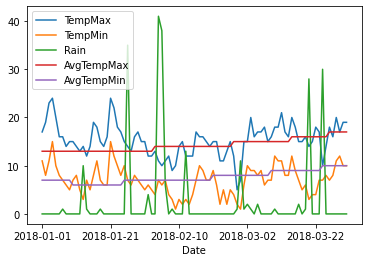

In [7]:
bar.plot()
#wyswietlenie wykresu w domyslny sposob 

# wyswietlenie na wartosci konkretnej kolumny

<AxesSubplot:xlabel='Date'>

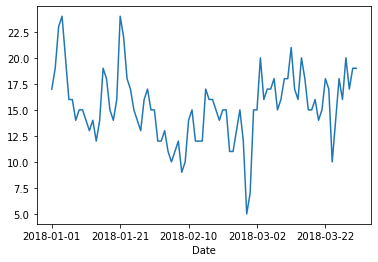

In [8]:
#I sposob
bar['TempMax'].plot()

<AxesSubplot:xlabel='Date'>

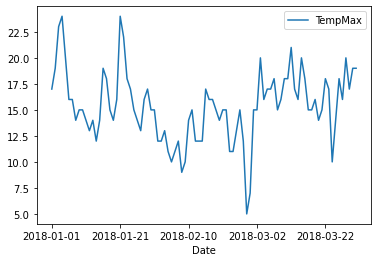

In [9]:
# II sposob
bar.plot(y='TempMax')

<AxesSubplot:xlabel='Date'>

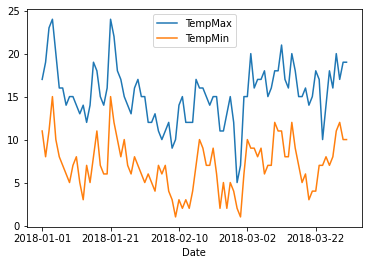

In [10]:
bar[['TempMax','TempMin']].plot()

## PARAMETRY METODY PLOT

<AxesSubplot:xlabel='Date'>

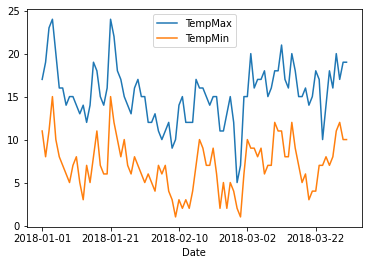

In [11]:
bar.plot(y=['TempMax','TempMin'])

In [12]:
bar=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_barcelona.csv",index_col='Date')
room=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_rome.csv",index_col='Date')
ams=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_amsterdam.csv",index_col='Date')

In [13]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


In [14]:
#nowy Data Frame tworze
temp_max=pd.DataFrame(index=bar.index)

In [15]:
temp_max['Barcelona']=bar['TempMax']
temp_max['Rome']=room['TempMax']
temp_max['Amsterdam']=ams['TempMax']

In [16]:
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


<AxesSubplot:xlabel='Date'>

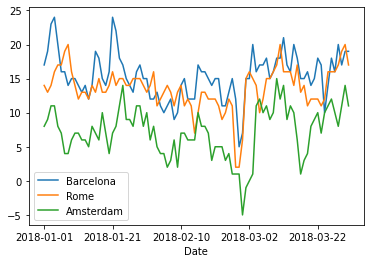

In [17]:
temp_max.plot()

## Jak zmienic rozmiar obrazu

<AxesSubplot:xlabel='Date'>

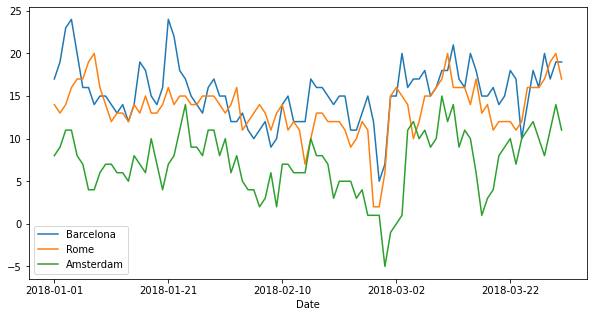

In [18]:
temp_max.plot(figsize=(10,5))
#fifsize=(), w calach

<AxesSubplot:xlabel='Date'>

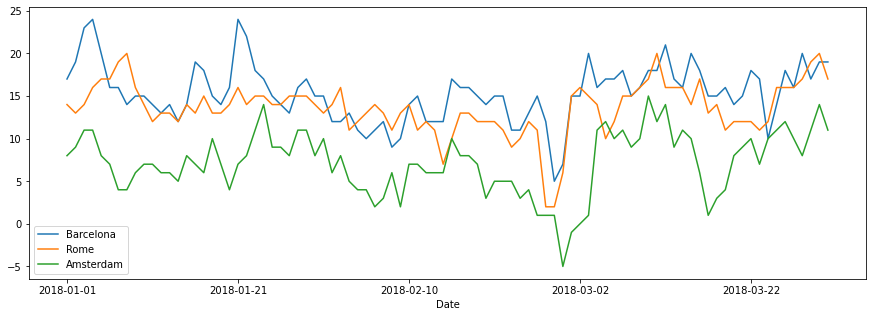

In [19]:
temp_max.plot(figsize=(15,5))

## Jakc chcesz wyświetlić osobne wykresy z podanego...:
polecenie : 
# subplot=True

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

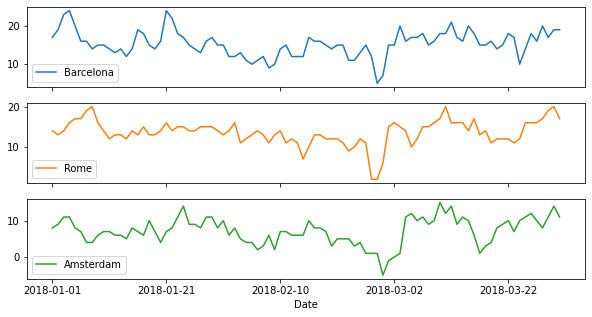

In [20]:
temp_max.plot(figsize=(10,5),subplots=True)

## use_index = False,

wtedy na osi x mamy numer wiersza, ktory przypisany jest wartosci wartosci na wykresie

<AxesSubplot:>

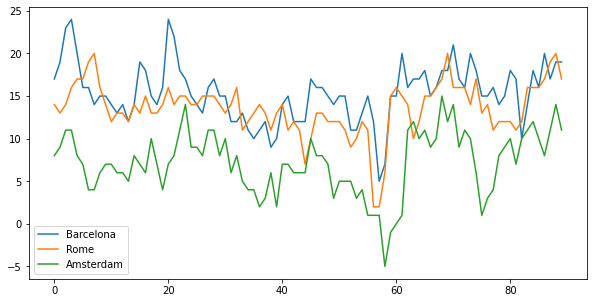

In [21]:
temp_max.plot(figsize=(10,5),use_index=False)

## Dodanie tytulu do wykresu

<AxesSubplot:title={'center':'Max temperature by city'}, xlabel='Date'>

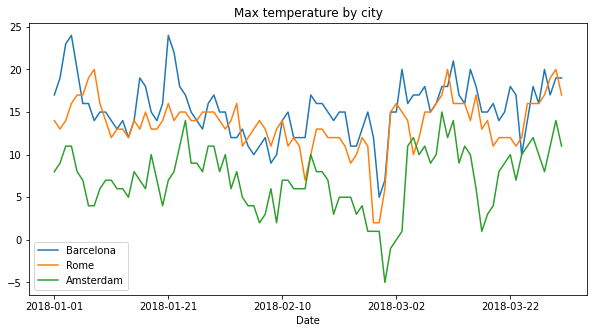

In [22]:
temp_max.plot(figsize=(10,5),title='Max temperature by city')

## jak usunac legede na osiach:

## legend=False

<AxesSubplot:xlabel='Date'>

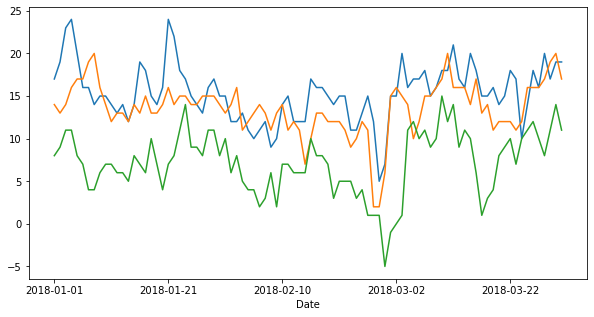

In [23]:
temp_max.plot(figsize=(10,5),legend=False)

## Jak zmienic skale na osiach na logarytmiczna:

## logy=True

<AxesSubplot:xlabel='Date'>

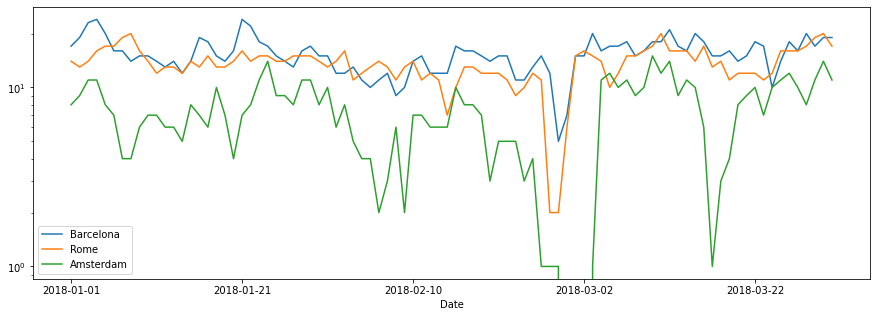

In [24]:
temp_max.plot(figsize=(15,5),logy=True)

## jak wyswietic wartosci z przedzialu

In [25]:
temp_max[:14]
#data od 1 do 14 stycznia

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8
2018-01-06,16,17,7
2018-01-07,16,19,4
2018-01-08,14,20,4
2018-01-09,15,16,6


## xticks

# przyklad xticks=(range(14)),
liczba wartosci od 0 do 14 i jezeli jakis element wystepuje na liscie to na osi x wyswietlic wartosc jaka znajduje sie na indeksie

<AxesSubplot:xlabel='Date'>

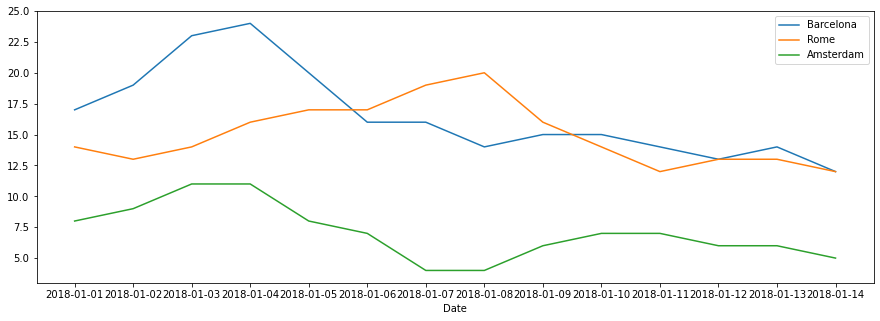

In [26]:
temp_max[:14].plot(figsize=(15,5),xticks=(range(14)))

## podpisy na osi x, mi sie nie podobaly, wiec zostaly zmienione pod katem 45

## rot=45

<AxesSubplot:xlabel='Date'>

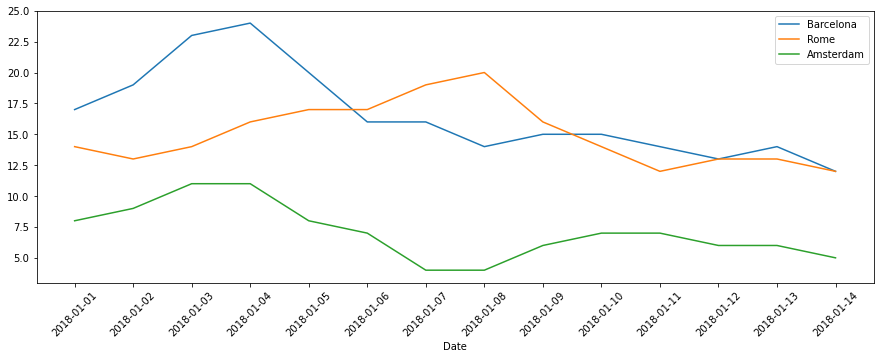

In [27]:
temp_max[:14].plot(figsize=(15,5),xticks=(range(14)),rot=45)

## pod osia x tabelka z dokladnymi wartosciami:
## table=True

<AxesSubplot:xlabel='Date'>

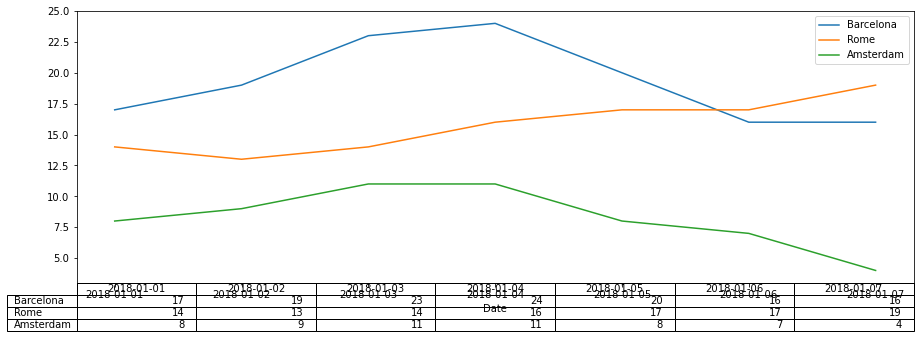

In [28]:
temp_max[:7].plot(figsize=(15,5),table=True)

<AxesSubplot:xlabel='Date'>

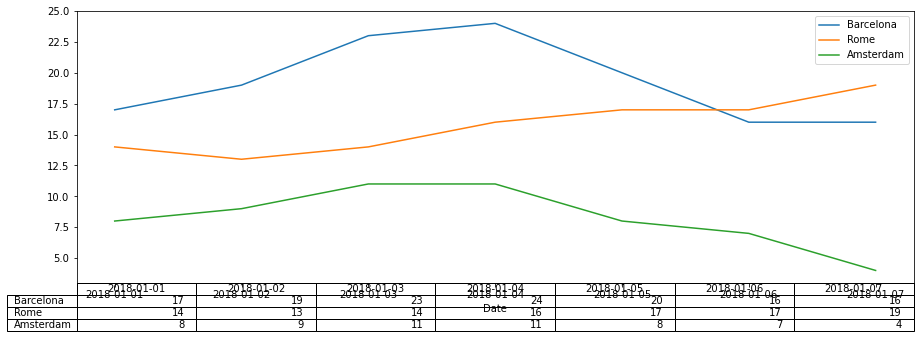

In [29]:
temp_max[:7].plot(figsize=(15,5),table=True)

## FORMATOWANIE WYKRESU

In [30]:
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


In [31]:
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


<AxesSubplot:xlabel='Date'>

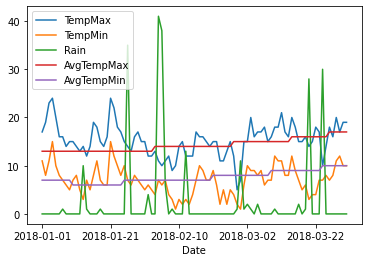

In [32]:
bar.plot()

## zmiana kolorow wykresow:
## color=['r'...]
## colormap='magma'
## colormap='plasma'
## colormap='gnuplot'


<AxesSubplot:xlabel='Date'>

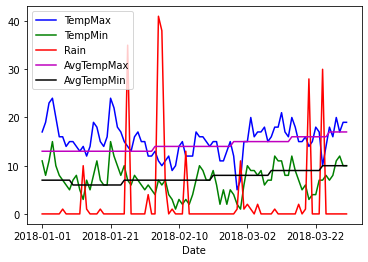

In [33]:
bar.plot(color=['b','g','r','m','k'])

<AxesSubplot:xlabel='Date'>

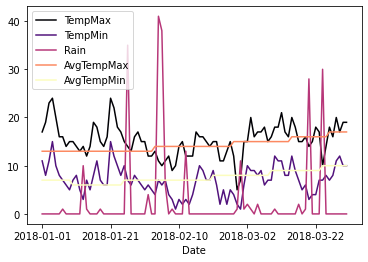

In [34]:
bar.plot(colormap='magma')

<AxesSubplot:xlabel='Date'>

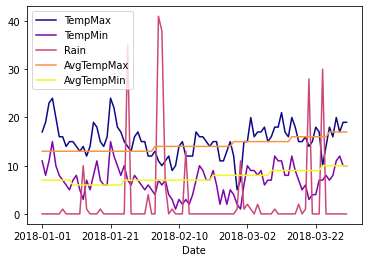

In [35]:
bar.plot(colormap='plasma')

<AxesSubplot:xlabel='Date'>

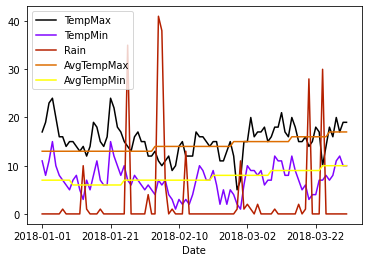

In [36]:
bar.plot(colormap='gnuplot')

## ZMIENIENIE STYLU WYKRESU, 

1. NP. PRZY POMOCY POLECENIA:
plt.style.available

wydrukuj wszystkie dostepne style

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## przyklad uzycia zmienionego stylu wykresu:

plt.style.use('seaborn')

bar.plot()

<AxesSubplot:xlabel='Date'>

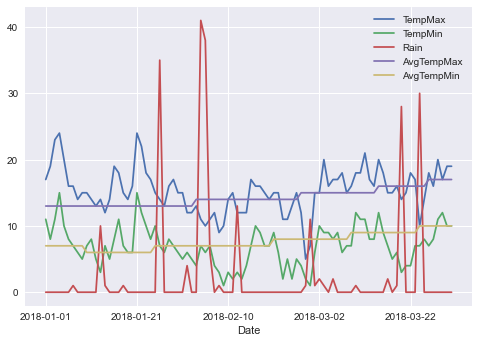

In [38]:
plt.style.use('seaborn')
bar.plot()

## usuniecie siatki (grid) na wykresie: grid=False

<AxesSubplot:xlabel='Date'>

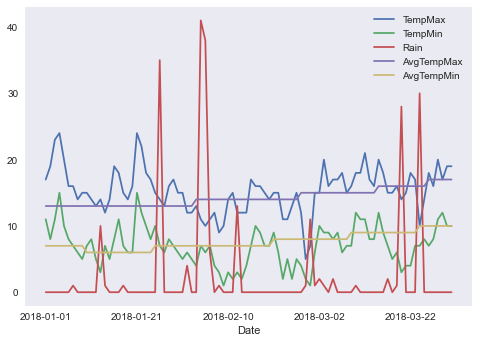

In [39]:
plt.style.use('seaborn')
bar.plot(grid=False)

## WYKRES KOŁOWY:

In [40]:
bar=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_barcelona.csv",index_col='Date')
room=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_rome.csv",index_col='Date')
ams=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/weather_amsterdam.csv",index_col='Date')
#nowy Data Frame tworze
temp_max=pd.DataFrame(index=bar.index)
temp_max['Barcelona']=bar['TempMax']
temp_max['Rome']=room['TempMax']
temp_max['Amsterdam']=ams['TempMax']

In [41]:
#row-wiersz
def GradeDay(row):
    if(row["TempMax"]>=row["AvgTempMax"]):
        return 'PLUS'
    else:
        return "MINUS"

In [42]:
room['GradeDay']=room.apply(GradeDay,axis=1)
bar['GradeDay']=bar.apply(GradeDay,axis=1)
ams['GradeDay']=ams.apply(GradeDay,axis=1)
#axis=1, to kolumny

In [43]:
room.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [44]:
room['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [45]:
ams['GradeDay'].value_counts()

PLUS     68
MINUS    22
Name: GradeDay, dtype: int64

In [46]:
cities3=pd.DataFrame(index=['MINUS','PLUS'])

In [47]:
cities3["Barcelona"]=bar["GradeDay"].value_counts()
cities3["Rome"]=room["GradeDay"].value_counts()
cities3["Amsterdam"]=ams["GradeDay"].value_counts()

In [48]:
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


<AxesSubplot:ylabel='Barcelona'>

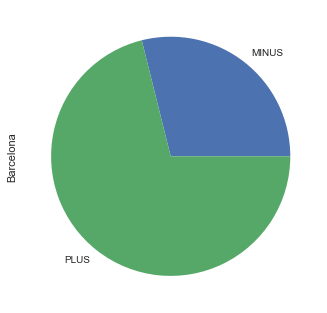

In [49]:
cities3['Barcelona'].plot(kind='pie')

<AxesSubplot:ylabel='Barcelona'>

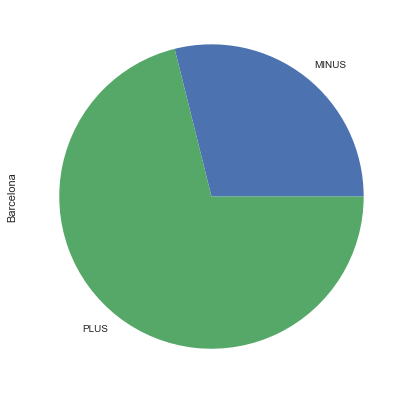

In [50]:
cities3['Barcelona'].plot(kind='pie',figsize=(7,7))

## Wygenerowanie 3 wykresow za 1 razem

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

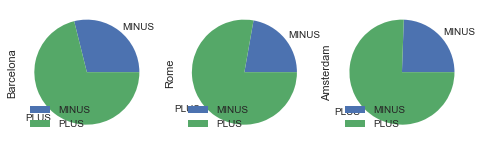

In [51]:
cities3.plot(kind='pie',subplots=True)
#kind=pie, to kolo

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

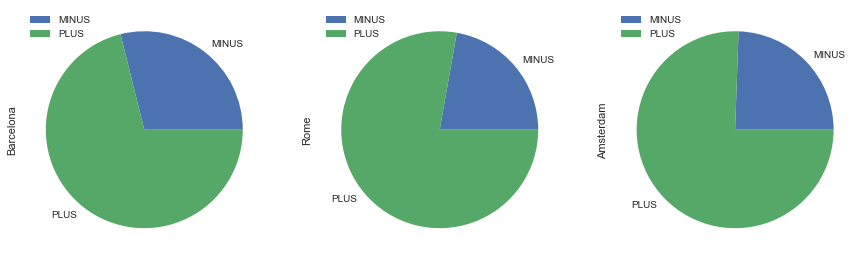

In [52]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5))
#kind=pie, to kolo

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

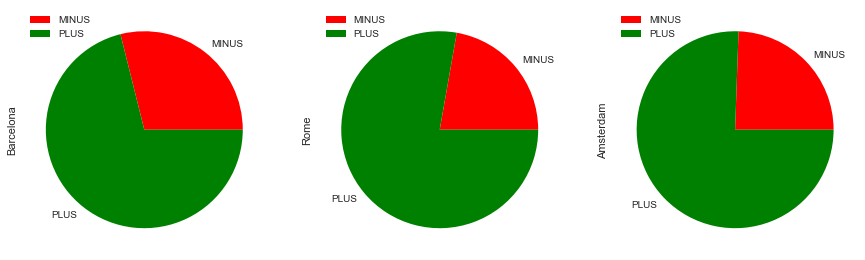

In [53]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'])
#kind=pie, to kolo

# zmiana legendy przy wyswietlaniu

# labels=['nazwa1','nazwa2']

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

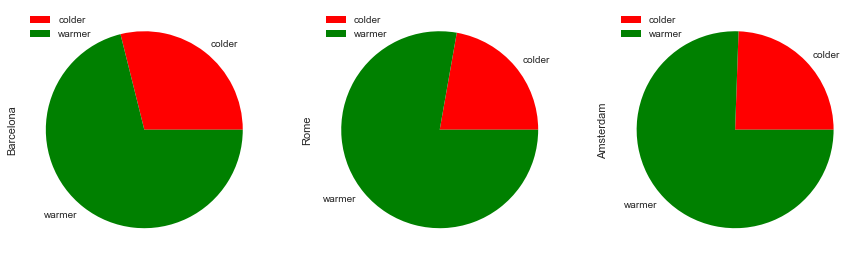

In [54]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'])
#kind=pie, to kolo

## jak wyswietlic wartosci procentowe (%) na wykresie kolowym:

## autopct='%.0f%%'

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

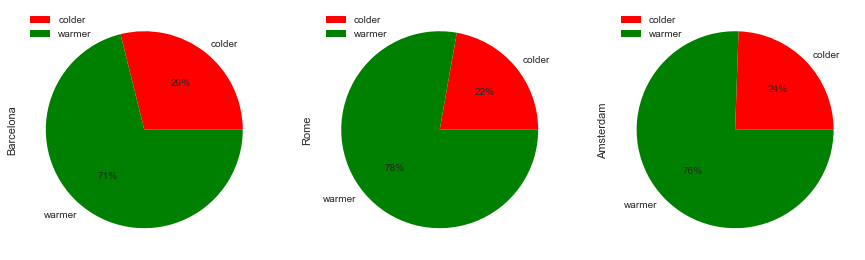

In [55]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'],autopct='%.0f%%')
#kind=pie, to kolo

## jak zmienic wielkosc czcionki na wykresie:

## fontsize=20

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

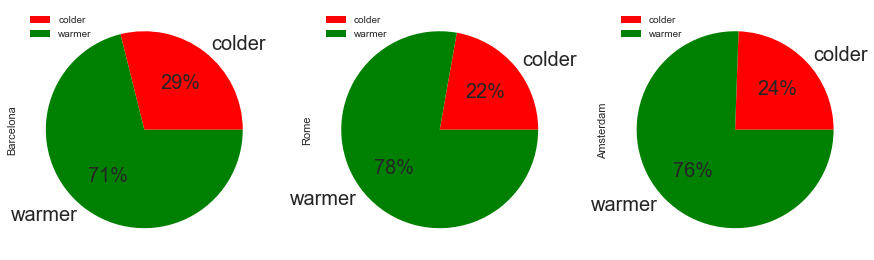

In [56]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20)
#kind=pie, to kolo

## zmiana kolor czcionki wew wykresow napisów na np. white (w)

## textprops=dict(color='w'

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

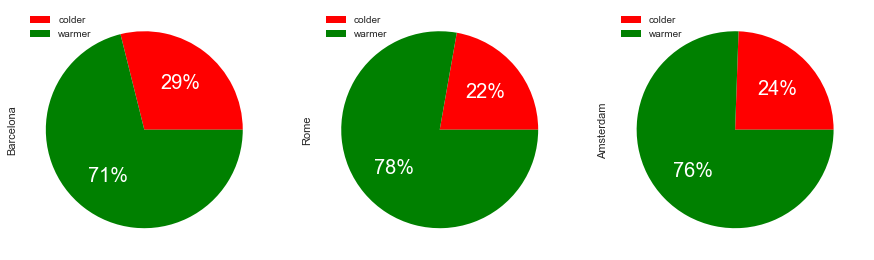

In [57]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'))
#kind=pie, to kolo

## Zmiana polozenia wykresow kolowych:

## layout=(2,2), czyt dwa wykresy kolo siebie, dwa wykresy pod soba

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

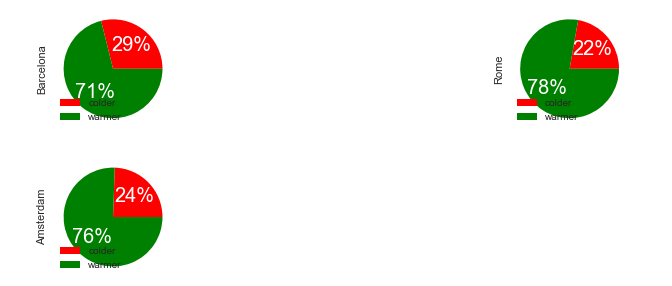

In [58]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'),layout=(2,2))
#kind=pie, to kolo

## explode=(1,0), obczaj ponizej co robi
0- wycienk niewysuniety, >0,wysuniety

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

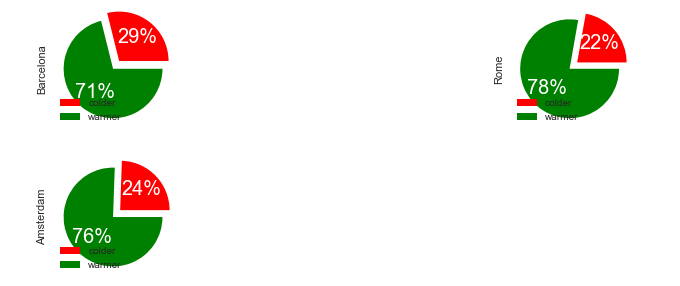

In [59]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['r','g'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'),layout=(2,2),explode=(0.2,0))
#kind=pie, to kolo

# WYKRES SŁUPKOWY, SKRZYNKOWY, HISTOGRAM

In [60]:
# korzystamy z tych danych wyzej zdeklarowanych

<AxesSubplot:>

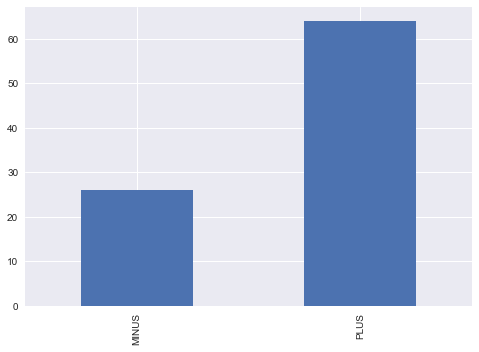

In [61]:
cities3['Barcelona'].plot(kind='bar')
#kind=bar, to slupki

<AxesSubplot:>

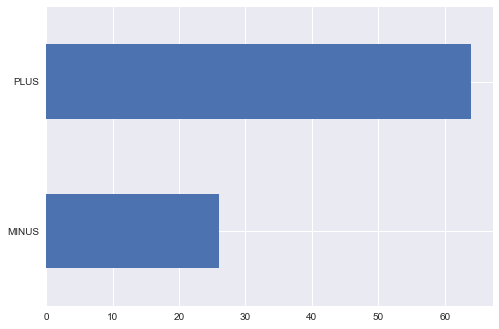

In [62]:
cities3['Barcelona'].plot(kind='barh')
#kind=barh, h od horizontal 

<AxesSubplot:>

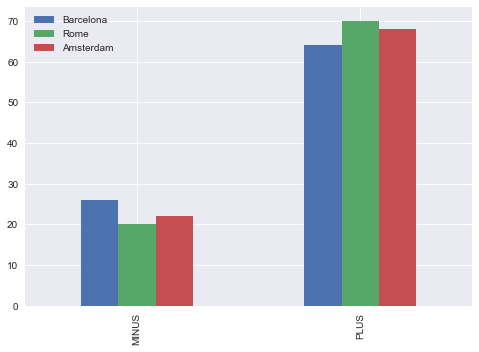

In [63]:
cities3.plot(kind='bar')

<AxesSubplot:>

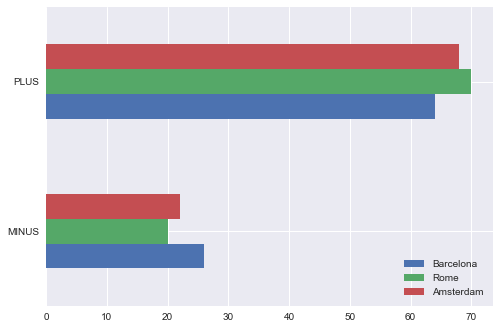

In [64]:
cities3.plot(kind='barh')

## nakladanie slupkow na siebie
## stacked=True

<AxesSubplot:>

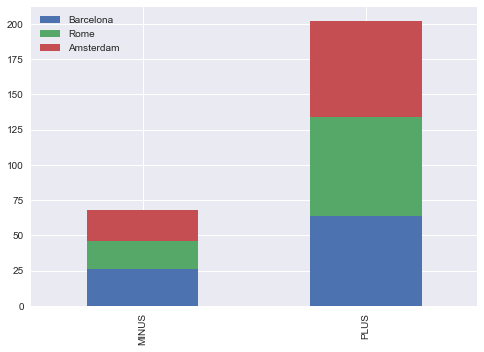

In [65]:
cities3.plot(kind='bar',stacked=True)

In [66]:
temp_max


,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8
...,...,...,...
2018-03-27,16,16,10
2018-03-28,20,17,8
2018-03-29,17,19,11


## wykres dla mediany mediany czyli dla kwartyli

<AxesSubplot:>

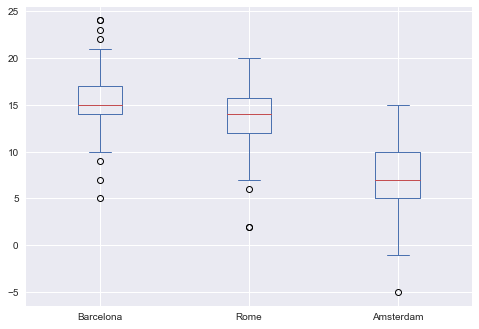

In [67]:
temp_max.plot(kind='box')
#wykres boxowy

### z tego wykresu wynika, ze np. dla Barceolny, patrzysz na czerwona kreske i masz ze okolo polowa dni miala temp. wyzsza od 15 stopni, a druga mniejsza, gorny was taka kreseczka przed kolkmai wskazuje na wartosc max temp. a dolny na wartosc minimalna temp w zbiorze danych

## aby zmienic szate graficzna wykresu, trzeba juz zdeklarowac wpierw slownik, czyt ogolnie jest ciezej

In [68]:
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')

<AxesSubplot:>

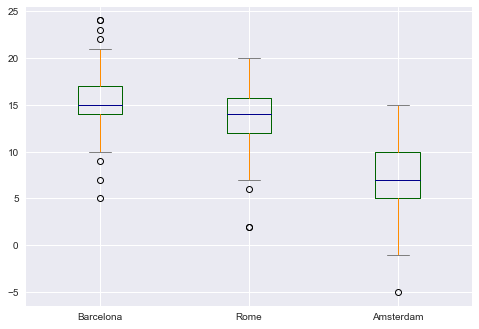

In [69]:
temp_max.plot(kind='box',color=color)

## HISTOGRAM

<AxesSubplot:ylabel='Frequency'>

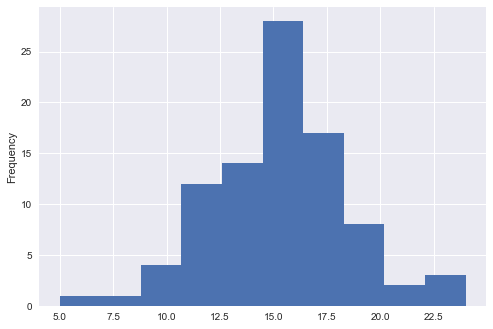

In [70]:
bar['TempMax'].plot(kind='hist')

In [71]:
bar['TempMax'].value_counts()

15    17
16    11
14    10
17     9
18     8
12     8
20     4
13     4
19     4
11     4
10     3
24     2
23     1
22     1
9      1
5      1
7      1
21     1
Name: TempMax, dtype: int64

In [72]:
bar['TempMax'].nunique()

18

<AxesSubplot:ylabel='Frequency'>

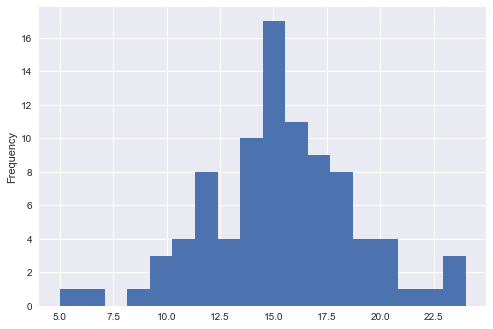

In [73]:
bar['TempMax'].plot(kind='hist',bins=18)
#bins=liczba unikalnych wartosci

In [74]:
autos=pd.read_csv("C:/Users/andzi/Downloads/projekty/course-files/autos.csv",encoding='latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## wykres scatter, plot, hexbin 

# IMPORT DANYCH


In [75]:
url='https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/isoc_cimobi_frq.tsv.gz&unzip=true'

In [76]:
dane=pd.read_csv(url)

## teraz zajmiemy sie 1 kolumna

In [77]:
dane=pd.read_csv(url,delimiter='\t')
dane.head(2)
#rozdzielenie danych przez znak tabulatora

,"indic_is,ind_type,unit,time\geo",EU27_2020,EU28,EU27_2007,EU15,EA,BE,BG,CZ,DK,...,SI,SK,FI,SE,IS,NO,UK,ME,MK,TR
0,"I_IHDDAY,CB_EU_FOR,PC_IND,2012",13,15,15,16,12,15,: u,: u,22,...,: u,14 u,35 u,35 u,16,31 u,39,:,:,:
1,"I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012",18,21,21,21,17,19,: u,: u,22,...,: u,17 u,36 u,40 u,17,32 u,46 u,:,:,:


In [78]:
dane2=dane['indic_is,ind_type,unit,time\\geo'].str.split(',',expand=True)
dane2.head(2)

,0,1,2,3
0,I_IHDDAY,CB_EU_FOR,PC_IND,2012
1,I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012


In [79]:
dane2.rename({0:'indic_is',1:'ind_type',2:'unit',3:'time'},axis=1,inplace=True)
dane2.head(2)
#axis=1, tyczy sie kolumn

,indic_is,ind_type,unit,time
0,I_IHDDAY,CB_EU_FOR,PC_IND,2012
1,I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012


In [80]:
dane3=dane2.join(dane)

In [81]:
dane3.head(2)

,indic_is,ind_type,unit,time,"indic_is,ind_type,unit,time\geo",EU27_2020,EU28,EU27_2007,EU15,EA,...,SI,SK,FI,SE,IS,NO,UK,ME,MK,TR
0,I_IHDDAY,CB_EU_FOR,PC_IND,2012,"I_IHDDAY,CB_EU_FOR,PC_IND,2012",13,15,15,16,12,...,: u,14 u,35 u,35 u,16,31 u,39,:,:,:
1,I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012,"I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012",18,21,21,21,17,...,: u,17 u,36 u,40 u,17,32 u,46 u,:,:,:


In [82]:
# chcemy usunac kolumne:
dane3.drop('indic_is,ind_type,unit,time\geo',axis=1,inplace=True)

In [83]:
dane3.head()

,indic_is,ind_type,unit,time,EU27_2020,EU28,EU27_2007,EU15,EA,BE,...,SI,SK,FI,SE,IS,NO,UK,ME,MK,TR
0,I_IHDDAY,CB_EU_FOR,PC_IND,2012,13,15,15,16,12,15,...,: u,14 u,35 u,35 u,16,31 u,39,:,:,:
1,I_IHDDAY,CB_EU_FOR,PC_IND_IU3,2012,18,21,21,21,17,19,...,: u,17 u,36 u,40 u,17,32 u,46 u,:,:,:
2,I_IHDDAY,CB_EU_FOR,PC_IND_IUHD,2012,57,57,57,57,55,48,...,: u,: u,: u,: u,40 u,50 u,60 u,:,:,:
3,I_IHDDAY,CB_EXT_EU,PC_IND,2012,15,21,21,22,13,11,...,3,: u,22,39,16 u,32 u,39,:,:,:
4,I_IHDDAY,CB_EXT_EU,PC_IND_IU3,2012,21,28,28,29,19,15,...,5,: u,24 u,42,17 u,32 u,43,:,:,:


## dane z przecinkiem w plikach csv moga zostac uszkodzone, wiec:


In [84]:
json_link='http://floatrates.com/daily/chf.json'

## Otwieranie formatu JSON

In [85]:
pd.read_json(json_link)

,usd,eur,gbp,jpy,aud,cad,npr,isk,gip,gel,...,bam,lbp,huf,pen,rsd,svc,xcd,mwk,gtq,nok
code,USD,EUR,GBP,JPY,AUD,CAD,NPR,ISK,GIP,GEL,...,BAM,LBP,HUF,PEN,RSD,SVC,XCD,MWK,GTQ,NOK
alphaCode,USD,EUR,GBP,JPY,AUD,CAD,NPR,ISK,GIP,GEL,...,BAM,LBP,HUF,PEN,RSD,SVC,XCD,MWK,GTQ,NOK
numericCode,840,978,826,392,036,124,524,352,292,981,...,977,422,348,604,941,222,951,454,320,578
name,U.S. Dollar,Euro,U.K. Pound Sterling,Japanese Yen,Australian Dollar,Canadian Dollar,Nepalese Rupee,Icelandic Krona,Gibraltar pound,Georgian lari,...,Bosnia and Herzegovina convertible mark,Lebanese Pound,Hungarian Forint,Peruvian Nuevo Sol,Serbian Dinar,Salvadoran colon,East Caribbean Dollar,Malawian kwacha,Guatemalan Quetzal,Norwegian Krone
rate,0.345725,0.310454,0.263484,42.229664,0.461463,0.432421,41.97057,44.180463,0.263646,1.072224,...,0.609235,523.381151,114.699966,1.288123,36.70159,3.027794,0.936899,282.534916,2.657532,2.988225
date,"Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT",...,"Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT","Thu, 31 Mar 2022 11:55:01 GMT"
inverseRate,2.89247,3.221087,3.795294,0.02368,2.167023,2.312563,0.023826,0.022634,3.792965,0.932641,...,1.641403,0.001911,0.008718,0.776323,0.027247,0.330273,1.067351,0.003539,0.376289,0.334647


In [87]:
pd.read_json(json_link).transpose()

,code,alphaCode,numericCode,name,rate,date,inverseRate
usd,USD,USD,840,U.S. Dollar,0.345725,"Thu, 31 Mar 2022 11:55:01 GMT",2.89247
eur,EUR,EUR,978,Euro,0.310454,"Thu, 31 Mar 2022 11:55:01 GMT",3.221087
gbp,GBP,GBP,826,U.K. Pound Sterling,0.263484,"Thu, 31 Mar 2022 11:55:01 GMT",3.795294
jpy,JPY,JPY,392,Japanese Yen,42.229664,"Thu, 31 Mar 2022 11:55:01 GMT",0.02368
aud,AUD,AUD,036,Australian Dollar,0.461463,"Thu, 31 Mar 2022 11:55:01 GMT",2.167023
...,...,...,...,...,...,...,...
svc,SVC,SVC,222,Salvadoran colon,3.027794,"Thu, 31 Mar 2022 11:55:01 GMT",0.330273
xcd,XCD,XCD,951,East Caribbean Dollar,0.936899,"Thu, 31 Mar 2022 11:55:01 GMT",1.067351
mwk,MWK,MWK,454,Malawian kwacha,282.534916,"Thu, 31 Mar 2022 11:55:01 GMT",0.003539
gtq,GTQ,GTQ,320,Guatemalan Quetzal,2.657532,"Thu, 31 Mar 2022 11:55:01 GMT",0.376289


## EKSPORT DANYCH

## np. nazwadanych.to_    kliknij tabulator 
df_blood.to_csv

In [91]:
df_blood=pd.DataFrame({'Group':['0','0','A','A','B','B','AB','AB'],
                       'Rh':['+','-','+','-','+','-','+','-'],
                      'Population':[31,6,32,6,15,2,7,1]
                     })

In [92]:
df_blood

,Group,Rh,Population
0,0,+,31
1,0,-,6
2,A,+,32
3,A,-,6
4,B,+,15
5,B,-,2
6,AB,+,7
7,AB,-,1


## ODCZYT I ZAPIS DO CSV

In [96]:
df_blood.to_csv('blood.csv')

In [97]:
pd.read_csv('blood.csv')

,Unnamed: 0,Group,Rh,Population
0,0,0,+,31
1,1,0,-,6
2,2,A,+,32
3,3,A,-,6
4,4,B,+,15
5,5,B,-,2
6,6,AB,+,7
7,7,AB,-,1


## dzielenie jakies kolumny przez 100, aby otrzymac %

In [101]:
df_blood.loc[:,'Population']/=100

In [102]:
df_blood

,Group,Rh,Population
0,0,+,0.31
1,0,-,0.06
2,A,+,0.32
3,A,-,0.06
4,B,+,0.15
5,B,-,0.02
6,AB,+,0.07
7,AB,-,0.01


In [103]:
df_blood.to_csv('blood.csv',index=False)

## Jak zaimportować do pliku tylko okreslone kolumny

In [104]:
df_blood.to_csv('blood.csv',index=False,columns=['Group','Rh'])

In [105]:
pd.read_csv('blood.csv')

,Group,Rh
0,0,+
1,0,-
2,A,+
3,A,-
4,B,+
5,B,-
6,AB,+
7,AB,-


In [110]:
df_blood.to_csv('blood.csv',index=False,columns=['Group','Rh'],sep=';')
#sep=';', zamiana na srednik 

In [112]:
pd.read_csv('blood.csv',sep=';')

,Group,Rh
0,0,+
1,0,-
2,A,+
3,A,-
4,B,+
5,B,-
6,AB,+
7,AB,-


## jak zapisac do istniejacego pliku kolejne wiersze:
## mode='a', a jak append, ale dodaj header=False, zeby naglowki sie nie powielaly

In [115]:
df_blood.to_csv('blood.csv',index=False,columns=['Group','Rh'],sep=';',
               mode='a',header=False)


In [116]:
pd.read_csv('blood.csv',sep=';')

,Group,Rh
0,0,+
1,0,-
2,A,+
3,A,-
4,B,+
5,B,-
6,AB,+
7,AB,-
8,Group,Rh
9,0,+


## EKSPORTOWANIE DO JSON
jest on mniej podatny na bledy niz csv

In [117]:
df_blood.to_json('blood.json')

In [118]:
pd.read_json('blood.json')

,Group,Rh,Population
0,0,+,0.31
1,0,-,0.06
2,A,+,0.32
3,A,-,0.06
4,B,+,0.15
5,B,-,0.02
6,AB,+,0.07
7,AB,-,0.01


## EXCEL 

In [4]:
pd.read_excel("C:/Users/andzi/Downloads/projekty/course-files/PC_Vehicles-in-use.xlsx")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,PC WORLD VEHICLES IN USE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Estimated figures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REGIONS/COUNTRIES,NaN,NaN,NaN,2005,2006,2007.00000,2008.000000,2009.000000,2010.000000,2011.00000,2012.000000,2013.000000,2014.00000,2015.000,NaN,Variation 2015/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,UGANDA,NaN,NaN,NaN,57,59,91.00000,94.000000,97.000000,101.000000,110.00000,120.000000,130.000000,140.00000,150.000,NaN,0.071429
158,ZAMBIA,NaN,NaN,NaN,294,303,200.00000,135.000000,190.000000,200.000000,210.00000,220.000000,230.000000,240.00000,250.000,NaN,0.041667
159,ZIMBABWE,NaN,NaN,NaN,590,599,610.00000,617.000000,626.000000,650.000000,680.00000,710.000000,750.000000,790.00000,830.000,NaN,0.050633
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
 pd.read_excel("C:/Users/andzi/Downloads/projekty/course-files/PC_Vehicles-in-use.xlsx",sheet_name='Old Europe')

,REGIONS/COUNTRIES,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AUSTRIA,4157.000,4205.000,4246.000,4285.000,4360.000,4441.000,4513.000,4584.000,4641.308,4694.921,4748.048
1,BELGIUM,4861.000,4929.000,5006.000,5087.000,5160.000,5279.000,5359.000,5393.000,5439.295,5511.080,5587.415
2,DENMARK,1971.000,2026.000,2075.000,2105.000,2126.000,2169.000,2203.000,2240.000,2279.792,2321.172,2392.079
3,FINLAND,2414.477,2489.287,2480.880,2449.722,2449.604,2486.283,2532.496,2560.190,2575.951,2595.867,2612.922
4,FRANCE,30100.000,30400.000,30700.000,30850.000,31050.000,31300.000,31550.000,31600.000,31650.000,31800.000,32000.000
5,GERMANY,46090.000,46570.000,41184.000,41321.000,41738.000,42302.000,42928.000,43431.000,43851.230,44403.124,45071.209
6,GREECE,4303.129,4543.016,4798.530,5023.944,5131.960,5216.873,5203.591,5167.557,5124.208,5102.203,5104.908
7,ICELAND,187.000,197.000,208.000,210.000,205.000,205.000,206.112,210.070,213.113,217.454,226.321
8,IRELAND,1662.157,1778.861,1882.901,1924.281,1902.429,1872.715,1887.810,1882.550,1910.165,1943.868,1985.130
9,ITALY,34667.000,35297.000,35680.000,36105.000,36372.000,36751.000,37113.000,37078.000,36962.934,37080.753,37351.233


In [12]:
 ok=pd.read_excel("C:/Users/andzi/Downloads/projekty/course-files/PC_Vehicles-in-use.xlsx",sheet_name=['Old Europe','New Europe'])

In [13]:
ok['Old Europe']

,REGIONS/COUNTRIES,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AUSTRIA,4157.000,4205.000,4246.000,4285.000,4360.000,4441.000,4513.000,4584.000,4641.308,4694.921,4748.048
1,BELGIUM,4861.000,4929.000,5006.000,5087.000,5160.000,5279.000,5359.000,5393.000,5439.295,5511.080,5587.415
2,DENMARK,1971.000,2026.000,2075.000,2105.000,2126.000,2169.000,2203.000,2240.000,2279.792,2321.172,2392.079
3,FINLAND,2414.477,2489.287,2480.880,2449.722,2449.604,2486.283,2532.496,2560.190,2575.951,2595.867,2612.922
4,FRANCE,30100.000,30400.000,30700.000,30850.000,31050.000,31300.000,31550.000,31600.000,31650.000,31800.000,32000.000
5,GERMANY,46090.000,46570.000,41184.000,41321.000,41738.000,42302.000,42928.000,43431.000,43851.230,44403.124,45071.209
6,GREECE,4303.129,4543.016,4798.530,5023.944,5131.960,5216.873,5203.591,5167.557,5124.208,5102.203,5104.908
7,ICELAND,187.000,197.000,208.000,210.000,205.000,205.000,206.112,210.070,213.113,217.454,226.321
8,IRELAND,1662.157,1778.861,1882.901,1924.281,1902.429,1872.715,1887.810,1882.550,1910.165,1943.868,1985.130
9,ITALY,34667.000,35297.000,35680.000,36105.000,36372.000,36751.000,37113.000,37078.000,36962.934,37080.753,37351.233


## zapisywanie do excela: uwaga jest bardziej skomplikowane
## excelWriter=pd.ExcelWriter('cars.xlsx')

In [14]:
excelWriter=pd.ExcelWriter('cars.xlsx')

In [17]:
ok['Old Europe'].to_excel(excelWriter,index=False,columns=['REGIONS/COUNTRIES',2010],sheet_name='Old Europe 2010')

In [18]:
excelWriter.save()

In [19]:
#te 3 kroki do zapisu xlsx